In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Importing Libraries
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns

# For Visualisation-import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
# The following code is to set the subsequent figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

# To calculate accuracy measures
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn
from sklearn.model_selection import train_test_split

## Linear Regression

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
# Read the Insurance data
df= pd.read_excel('Salescapestone.xlsx')

In [3]:
# Check the Top Records
df.head().T

0                    1              2  \
CustID                    7000000              7000001        7000002   
AgentBonus                   4409                 2214           4273   
Age                          22.0                 11.0           26.0   
CustTenure                    4.0                  2.0            4.0   
Channel                     Agent  Third Party Partner          Agent   
Occupation               Salaried             Salaried    Free Lancer   
EducationField           Graduate             Graduate  Post Graduate   
Gender                     Female                 Male           Male   
ExistingProdType                3                    4              4   
Designation               Manager              Manager            Exe   
NumberOfPolicy                2.0                  4.0            3.0   
MaritalStatus              Single             Divorced      Unmarried   
MonthlyIncome             20993.0              20130.0        17090.0   
Complaint                       1                    0              1   
ExistingPolicyTenure          2.0                  3.0            2.0   
SumAssured               806761.0             294502.0            NaN   
Zone                        North                North          North   
PaymentMethod         Half Yearly               Yearly         Yearly   
LastMonthCalls                  5                    7              0   
CustCareScore                 2.0                  3.0            3.0   

                                        3               4  
CustID                            7000003         7000004  
AgentBonus                           1791            2955  
Age                                  11.0             6.0  
CustTenure                            NaN             NaN  
Channel               Third Party Partner           Agent  
Occupation                       Salaried  Small Business  
EducationField                   Graduate              UG  
Gender                            Fe male            Male  
ExistingProdType                        3               3  
Designation                     Executive       Executive  
NumberOfPolicy                        3.0             4.0  
MaritalStatus                    Divorced        Divorced  
MonthlyIncome                     17909.0         18468.0  
Complaint                               1               0  
ExistingPolicyTenure                  2.0             4.0  
SumAssured                       268635.0        366405.0  
Zone                                 West            West  
PaymentMethod                 Half Yearly     Half Yearly  
LastMonthCalls                          0               2  
CustCareScore                         5.0             5.0

In [4]:
# Check the last5 Records
df.tail().T

4515            4516         4517  \
CustID                       7004515         7004516      7004517   
AgentBonus                      3953            2939         3792   
Age                              4.0             9.0         23.0   
CustTenure                       8.0             9.0         23.0   
Channel                        Agent           Agent        Agent   
Occupation            Small Business        Salaried     Salaried   
EducationField              Graduate  Under Graduate     Engineer   
Gender                          Male          Female       Female   
ExistingProdType                   4               2            5   
Designation           Senior Manager       Executive          AVP   
NumberOfPolicy                   2.0             2.0          5.0   
MaritalStatus                 Single         Married       Single   
MonthlyIncome                26355.0         20991.0          NaN   
Complaint                          0               0            0   
ExistingPolicyTenure             2.0             3.0          2.0   
SumAssured                  636473.0        296813.0     667371.0   
Zone                            West           North        North   
PaymentMethod                 Yearly          Yearly  Half Yearly   
LastMonthCalls                     9               1            4   
CustCareScore                    1.0             3.0          1.0   

                                4518            4519  
CustID                       7004518         7004519  
AgentBonus                      4816            4764  
Age                             10.0            14.0  
CustTenure                      10.0            10.0  
Channel                       Online           Agent  
Occupation            Small Business        Salaried  
EducationField              Graduate  Under Graduate  
Gender                        Female          Female  
ExistingProdType                   4               5  
Designation                Executive         Manager  
NumberOfPolicy                   2.0             2.0  
MaritalStatus                 Single         Married  
MonthlyIncome                20068.0         23820.0  
Complaint                          0               0  
ExistingPolicyTenure             6.0             3.0  
SumAssured                  943999.0        700308.0  
Zone                            West           North  
PaymentMethod            Half Yearly     Half Yearly  
LastMonthCalls                     1               1  
CustCareScore                    5.0             3.0

In [5]:
# Shape function displays the number of rows and columns in a dafaframe.
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset has 4520 rows and 20 columns


In [6]:
# Checking Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [7]:
# removing column CustID as it is not required
df.drop(['CustID'], axis = 'columns', inplace = True)

In [8]:
# Checking key statistics
df.describe(include='all').T

count unique          top  freq           mean  \
AgentBonus            4520.0    NaN          NaN   NaN    4077.838274   
Age                   4251.0    NaN          NaN   NaN      14.494707   
CustTenure            4294.0    NaN          NaN   NaN      14.469027   
Channel                 4520      3        Agent  3194            NaN   
Occupation              4520      5     Salaried  2192            NaN   
EducationField          4520      7     Graduate  1870            NaN   
Gender                  4520      3         Male  2688            NaN   
ExistingProdType      4520.0    NaN          NaN   NaN       3.688938   
Designation             4520      6      Manager  1620            NaN   
NumberOfPolicy        4475.0    NaN          NaN   NaN       3.565363   
MaritalStatus           4520      4      Married  2268            NaN   
MonthlyIncome         4284.0    NaN          NaN   NaN   22890.309991   
Complaint             4520.0    NaN          NaN   NaN       0.287168   
ExistingPolicyTenure  4336.0    NaN          NaN   NaN       4.130074   
SumAssured            4366.0    NaN          NaN   NaN  619999.699267   
Zone                    4520      4         West  2566            NaN   
PaymentMethod           4520      4  Half Yearly  2656            NaN   
LastMonthCalls        4520.0    NaN          NaN   NaN       4.626991   
CustCareScore         4468.0    NaN          NaN   NaN       3.067592   

                               std       min        25%       50%       75%  \
AgentBonus             1403.321711    1605.0    3027.75    3911.5   4867.25   
Age                       9.037629       2.0        7.0      13.0      20.0   
CustTenure                8.963671       2.0        7.0      13.0      20.0   
Channel                        NaN       NaN        NaN       NaN       NaN   
Occupation                     NaN       NaN        NaN       NaN       NaN   
EducationField                 NaN       NaN        NaN       NaN       NaN   
Gender                         NaN       NaN        NaN       NaN       NaN   
ExistingProdType          1.015769       1.0        3.0       4.0       4.0   
Designation                    NaN       NaN        NaN       NaN       NaN   
NumberOfPolicy            1.455926       1.0        2.0       4.0       5.0   
MaritalStatus                  NaN       NaN        NaN       NaN       NaN   
MonthlyIncome          4885.600757   16009.0    19683.5   21606.0   24725.0   
Complaint                 0.452491       0.0        0.0       0.0       1.0   
ExistingPolicyTenure      3.346386       1.0        2.0       3.0       6.0   
SumAssured            246234.82214  168536.0  439443.25  578976.5  758236.0   
Zone                           NaN       NaN        NaN       NaN       NaN   
PaymentMethod                  NaN       NaN        NaN       NaN       NaN   
LastMonthCalls            3.620132       0.0        2.0       3.0       8.0   
CustCareScore             1.382968       1.0        2.0       3.0       4.0   

                            max  
AgentBonus               9608.0  
Age                        58.0  
CustTenure                 57.0  
Channel                     NaN  
Occupation                  NaN  
EducationField              NaN  
Gender                      NaN  
ExistingProdType            6.0  
Designation                 NaN  
NumberOfPolicy              6.0  
MaritalStatus               NaN  
MonthlyIncome           38456.0  
Complaint                   1.0  
ExistingPolicyTenure       25.0  
SumAssured            1838496.0  
Zone                        NaN  
PaymentMethod               NaN  
LastMonthCalls             18.0  
CustCareScore               5.0

In [9]:
# Test whether there is any null value in our dataset or not. We can do this using isnull()
df.isnull().sum()
print("There are", df.isnull().values.sum(),"Missing Values in dataset")

There are 1166 Missing Values in dataset


In [10]:
df.isnull().sum().sort_values(ascending=False)

Age                     269
MonthlyIncome           236
CustTenure              226
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
NumberOfPolicy           45
ExistingProdType          0
Designation               0
Gender                    0
MaritalStatus             0
EducationField            0
Complaint                 0
Occupation                0
Channel                   0
Zone                      0
PaymentMethod             0
LastMonthCalls            0
AgentBonus                0
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)
df['CustTenure'].fillna(df['CustTenure'].median(),inplace=True)
df['ExistingPolicyTenure'].fillna(df['ExistingPolicyTenure'].median(),inplace=True)
df['SumAssured'].fillna(df['SumAssured'].median(),inplace=True)
df['CustCareScore'].fillna(df['CustCareScore'].median(),inplace=True)
df['NumberOfPolicy'].fillna(df['NumberOfPolicy'].median(),inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)

AgentBonus              0
MaritalStatus           0
LastMonthCalls          0
PaymentMethod           0
Zone                    0
SumAssured              0
ExistingPolicyTenure    0
Complaint               0
MonthlyIncome           0
NumberOfPolicy          0
Age                     0
Designation             0
ExistingProdType        0
Gender                  0
EducationField          0
Occupation              0
Channel                 0
CustTenure              0
CustCareScore           0
dtype: int64

In [13]:
df.Gender.value_counts()

Gender
Male       2688
Female     1507
Fe male     325
Name: count, dtype: int64

In [14]:
df['Gender'] = df.Gender.replace('Fe male','Female')

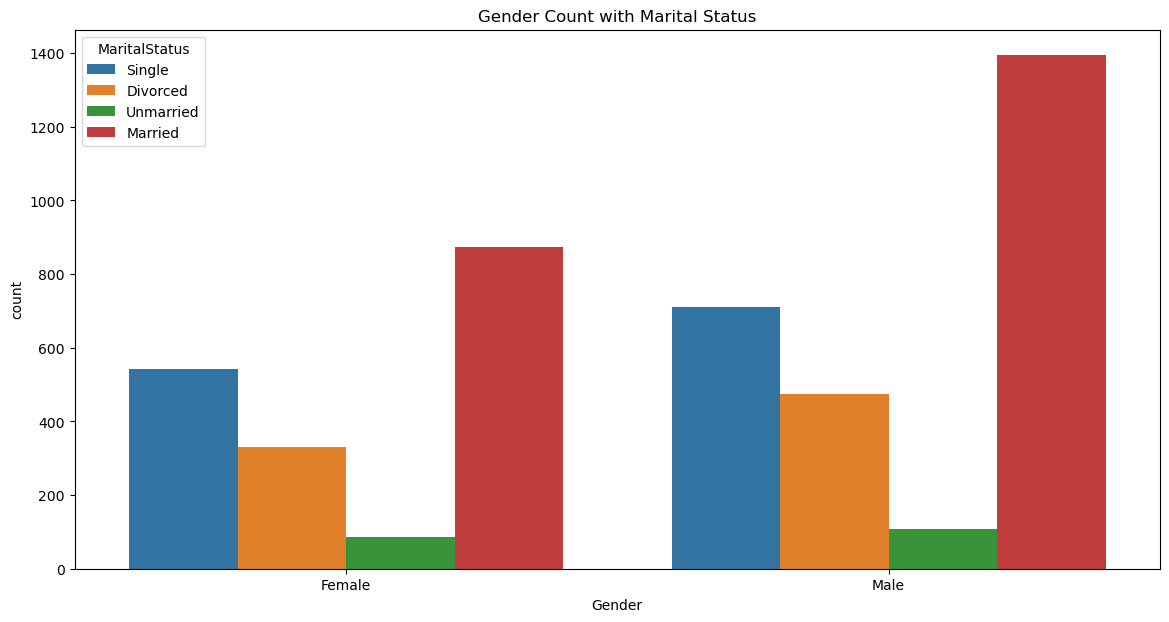

In [15]:
sns.countplot(x='Gender', hue='MaritalStatus', data=df)
plt.title('Gender Count with Marital Status')
plt.show()

In [16]:
df.Channel.value_counts()

Channel
Agent                  3194
Third Party Partner     858
Online                  468
Name: count, dtype: int64

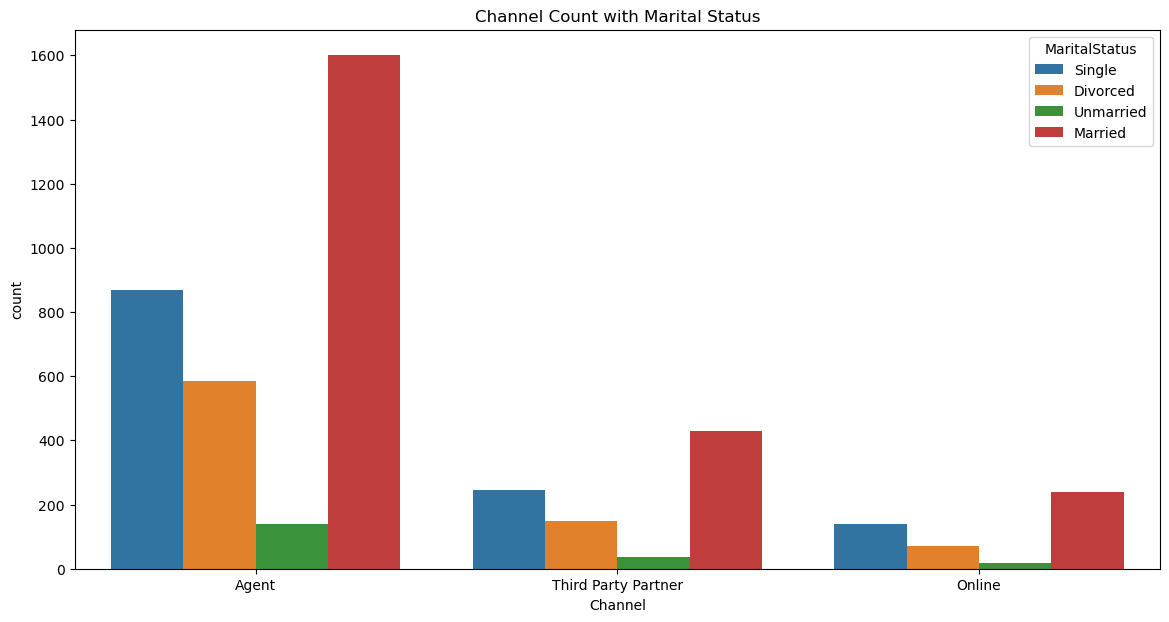

In [17]:
sns.countplot(x='Channel', hue='MaritalStatus', data=df)
plt.title('Channel Count with Marital Status')
plt.show()

In [18]:
df.Occupation.value_counts()

Occupation
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: count, dtype: int64

In [19]:
df['Occupation'] = df.Occupation.replace('Laarge Business','Large Business')

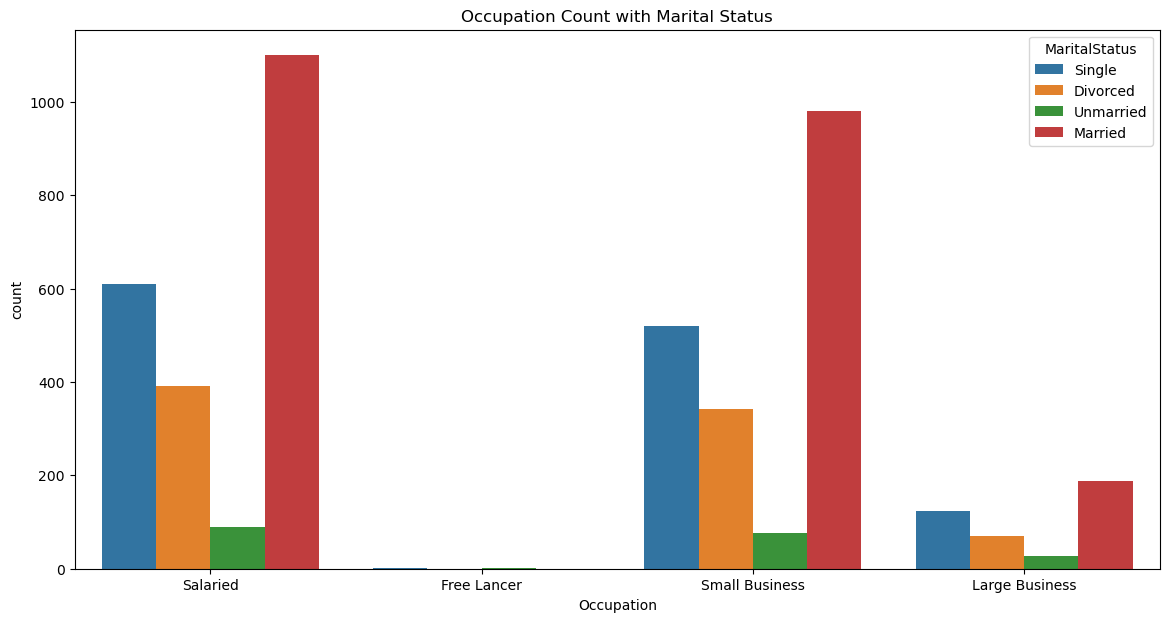

In [20]:
sns.countplot(x='Occupation', hue='MaritalStatus', data=df)
plt.title('Occupation Count with Marital Status')
plt.show()

In [21]:
df.Occupation.value_counts()

Occupation
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: count, dtype: int64

In [22]:
df.EducationField.value_counts()

EducationField
Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: count, dtype: int64

In [23]:
df['EducationField'] = df.EducationField.replace('UG','Under Graduate')

In [24]:
df.EducationField.value_counts()

EducationField
Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: count, dtype: int64

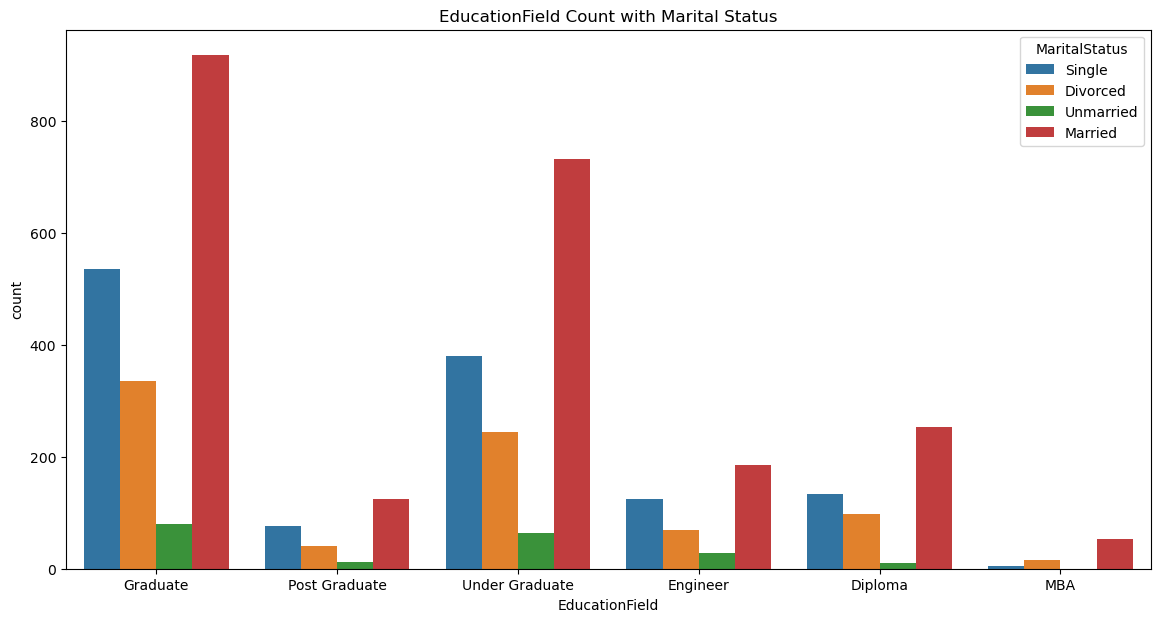

In [25]:
    sns.countplot(x='EducationField', hue='MaritalStatus', data=df)
    plt.title('EducationField Count with Marital Status')
    plt.show()

In [26]:
df.Designation.value_counts()

Designation
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: count, dtype: int64

In [27]:
df['Designation'] = df.Designation.replace('Exe','Executive')

In [28]:
df.Designation.value_counts()

Designation
Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: count, dtype: int64

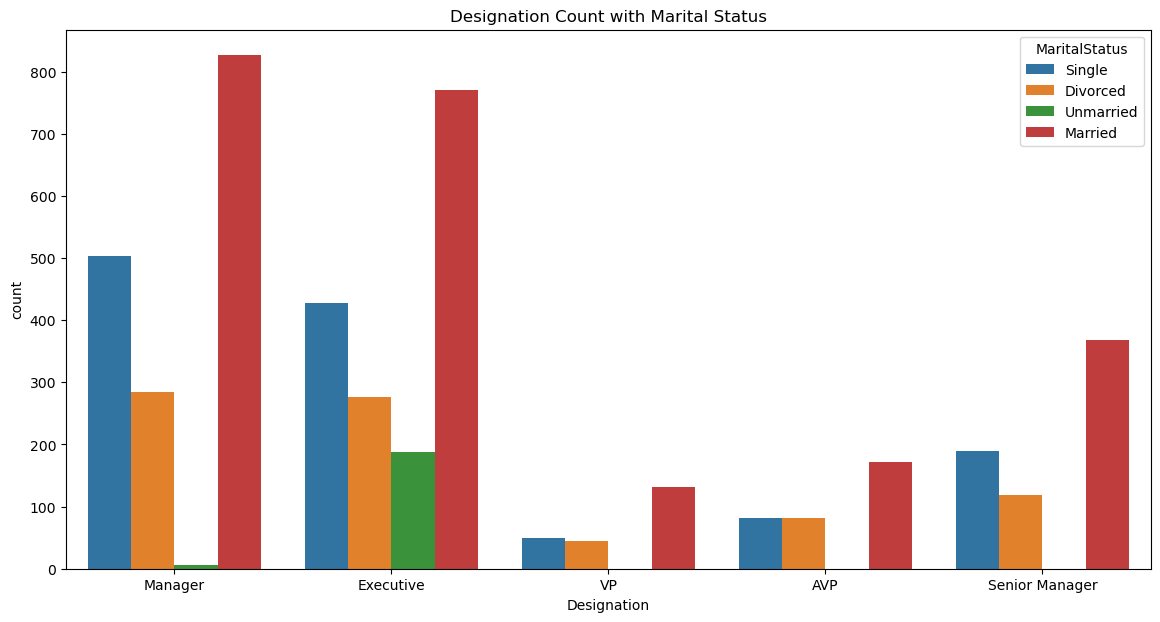

In [29]:
sns.countplot(x='Designation', hue='MaritalStatus', data=df)
plt.title('Designation Count with Marital Status')
plt.show()

In [30]:
df.MaritalStatus.value_counts()

MaritalStatus
Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: count, dtype: int64

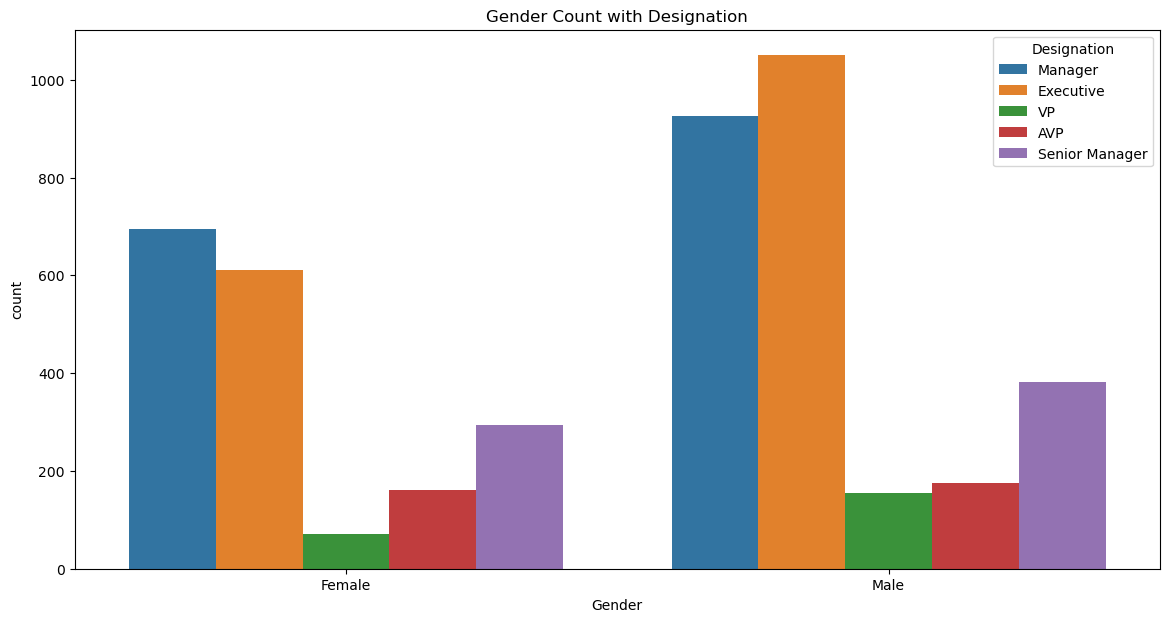

In [31]:
sns.countplot(x='Gender', hue='Designation', data=df)
plt.title('Gender Count with Designation')
plt.show()

In [32]:
df.Zone.value_counts()

Zone
West     2566
North    1884
East       64
South       6
Name: count, dtype: int64

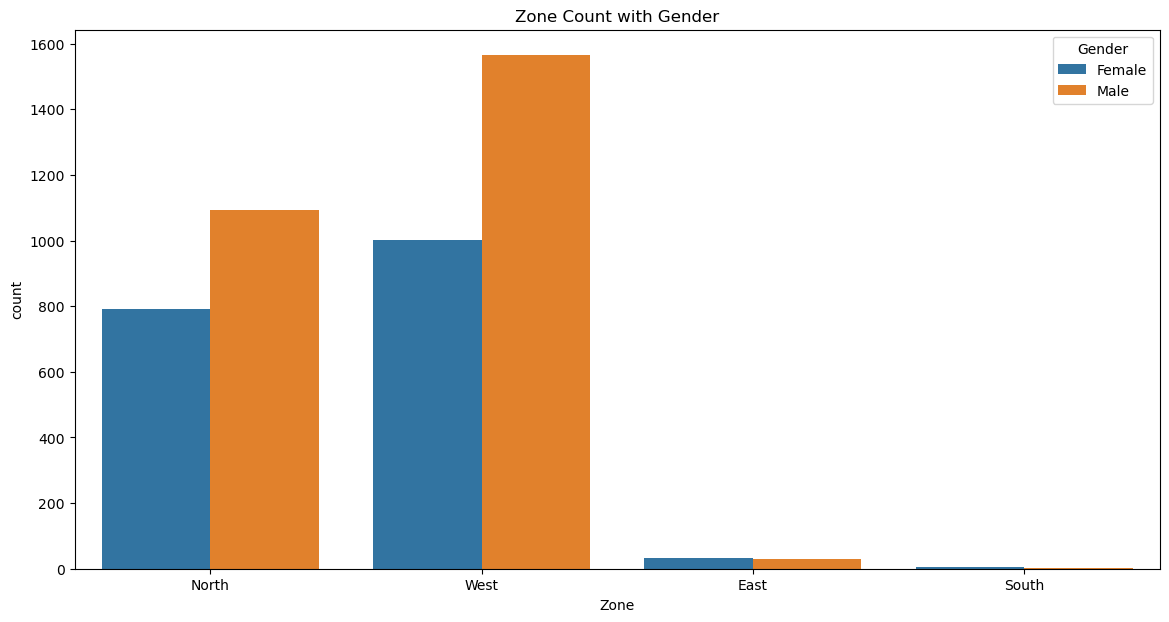

In [33]:
sns.countplot(x='Zone', hue='Gender', data=df)
plt.title('Zone Count with Gender')
plt.show()

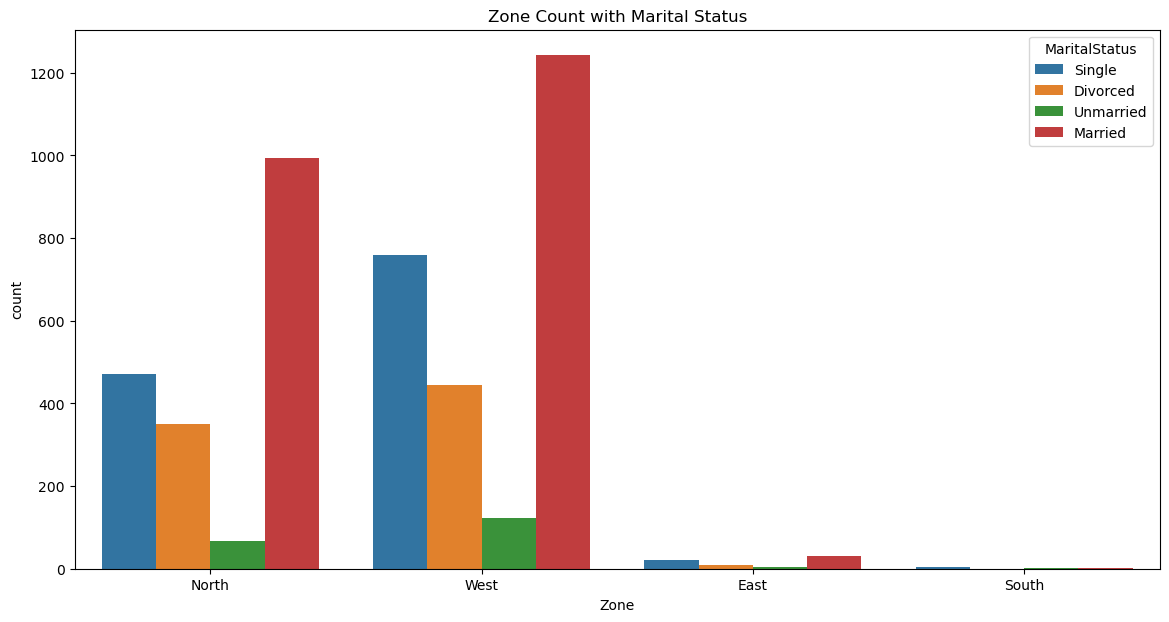

In [34]:
sns.countplot(x='Zone', hue='MaritalStatus', data=df)
plt.title('Zone Count with Marital Status')
plt.show()

In [35]:
df.PaymentMethod.value_counts()

PaymentMethod
Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: count, dtype: int64

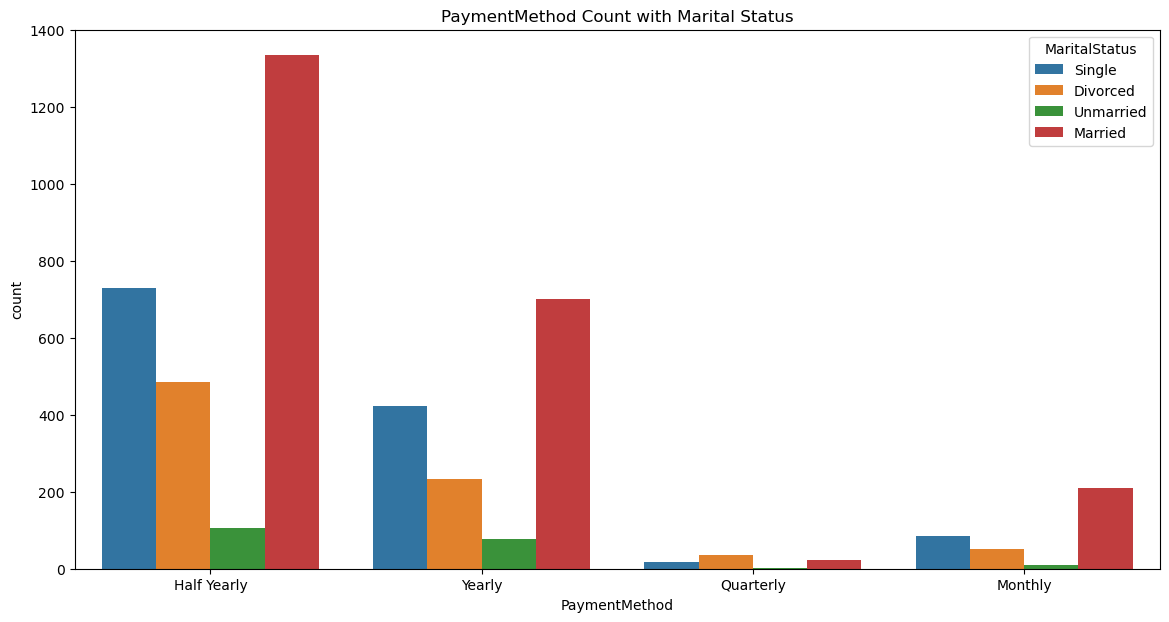

In [36]:
sns.countplot(x='PaymentMethod', hue='MaritalStatus', data=df)
plt.title('PaymentMethod Count with Marital Status')
plt.show()

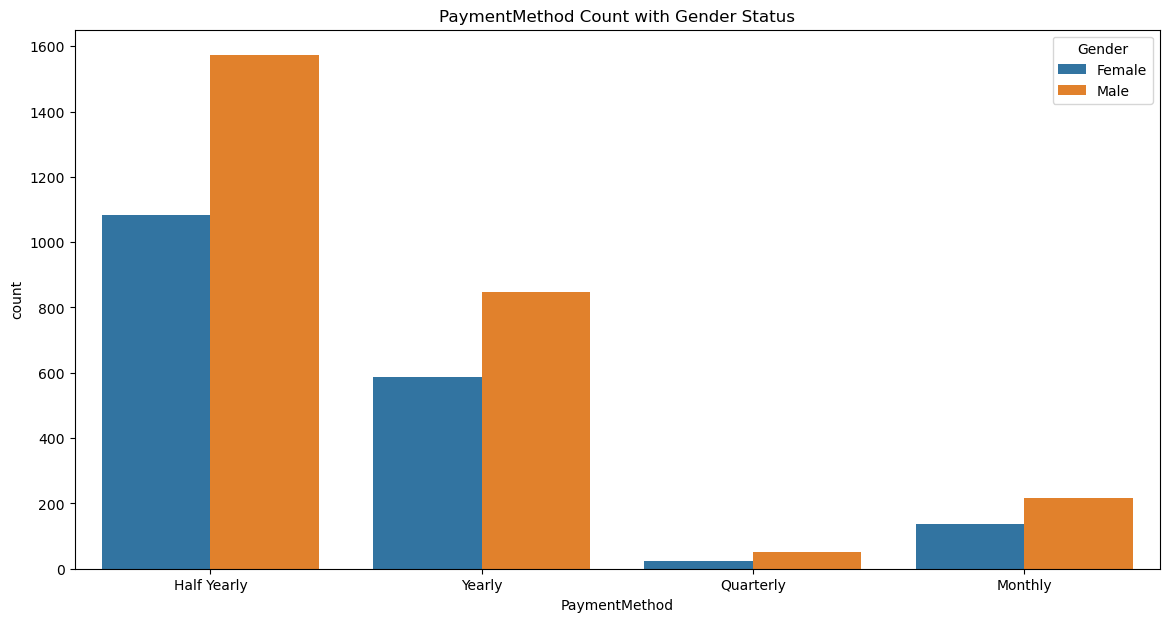

In [37]:
sns.countplot(x='PaymentMethod', hue='Gender', data=df)
plt.title('PaymentMethod Count with Gender Status')
plt.show()

In [38]:
dups= df.duplicated()
print('numbers of duplicate rows = %d' % (dups.sum()))

numbers of duplicate rows = 0


In [39]:
df.describe()["AgentBonus"]

count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: AgentBonus, dtype: float64

In [40]:

print(" 0.5% agents recived bonus lower than ",format(np.percentile(df["AgentBonus"], 0.5)))
print(" 1% agents recived bonus lower than ",format(np.percentile(df["AgentBonus"], 1)))
print(" 5% agents recived bonus lower than ",format(np.percentile(df["AgentBonus"], 5)))
print(" 10% agents recived bonus lower than ",format(np.percentile(df["AgentBonus"], 10)))
print(" 90% agents recived bonus lower than ",format(np.percentile(df["AgentBonus"], 90)))
print(" 95% agents recived bonus lower than ",format(np.percentile(df["AgentBonus"], 95)))
print(" 99% agents recived bonus lower than ",format(np.percentile(df["AgentBonus"], 99)))
print(" 99.5% agents recived bonus lower than ",format(np.percentile(df["AgentBonus"], 99.5)))

 0.5% agents recived bonus lower than  1755.19
 1% agents recived bonus lower than  1876.38
 5% agents recived bonus lower than  2158.0
 10% agents recived bonus lower than  2418.0
 90% agents recived bonus lower than  5917.1
 95% agents recived bonus lower than  6755.500000000002
 99% agents recived bonus lower than  8234.44000000001
 99.5% agents recived bonus lower than  8757.215


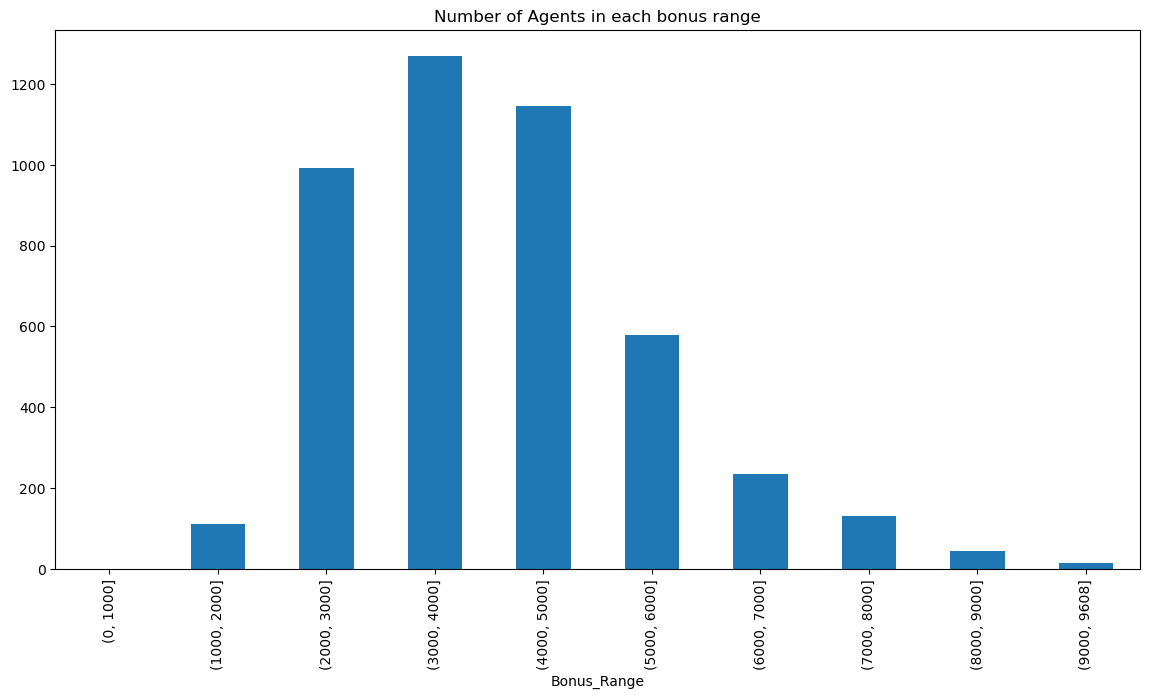

In [41]:
bonus_range = pd.cut(df["AgentBonus"], 
                     bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, df["AgentBonus"].max()])
df["Bonus_Range"] = bonus_range
df["Bonus_Range"].value_counts().sort_index().plot(kind = "bar")
plt.title("Number of Agents in each bonus range")
plt.show()

In [42]:
df.describe()["Age"]

count    4520.000000
mean       14.405752
std         8.771646
min         2.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        58.000000
Name: Age, dtype: float64

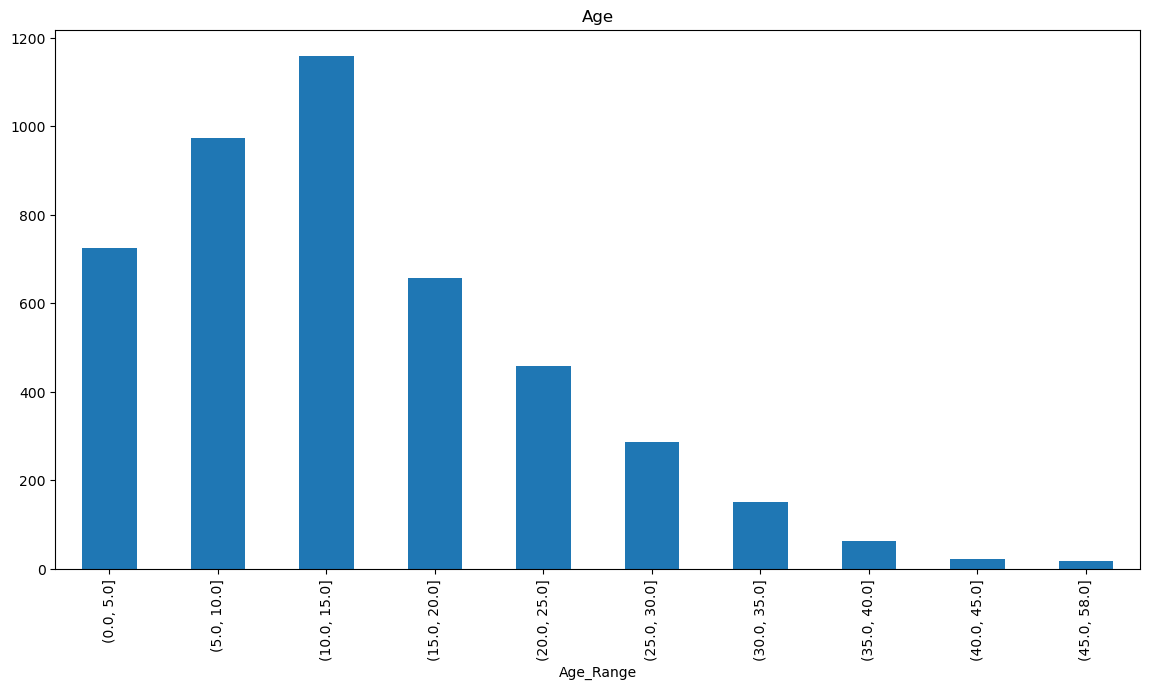

In [43]:
age_range = pd.cut(df["Age"], 
                     bins = [0,5,10,15,20,25,30,35,40,45, df["Age"].max()])
df["Age_Range"] = age_range
df["Age_Range"].value_counts().sort_index().plot(kind = "bar")
plt.title("Age")
plt.show()

In [44]:
df.head().T

0                    1              2  \
AgentBonus                    4409                 2214           4273   
Age                           22.0                 11.0           26.0   
CustTenure                     4.0                  2.0            4.0   
Channel                      Agent  Third Party Partner          Agent   
Occupation                Salaried             Salaried    Free Lancer   
EducationField            Graduate             Graduate  Post Graduate   
Gender                      Female                 Male           Male   
ExistingProdType                 3                    4              4   
Designation                Manager              Manager      Executive   
NumberOfPolicy                 2.0                  4.0            3.0   
MaritalStatus               Single             Divorced      Unmarried   
MonthlyIncome              20993.0              20130.0        17090.0   
Complaint                        1                    0              1   
ExistingPolicyTenure           2.0                  3.0            2.0   
SumAssured                806761.0             294502.0       578976.5   
Zone                         North                North          North   
PaymentMethod          Half Yearly               Yearly         Yearly   
LastMonthCalls                   5                    7              0   
CustCareScore                  2.0                  3.0            3.0   
Bonus_Range           (4000, 5000]         (2000, 3000]   (4000, 5000]   
Age_Range             (20.0, 25.0]         (10.0, 15.0]   (25.0, 30.0]   

                                        3               4  
AgentBonus                           1791            2955  
Age                                  11.0             6.0  
CustTenure                           13.0            13.0  
Channel               Third Party Partner           Agent  
Occupation                       Salaried  Small Business  
EducationField                   Graduate  Under Graduate  
Gender                             Female            Male  
ExistingProdType                        3               3  
Designation                     Executive       Executive  
NumberOfPolicy                        3.0             4.0  
MaritalStatus                    Divorced        Divorced  
MonthlyIncome                     17909.0         18468.0  
Complaint                               1               0  
ExistingPolicyTenure                  2.0             4.0  
SumAssured                       268635.0        366405.0  
Zone                                 West            West  
PaymentMethod                 Half Yearly     Half Yearly  
LastMonthCalls                          0               2  
CustCareScore                         5.0             5.0  
Bonus_Range                  (1000, 2000]    (2000, 3000]  
Age_Range                    (10.0, 15.0]     (5.0, 10.0]

In [45]:
df.drop(['Age_Range'], axis = 'columns', inplace = True)

In [46]:
df.drop(['Bonus_Range'], axis = 'columns', inplace = True)

In [47]:
# def univariateAnalysis_numeric(column,i):
#     fig.set_size_inches(20,40)
#     a=sns.distplot(data[column],ax=axes[i][0]);
#     a.set_title(column + " Distribution",fontsize=10);

#     a=sns.boxplot(data[column],ax=axes[i][1]);
#     a.set_title(column + " Boxplot",fontsize=10);
    
    
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [48]:
# creating a seperate dataframe for numerical attributes

df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
columnlen=len(lstnumericcolumns)
print("Total Numerical Columns = ",columnlen)

Total Numerical Columns =  11


Description of AgentBonus
----------------------------------------------------------------------------
count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: AgentBonus, dtype: float64 

Distribution of AgentBonus
----------------------------------------------------------------------------


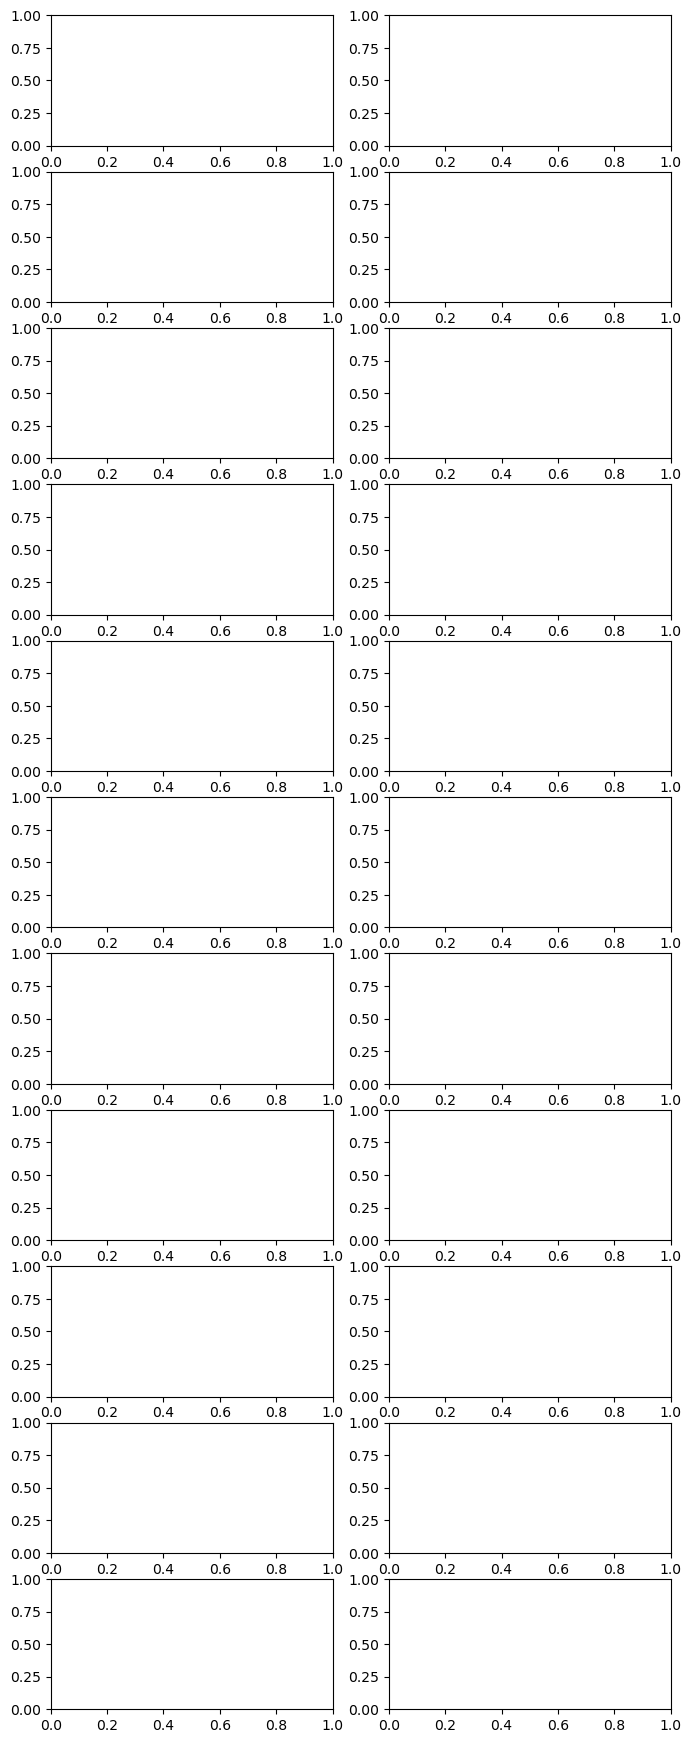

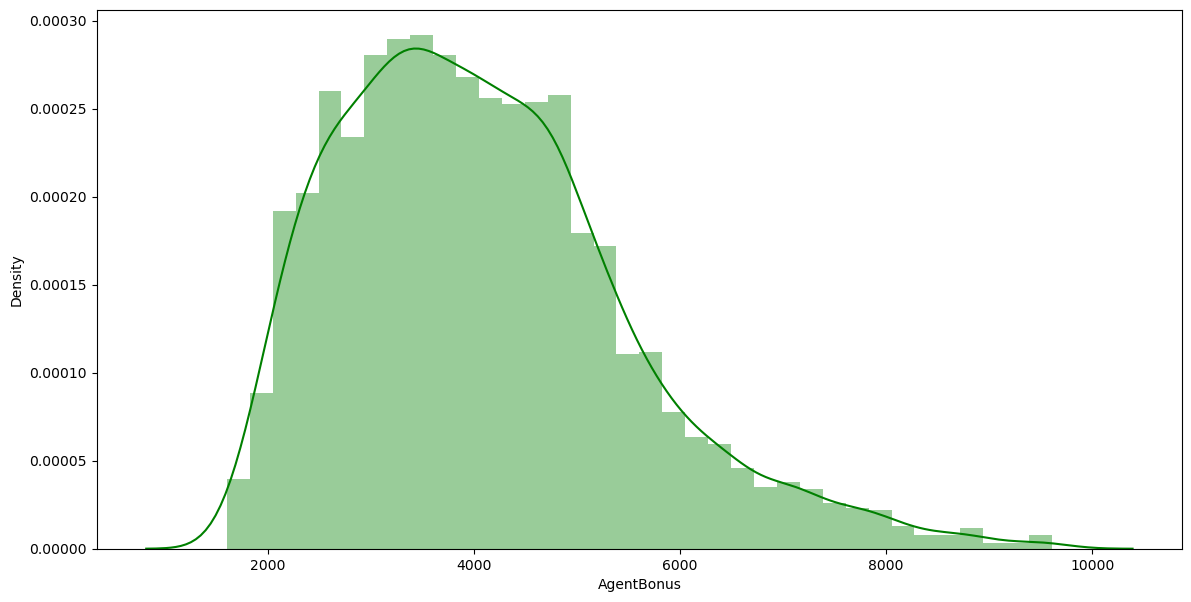

BoxPlot of AgentBonus
----------------------------------------------------------------------------


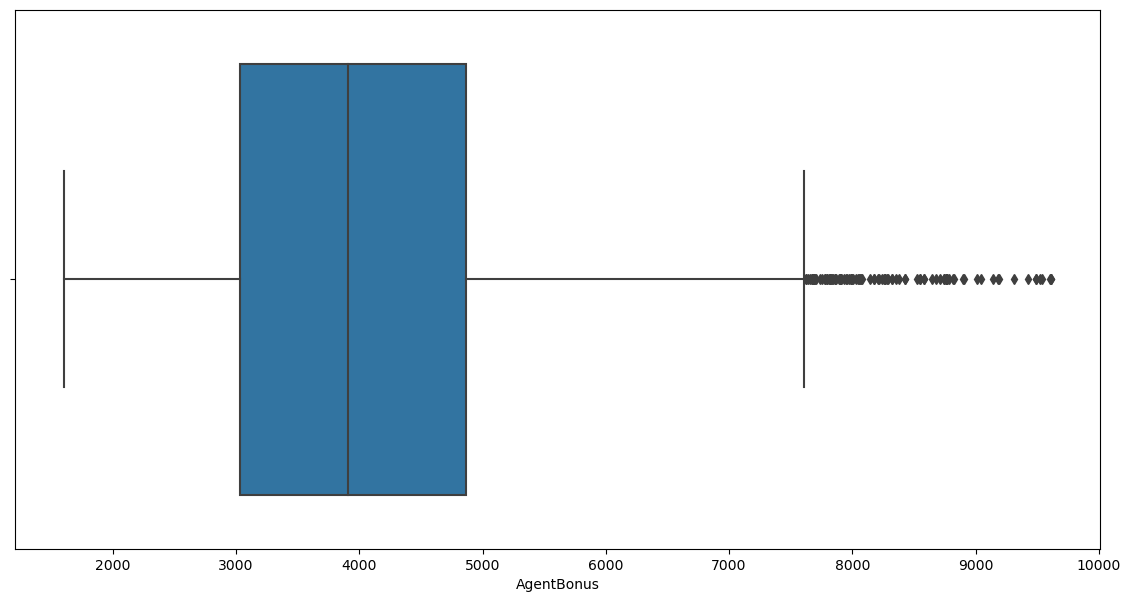

Description of Age
----------------------------------------------------------------------------
count    4520.000000
mean       14.405752
std         8.771646
min         2.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        58.000000
Name: Age, dtype: float64 

Distribution of Age
----------------------------------------------------------------------------


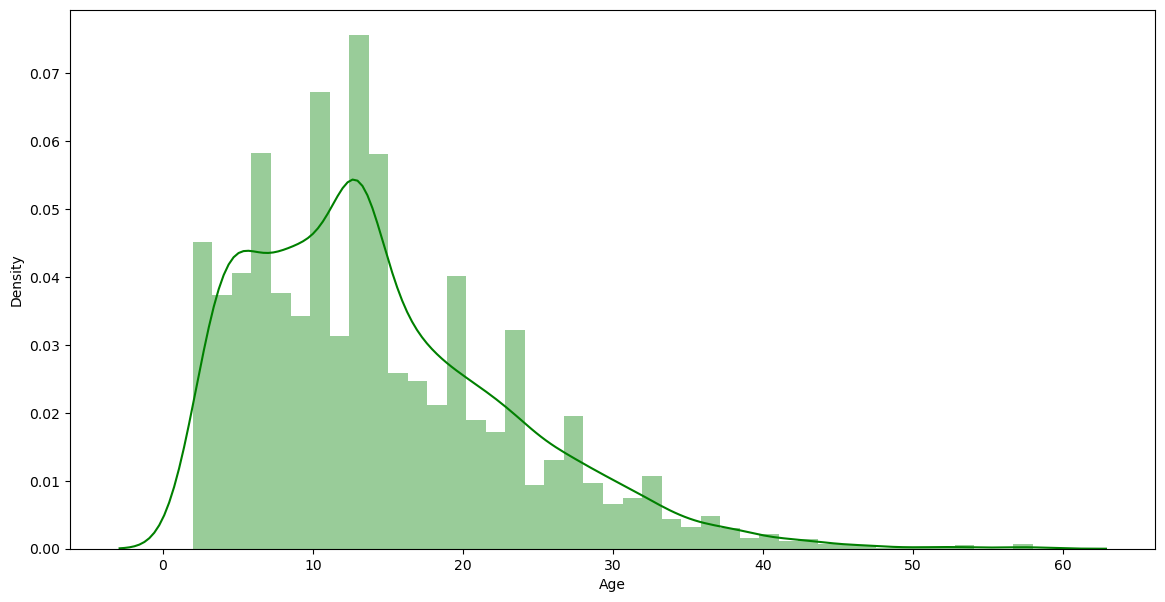

BoxPlot of Age
----------------------------------------------------------------------------


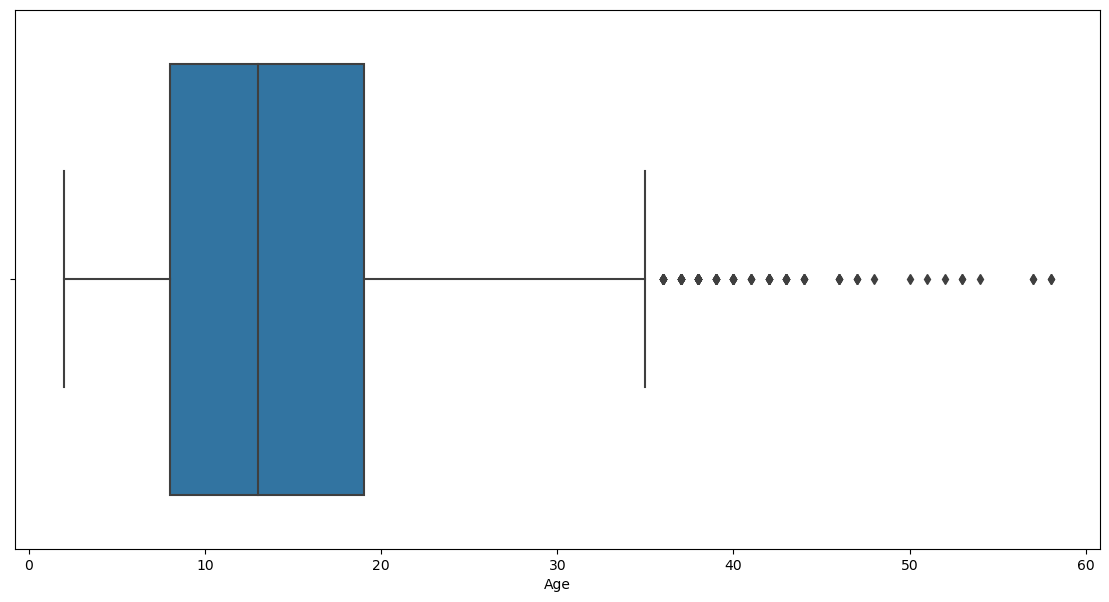

Description of CustTenure
----------------------------------------------------------------------------
count    4520.000000
mean       14.395575
std         8.742521
min         2.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        57.000000
Name: CustTenure, dtype: float64 

Distribution of CustTenure
----------------------------------------------------------------------------


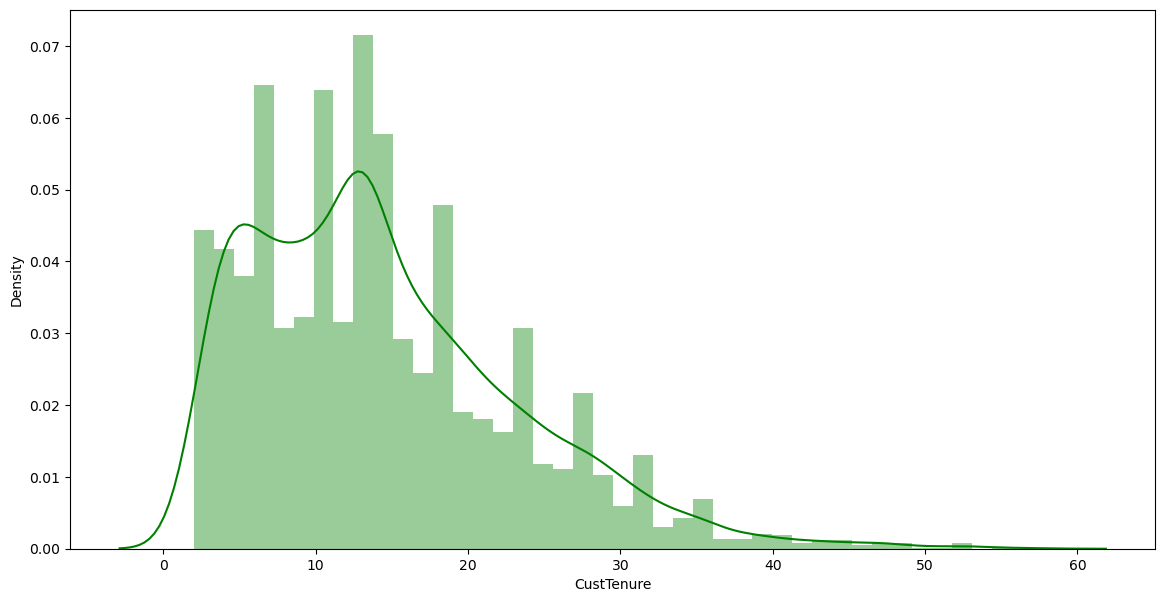

BoxPlot of CustTenure
----------------------------------------------------------------------------


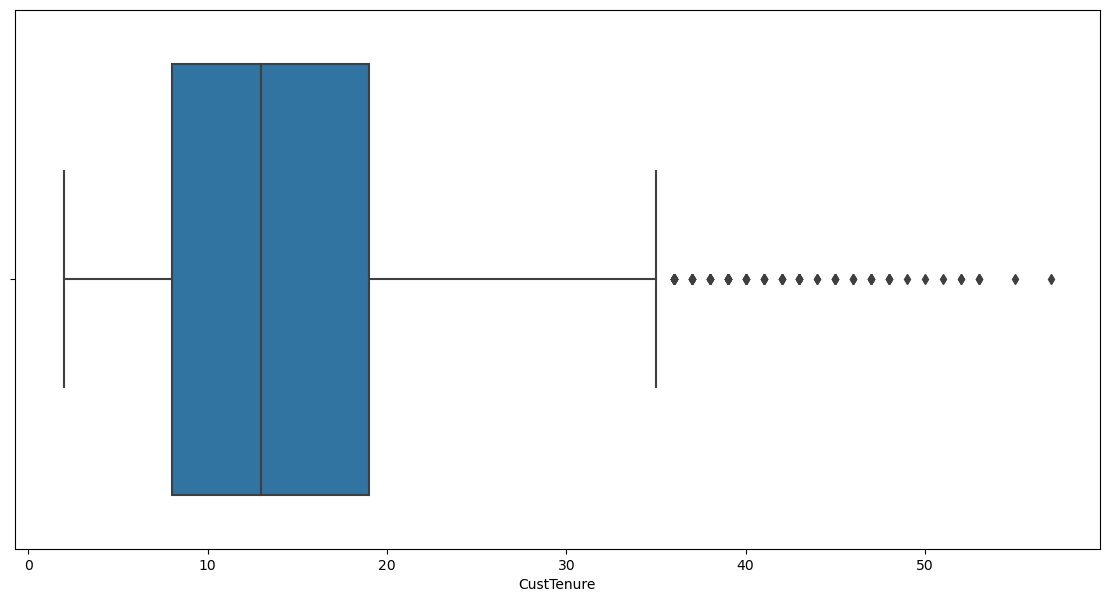

Description of ExistingProdType
----------------------------------------------------------------------------
count    4520.000000
mean        3.688938
std         1.015769
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: ExistingProdType, dtype: float64 

Distribution of ExistingProdType
----------------------------------------------------------------------------


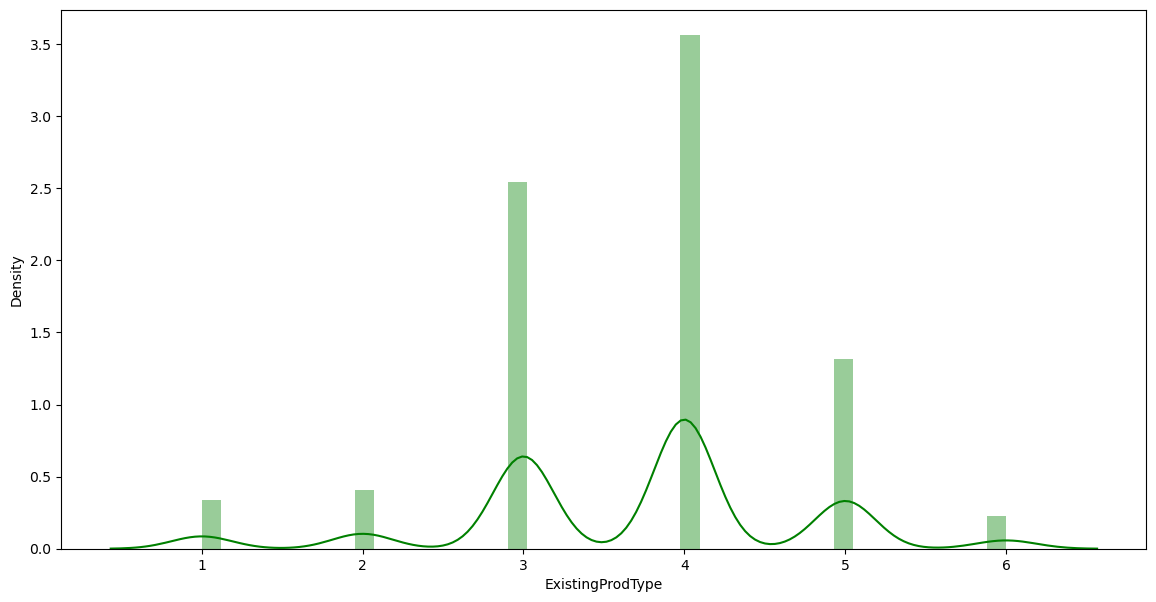

BoxPlot of ExistingProdType
----------------------------------------------------------------------------


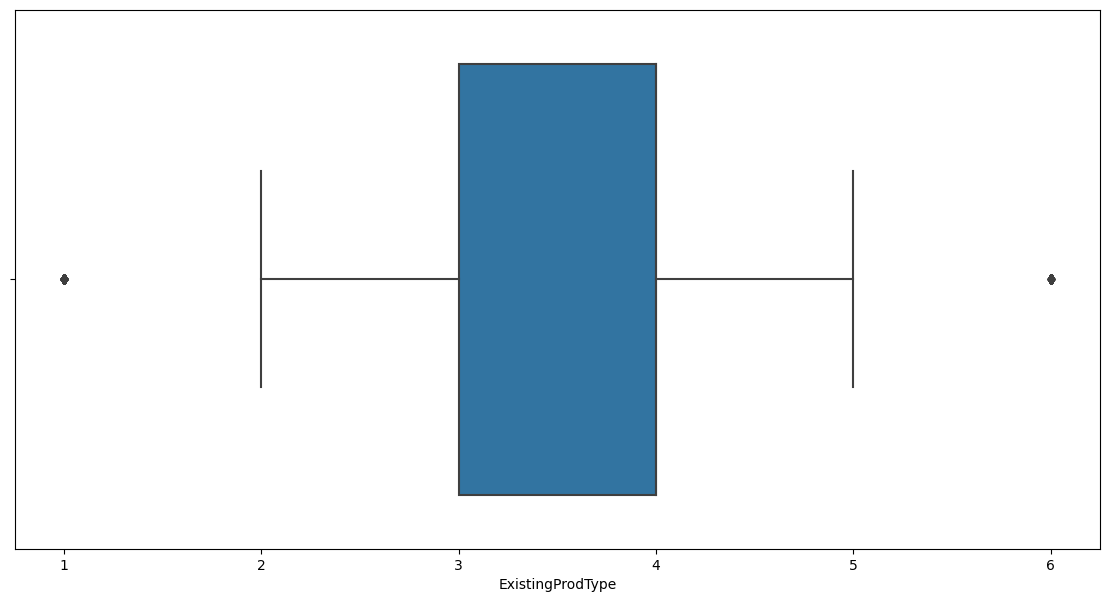

Description of NumberOfPolicy
----------------------------------------------------------------------------
count    4520.000000
mean        3.569690
std         1.449302
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: NumberOfPolicy, dtype: float64 

Distribution of NumberOfPolicy
----------------------------------------------------------------------------


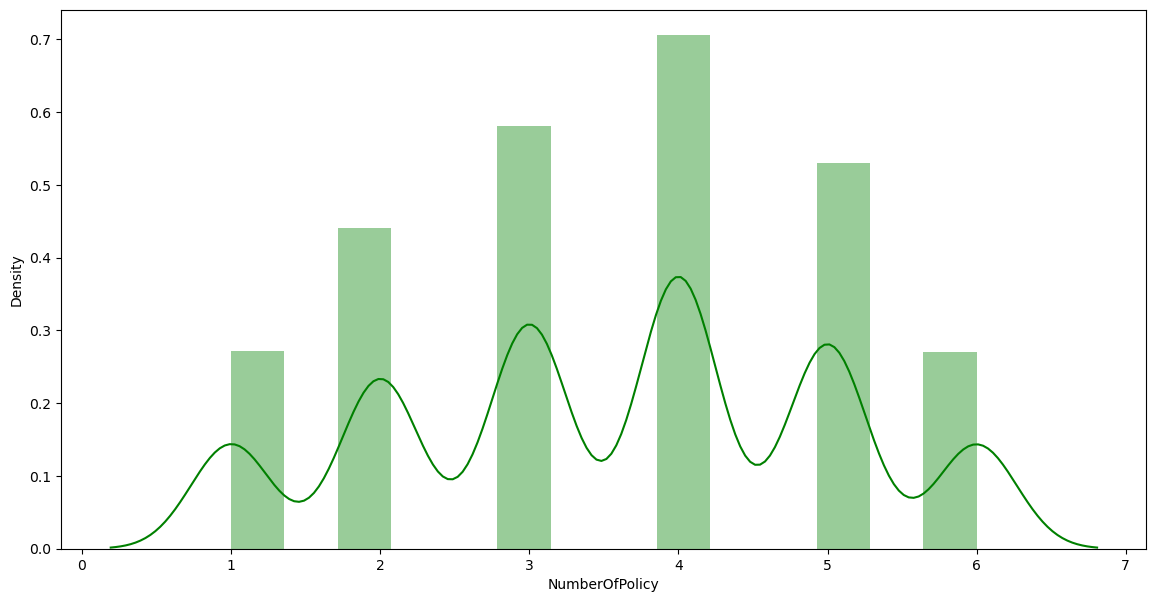

BoxPlot of NumberOfPolicy
----------------------------------------------------------------------------


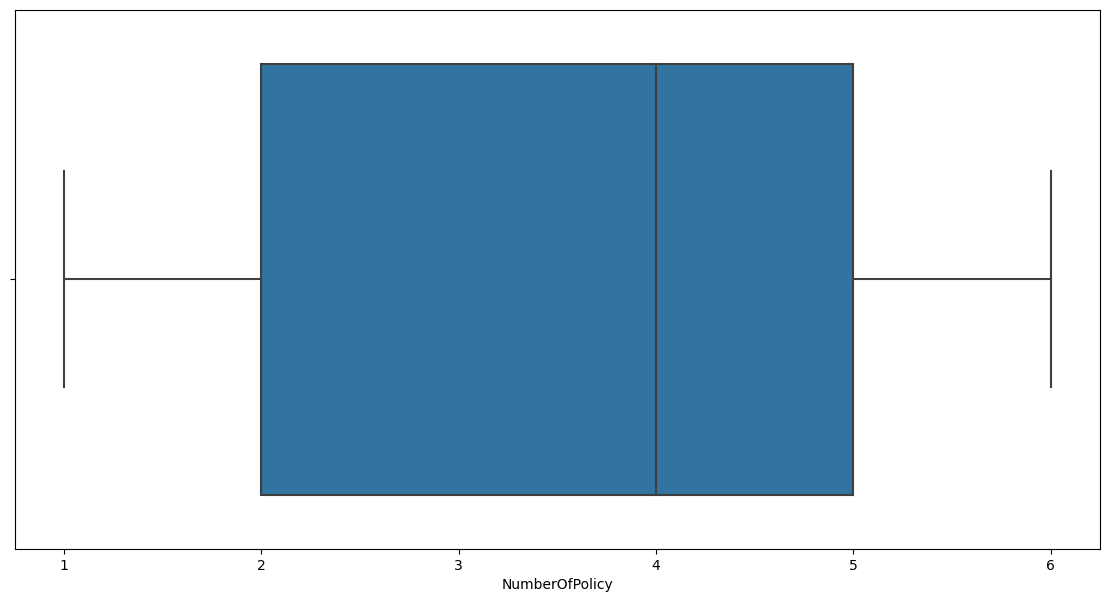

Description of MonthlyIncome
----------------------------------------------------------------------------
count     4520.000000
mean     22823.253097
std       4764.892420
min      16009.000000
25%      19858.000000
50%      21606.000000
75%      24531.750000
max      38456.000000
Name: MonthlyIncome, dtype: float64 

Distribution of MonthlyIncome
----------------------------------------------------------------------------


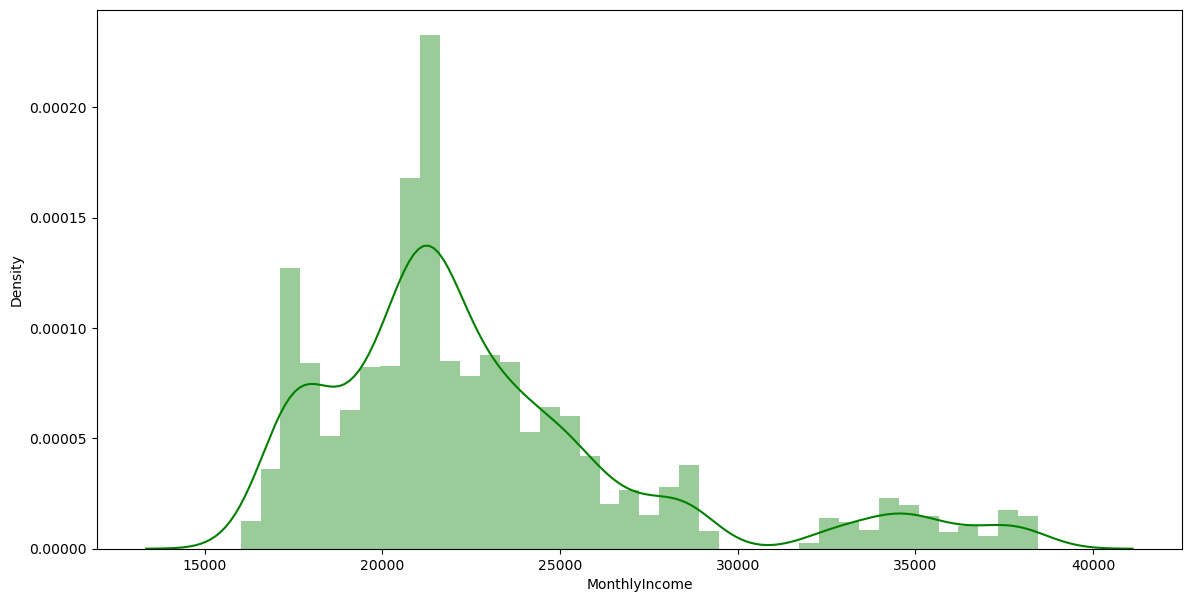

BoxPlot of MonthlyIncome
----------------------------------------------------------------------------


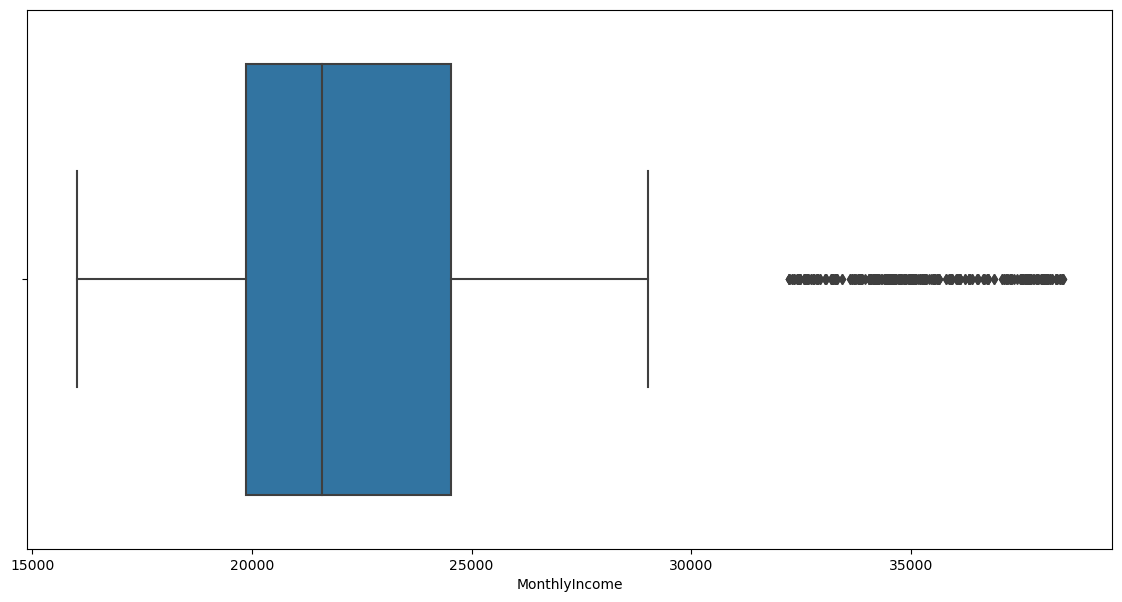

Description of Complaint
----------------------------------------------------------------------------
count    4520.000000
mean        0.287168
std         0.452491
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Complaint, dtype: float64 

Distribution of Complaint
----------------------------------------------------------------------------


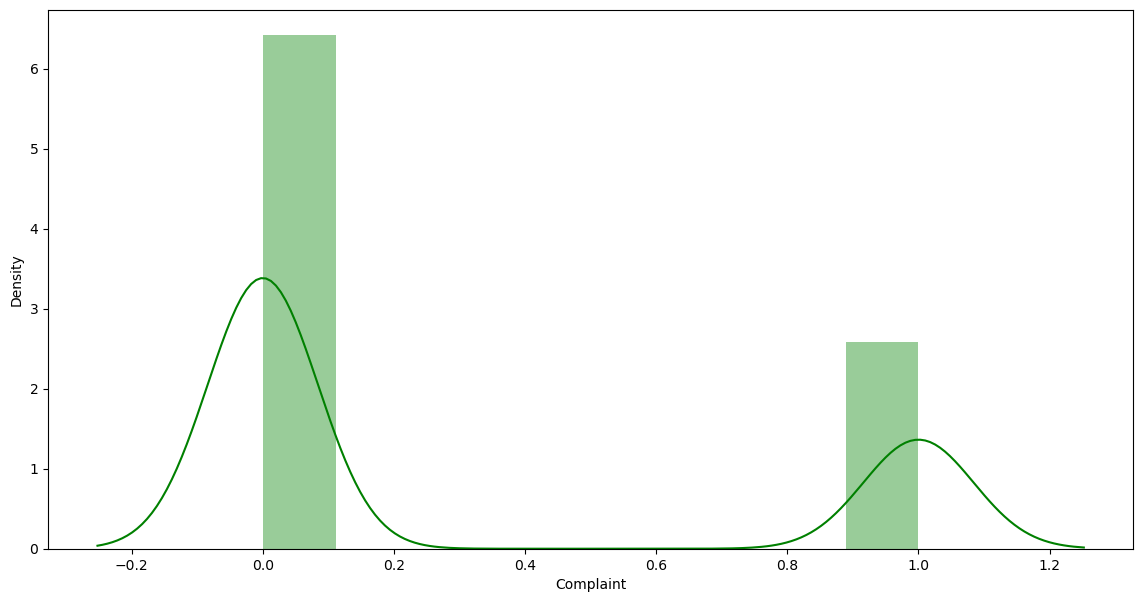

BoxPlot of Complaint
----------------------------------------------------------------------------


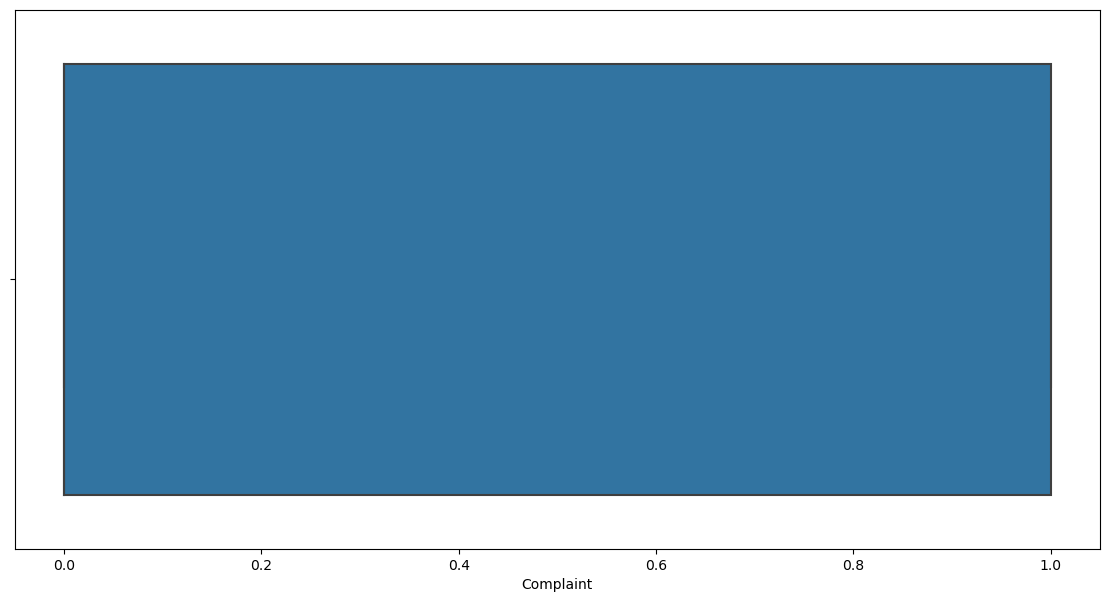

Description of ExistingPolicyTenure
----------------------------------------------------------------------------
count    4520.000000
mean        4.084071
std         3.285152
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        25.000000
Name: ExistingPolicyTenure, dtype: float64 

Distribution of ExistingPolicyTenure
----------------------------------------------------------------------------


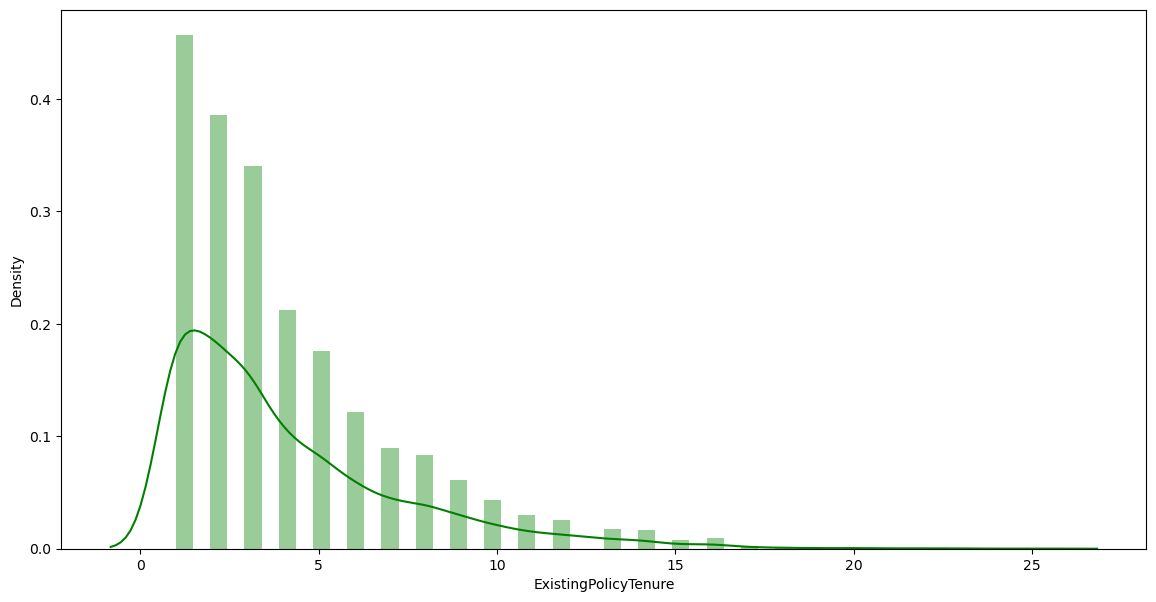

BoxPlot of ExistingPolicyTenure
----------------------------------------------------------------------------


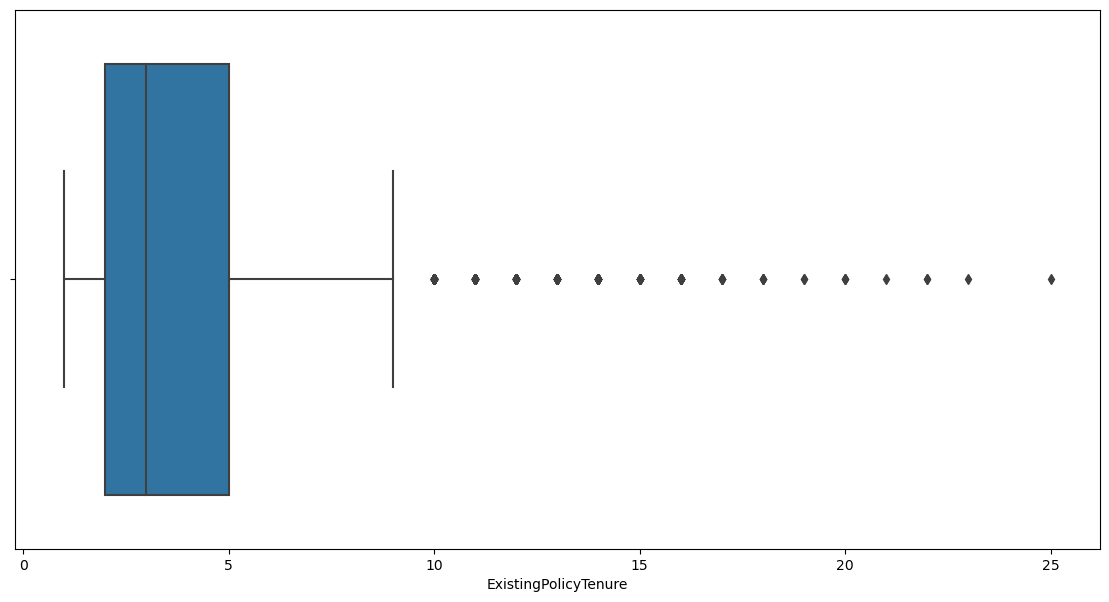

Description of SumAssured
----------------------------------------------------------------------------
count    4.520000e+03
mean     6.186020e+05
std      2.421172e+05
min      1.685360e+05
25%      4.444762e+05
50%      5.789765e+05
75%      7.500105e+05
max      1.838496e+06
Name: SumAssured, dtype: float64 

Distribution of SumAssured
----------------------------------------------------------------------------


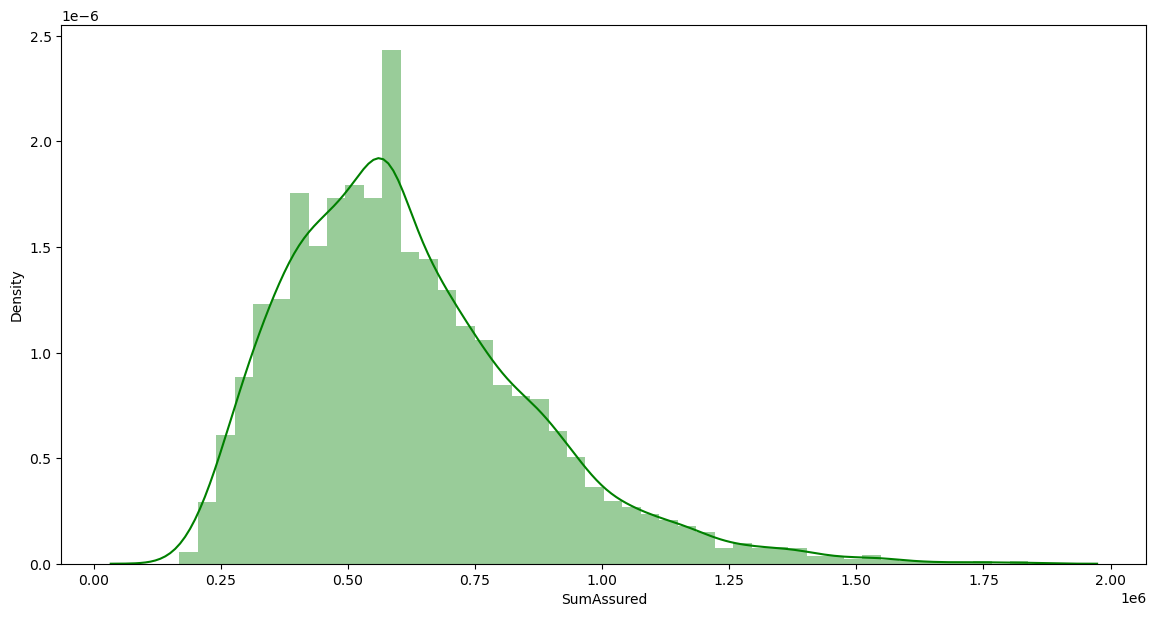

BoxPlot of SumAssured
----------------------------------------------------------------------------


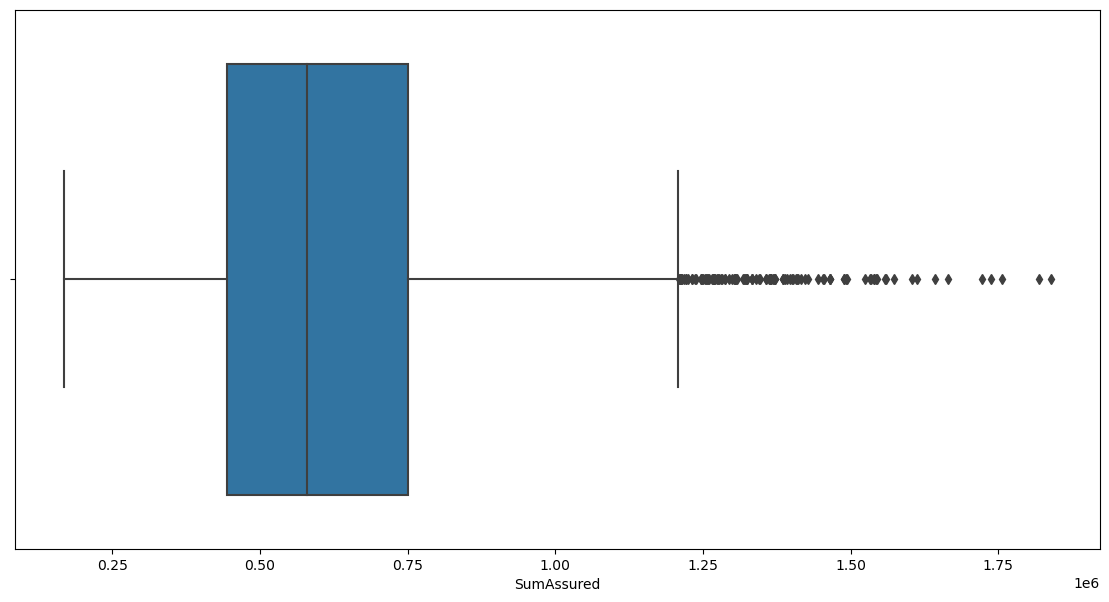

Description of LastMonthCalls
----------------------------------------------------------------------------
count    4520.000000
mean        4.626991
std         3.620132
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max        18.000000
Name: LastMonthCalls, dtype: float64 

Distribution of LastMonthCalls
----------------------------------------------------------------------------


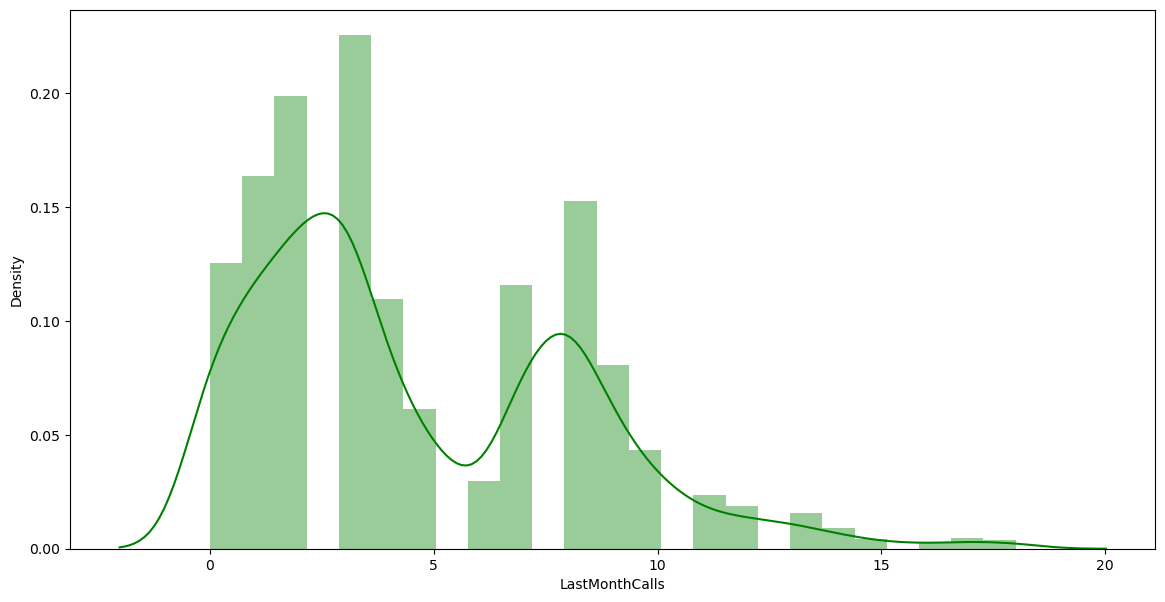

BoxPlot of LastMonthCalls
----------------------------------------------------------------------------


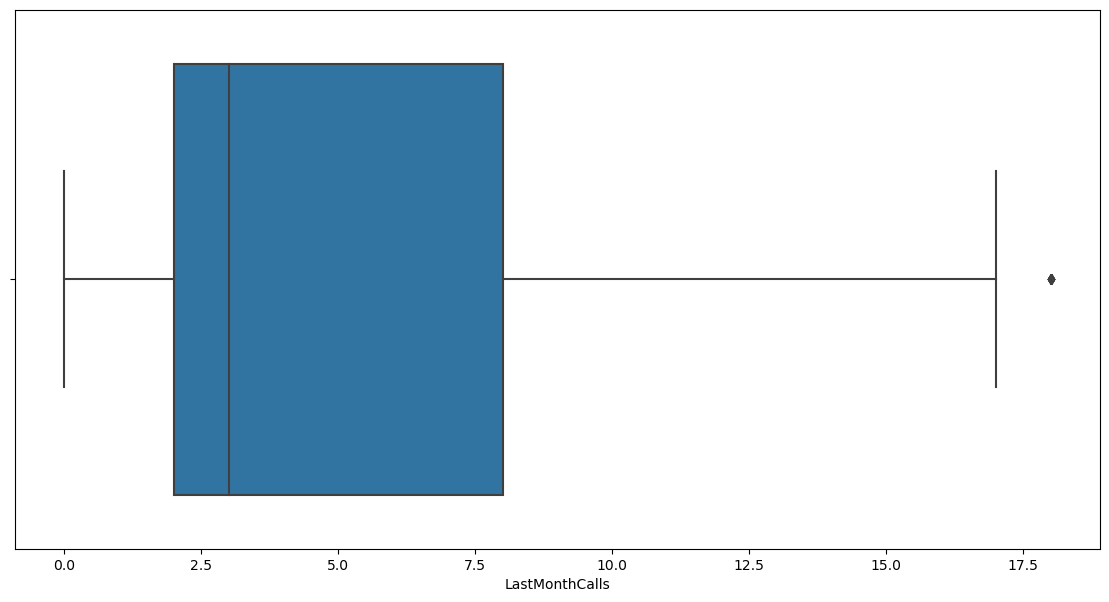

Description of CustCareScore
----------------------------------------------------------------------------
count    4520.000000
mean        3.066814
std         1.375007
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: CustCareScore, dtype: float64 

Distribution of CustCareScore
----------------------------------------------------------------------------


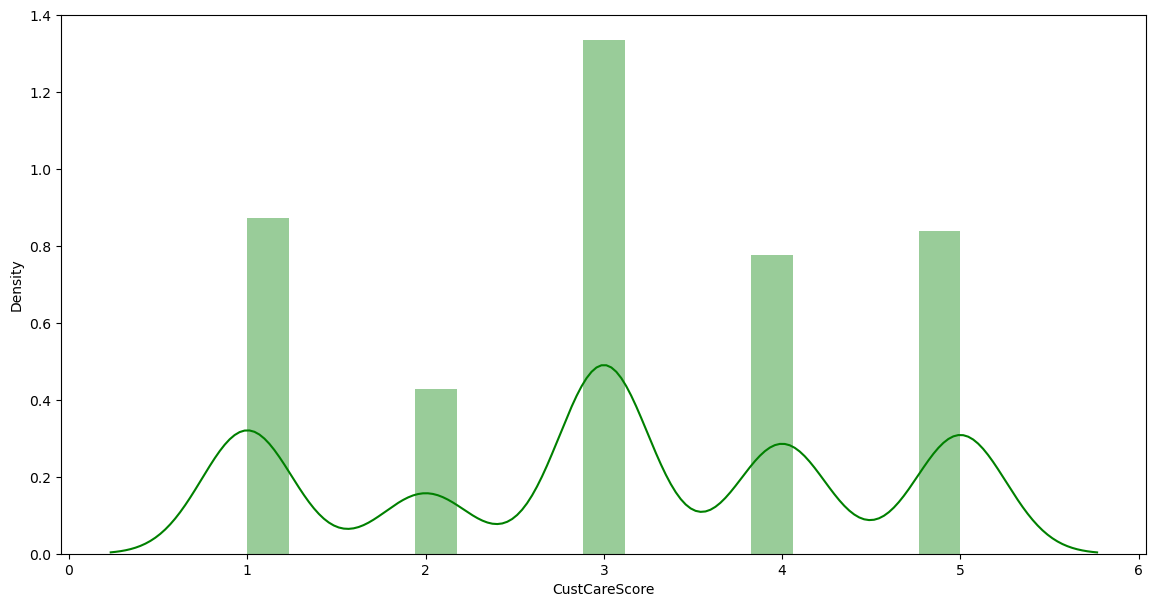

BoxPlot of CustCareScore
----------------------------------------------------------------------------


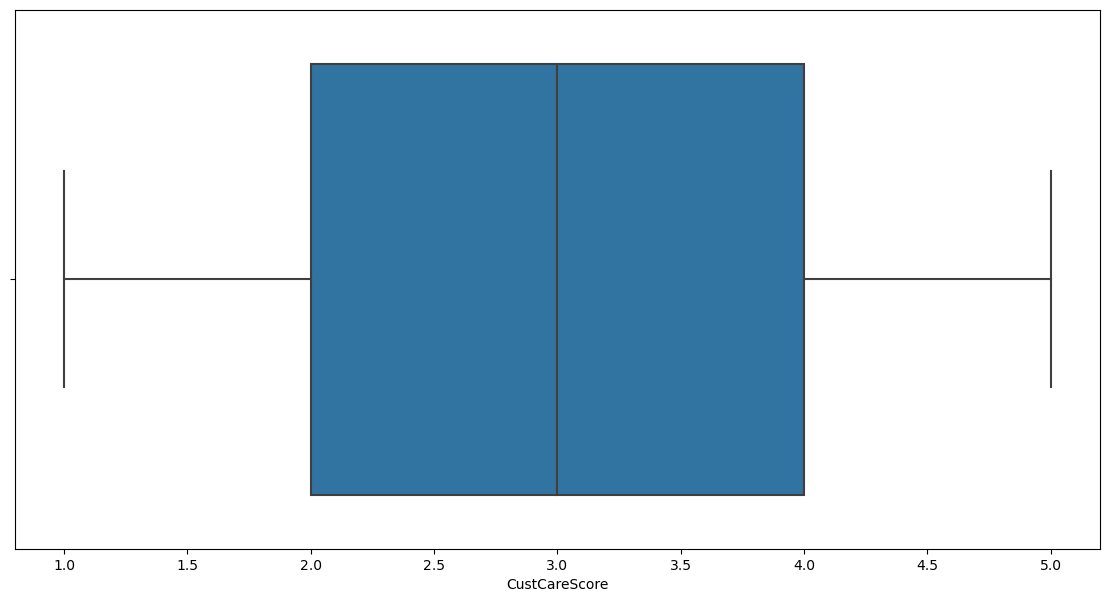

In [49]:
fig,axes=plt.subplots(nrows=columnlen,ncols=2,figsize=(8, 2 * columnlen))
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,lstnumericcolumns.index(x))

In [50]:
df_num.skew()

AgentBonus              0.822348
Age                     0.998425
CustTenure              0.981002
ExistingProdType       -0.401100
NumberOfPolicy         -0.108161
MonthlyIncome           1.434315
Complaint               0.941129
ExistingPolicyTenure    1.601730
SumAssured              1.002018
LastMonthCalls          0.810417
CustCareScore          -0.138120
dtype: float64

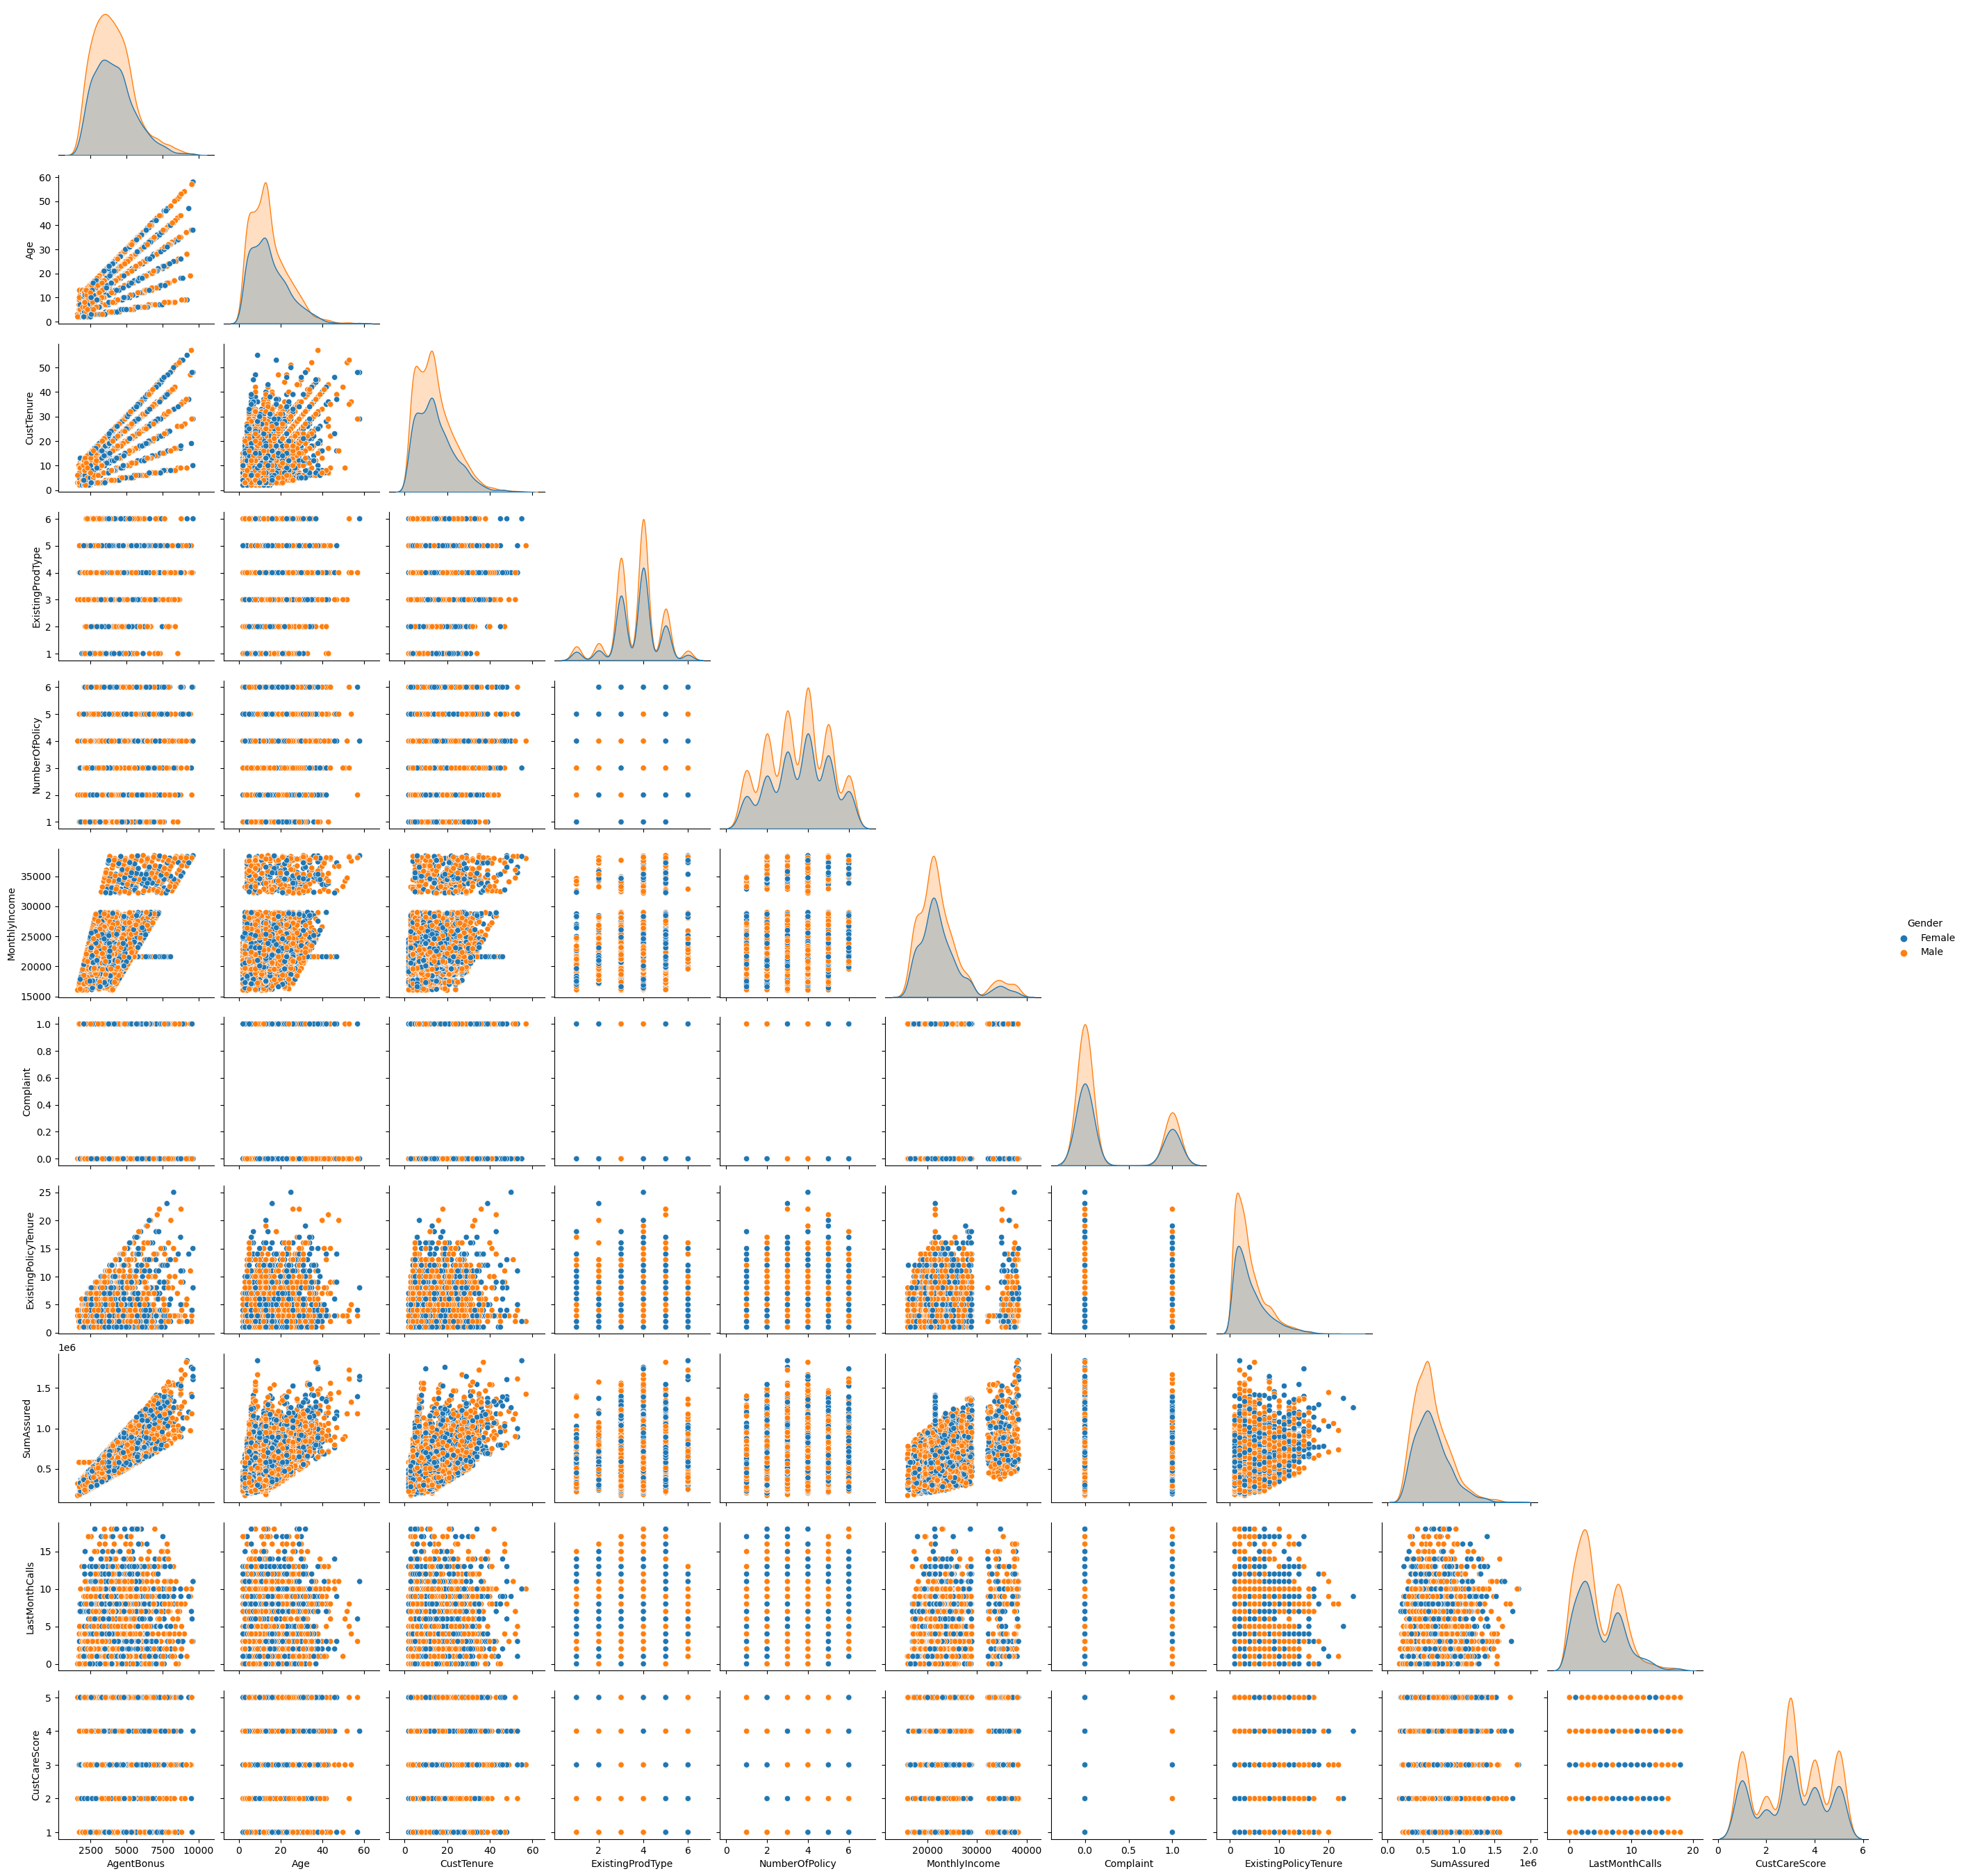

In [51]:
sns.pairplot(df, diag_kind='kde',hue="Gender", corner=True)  
plt.show()

In [52]:
corr = df_num.corr(method='pearson')

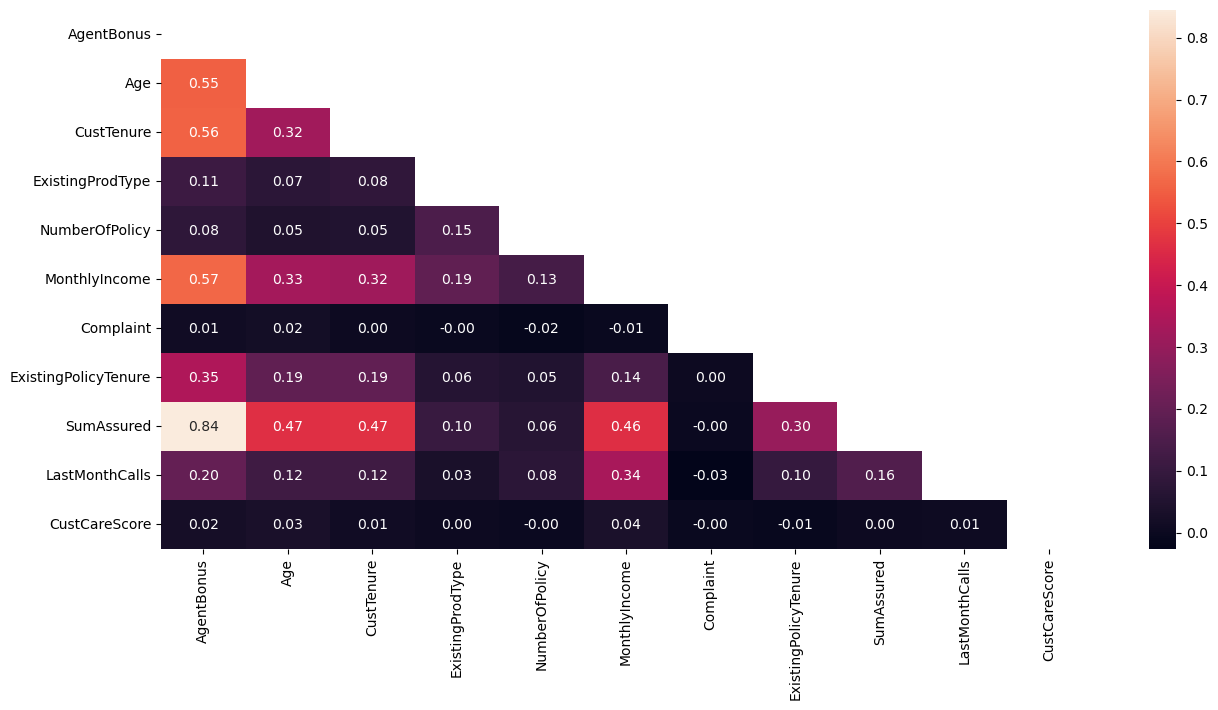

In [53]:
mask = np.triu(np.ones_like(corr, dtype=bool))  # Change np.bool to bool
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f', mask=mask, ax=ax)
plt.show()

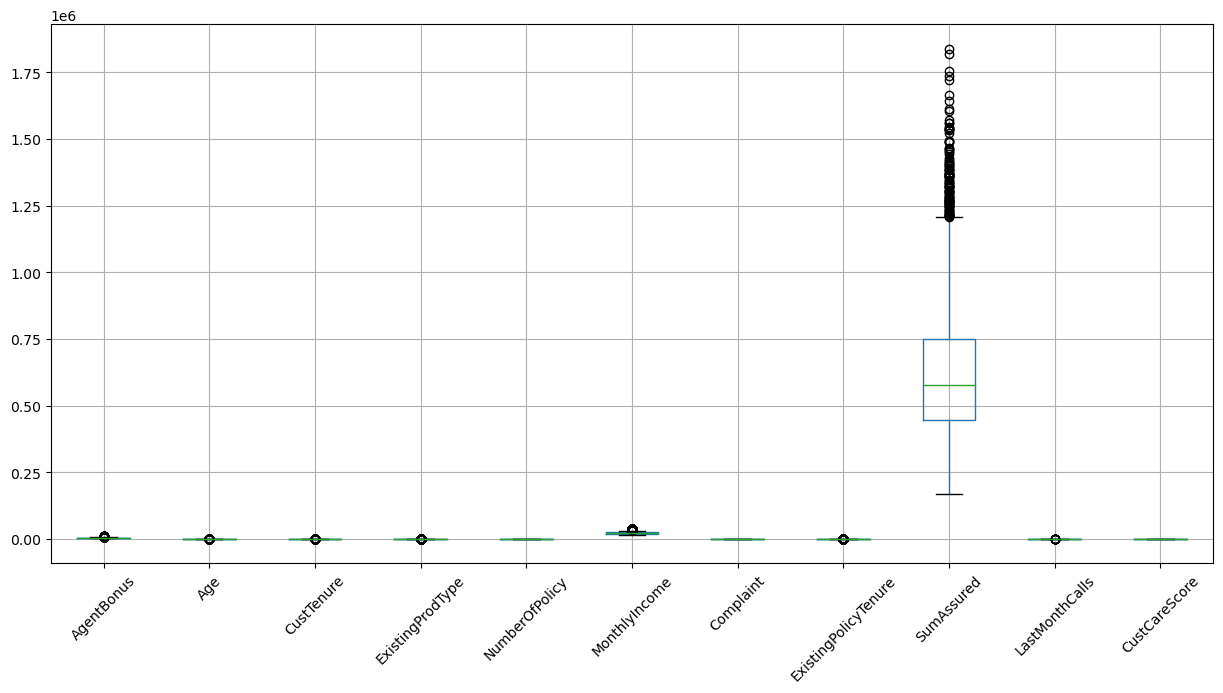

In [54]:
df.boxplot(figsize=(15,7))
plt.xticks(rotation=45)
plt.show()

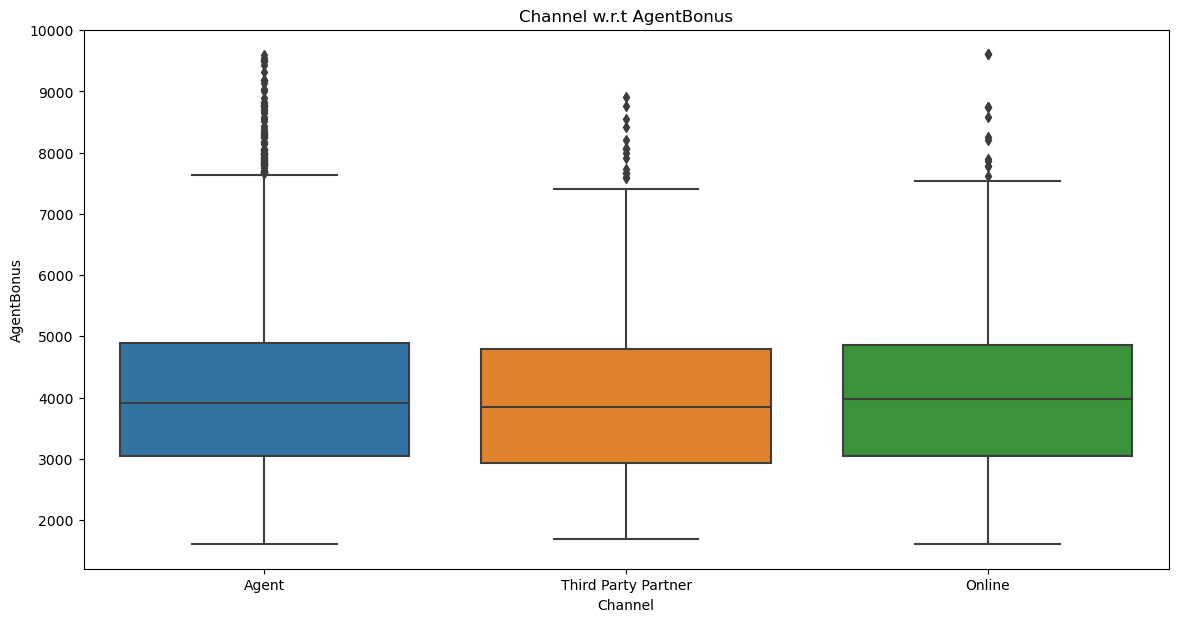

In [55]:
sns.boxplot(x=df.Channel,y=df.AgentBonus);
plt.title("Channel w.r.t AgentBonus");

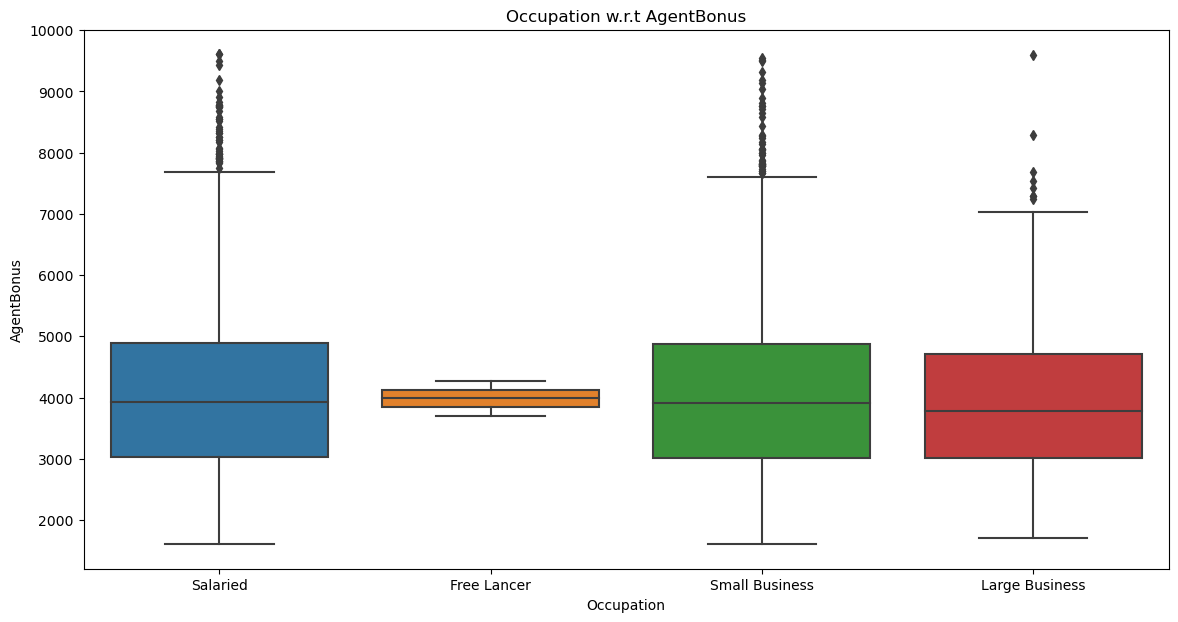

In [56]:
sns.boxplot(x=df.Occupation,y=df.AgentBonus)
plt.title("Occupation w.r.t AgentBonus");

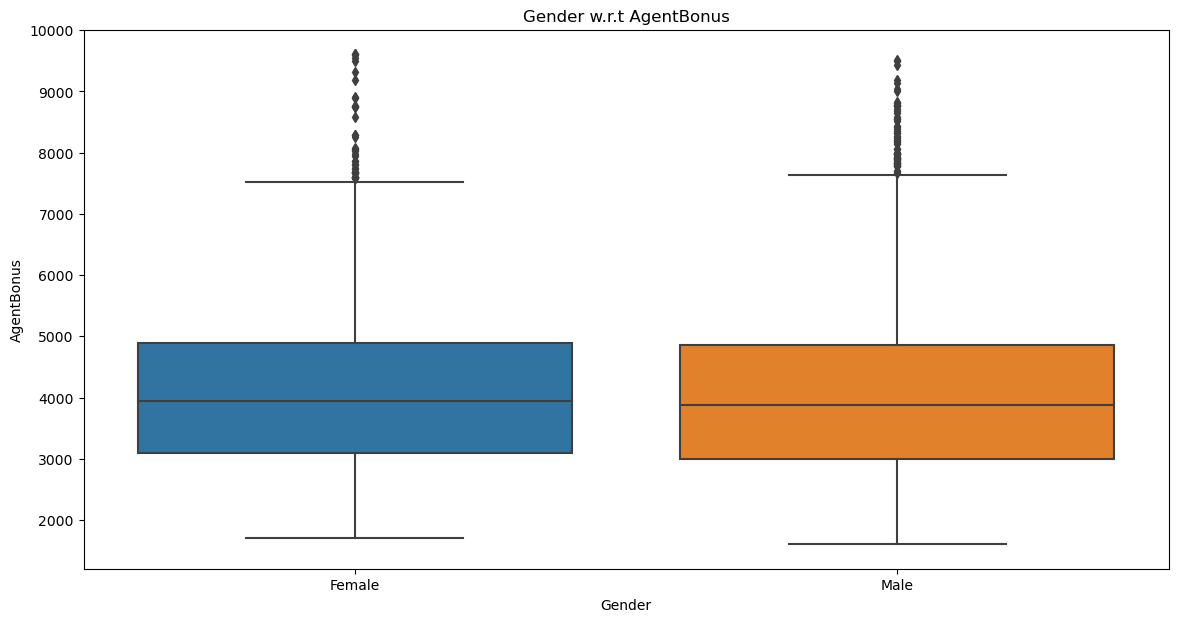

In [57]:
sns.boxplot(x=df.Gender,y=df.AgentBonus)
plt.title("Gender w.r.t AgentBonus");

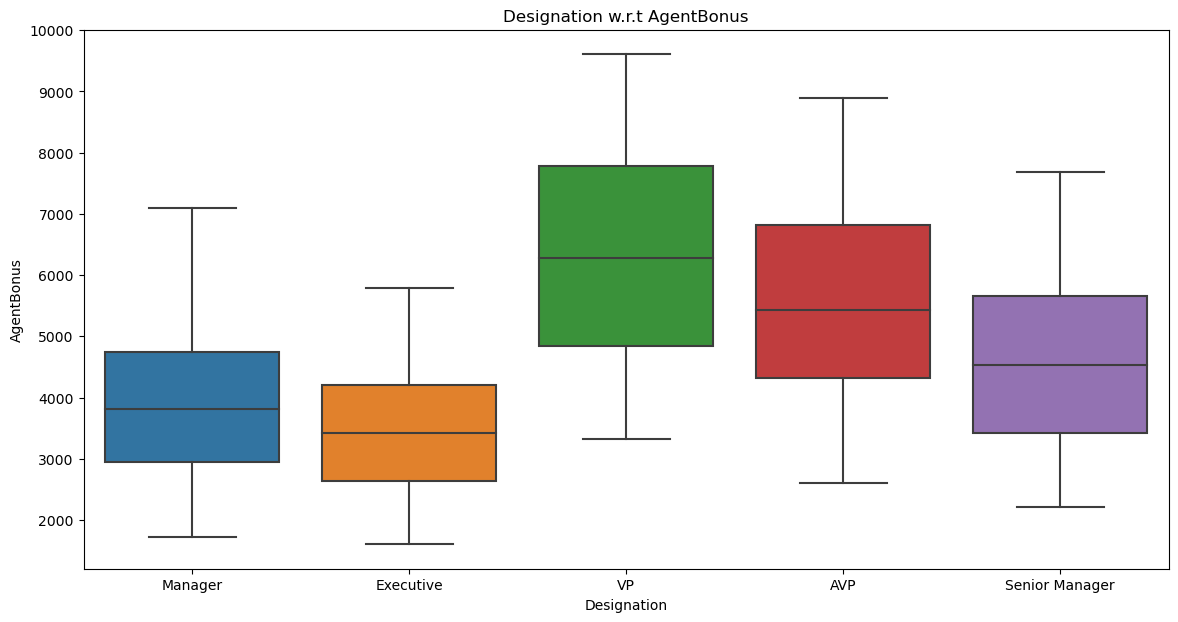

In [58]:
sns.boxplot(x=df.Designation,y=df.AgentBonus)
plt.title("Designation w.r.t AgentBonus");

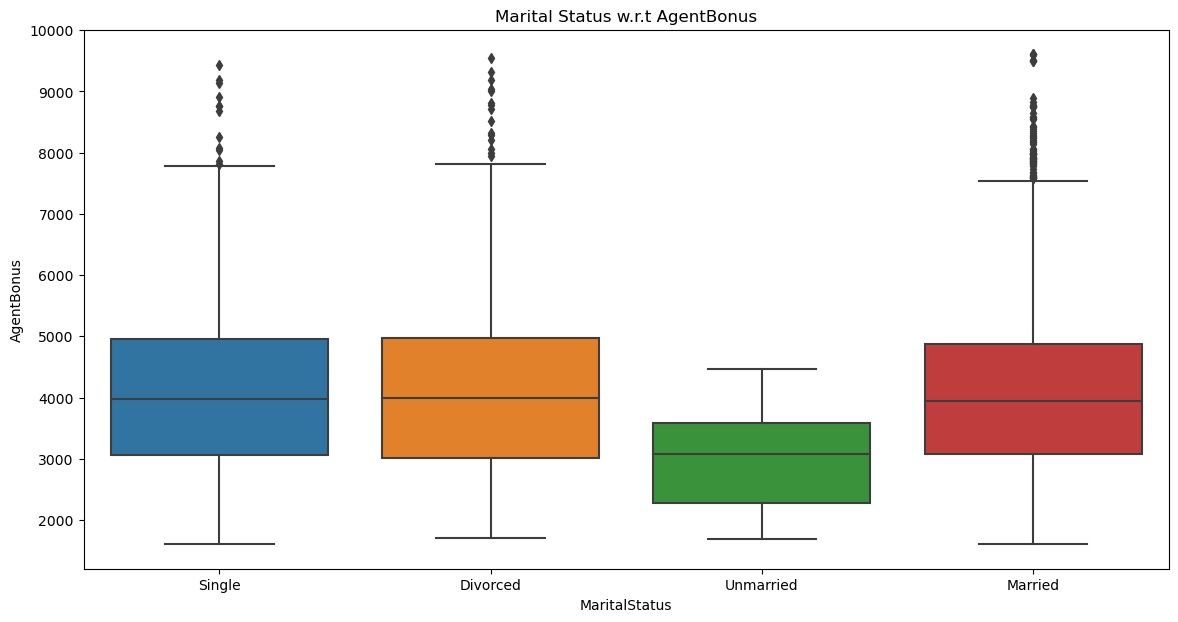

In [59]:
sns.boxplot(x=df.MaritalStatus,y=df.AgentBonus)
plt.title("Marital Status w.r.t AgentBonus");

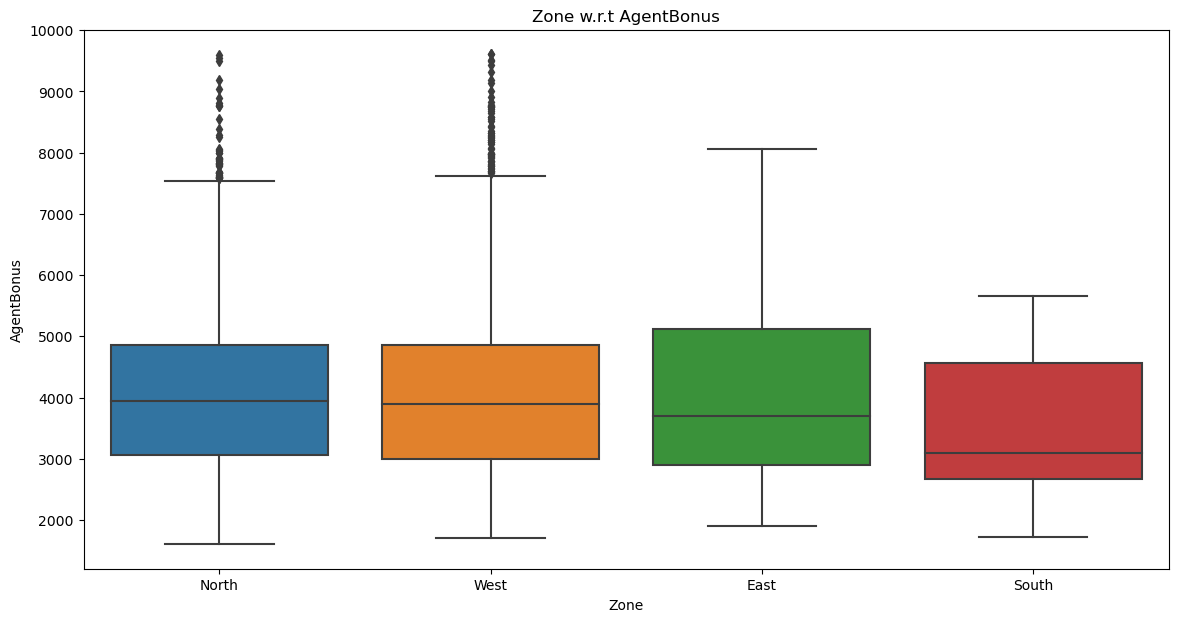

In [60]:
sns.boxplot(x=df.Zone,y=df.AgentBonus)
plt.title("Zone w.r.t AgentBonus");

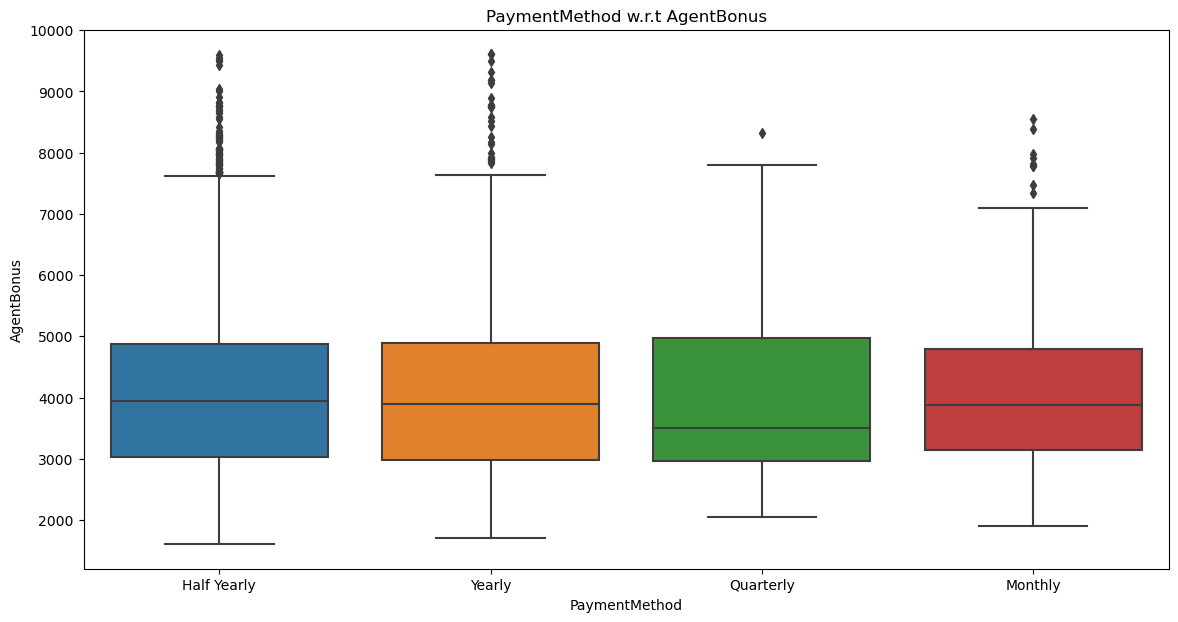

In [61]:
sns.boxplot(x=df.PaymentMethod,y=df.AgentBonus)
plt.title("PaymentMethod w.r.t AgentBonus");

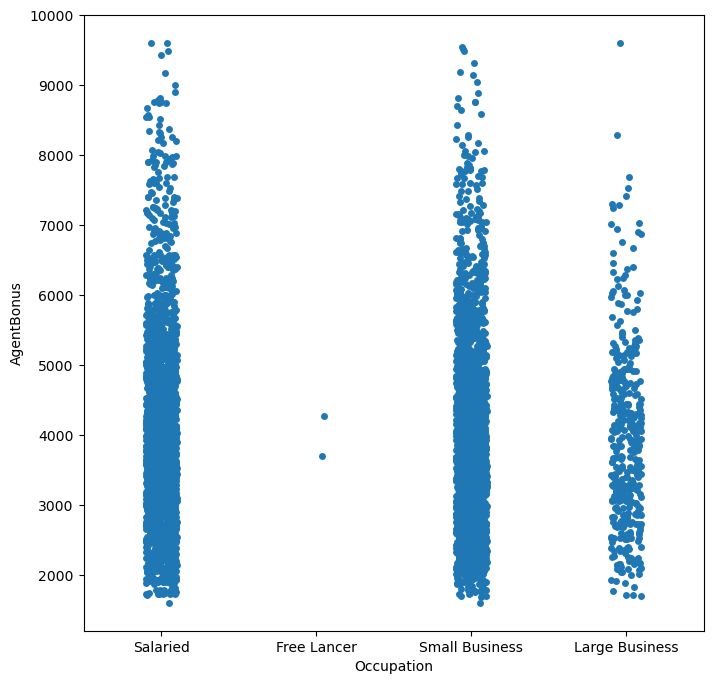

In [62]:
plt.figure(figsize=(8, 8))
sns.stripplot(x='Occupation', y='AgentBonus', data=df, jitter=True)
plt.show()

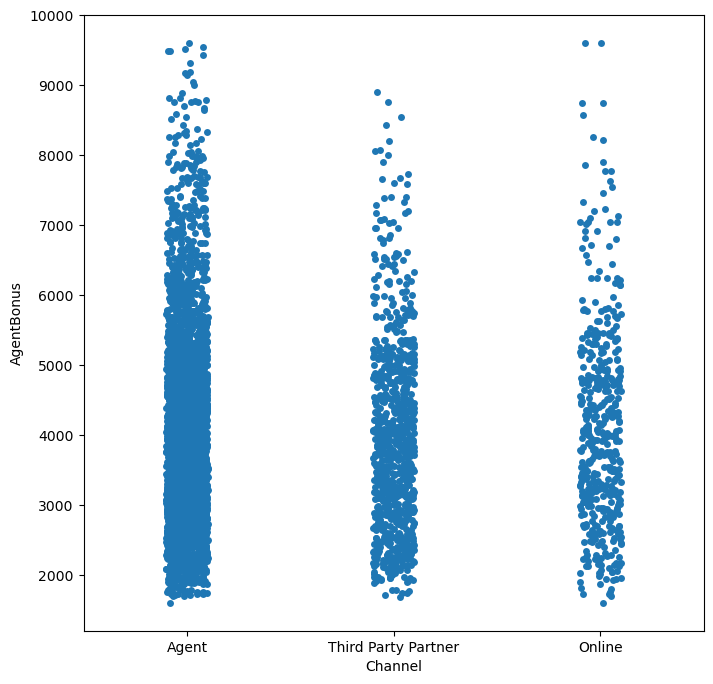

In [63]:
plt.figure(figsize=(8, 8))
sns.stripplot(x='Channel', y='AgentBonus', data=df, jitter=True)
plt.show()

In [64]:
plt.figure(figsize=(8, 8))
sns.stripplot(x='Gender', y='AgentBonus', data=df, jitter=True)
plt.show()

In [65]:
plt.figure(figsize=(8, 8))
sns.stripplot(x='Designation', y='AgentBonus', data=df, jitter=True)
plt.show()

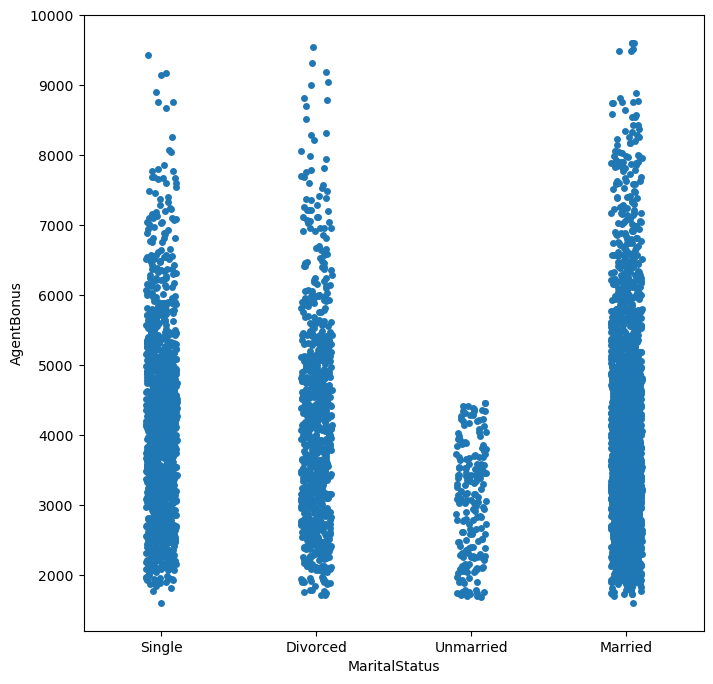

In [66]:
plt.figure(figsize=(8, 8))
sns.stripplot(x='MaritalStatus', y='AgentBonus', data=df, jitter=True)
plt.show()

In [67]:
plt.figure(figsize=(8, 8))
sns.stripplot(x='Zone', y='AgentBonus', data=df, jitter=True)
plt.show()

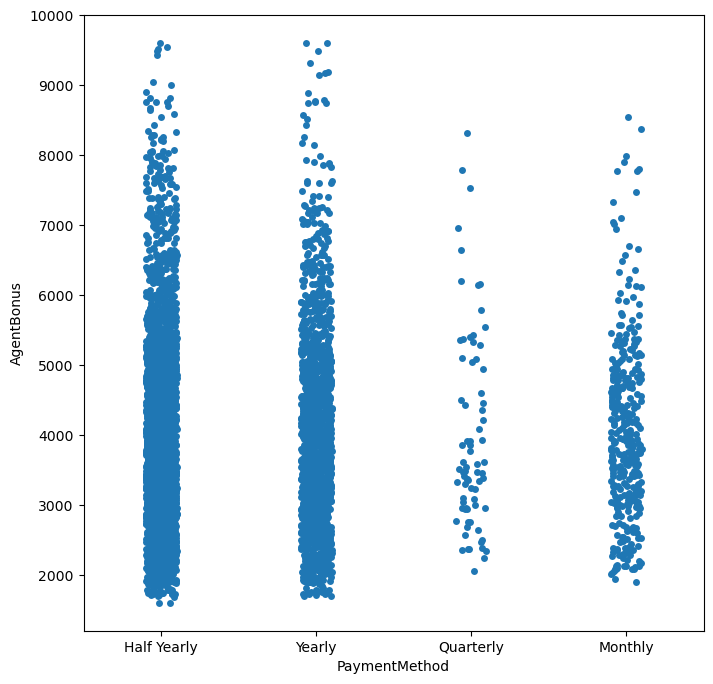

In [68]:
plt.figure(figsize=(8, 8))
sns.stripplot(x='PaymentMethod', y='AgentBonus', data=df, jitter=True)
plt.show()

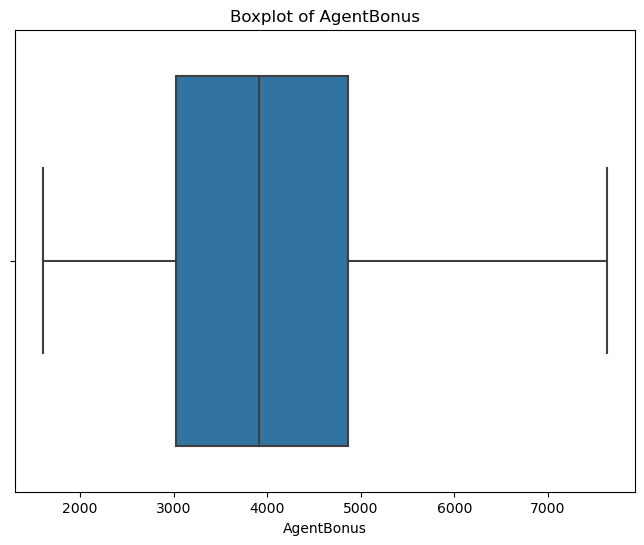

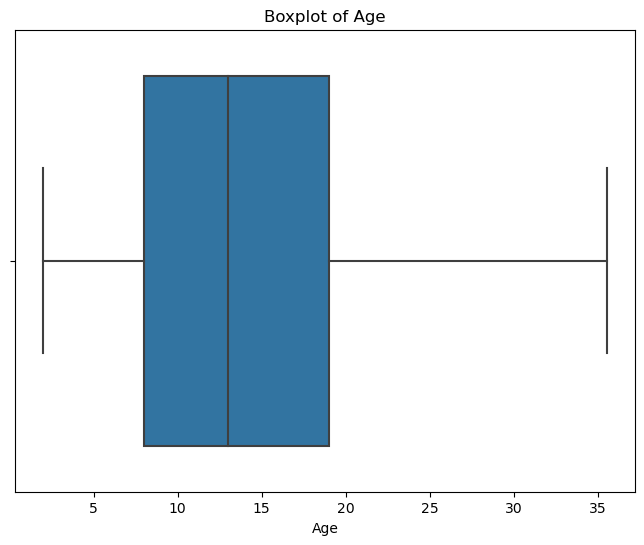

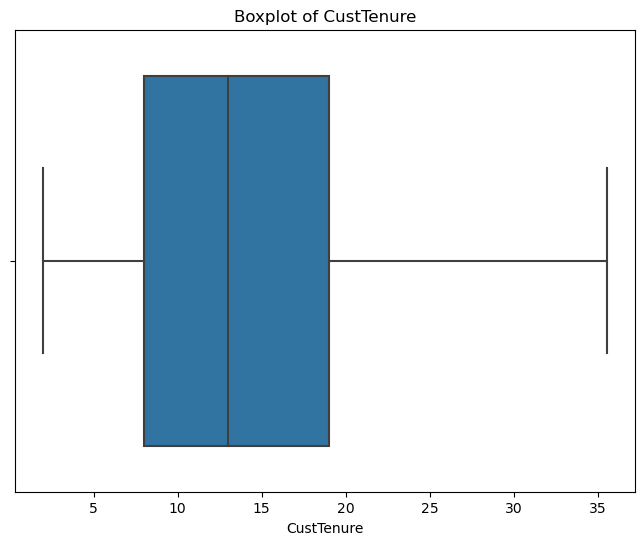

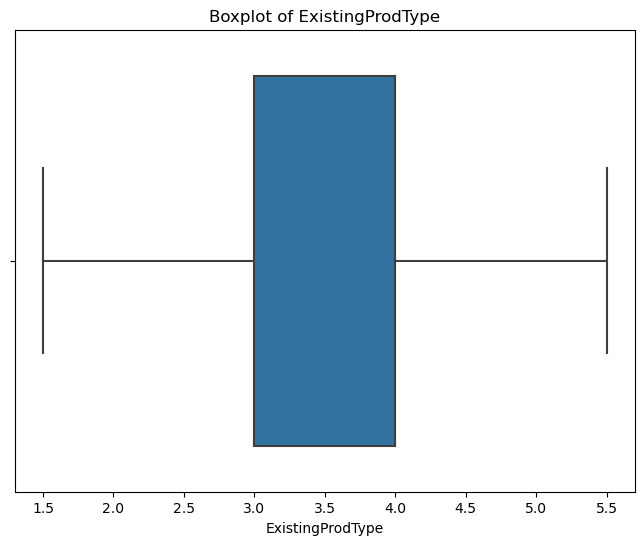

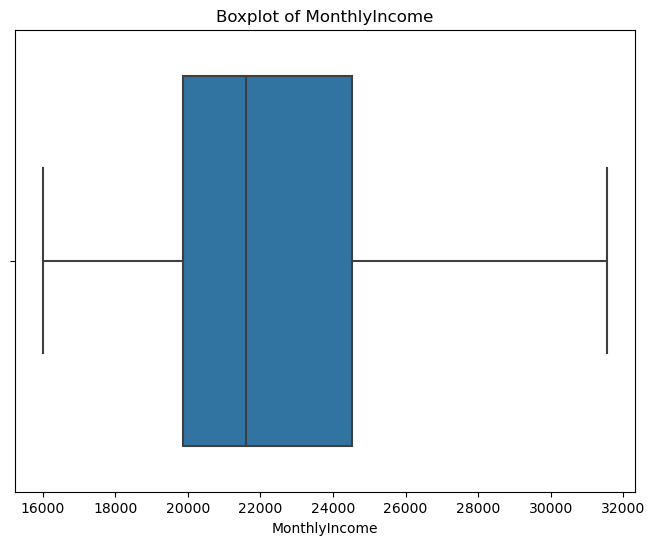

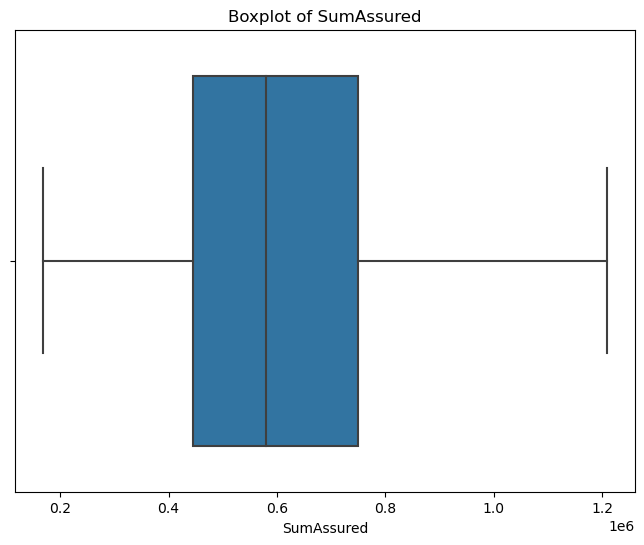

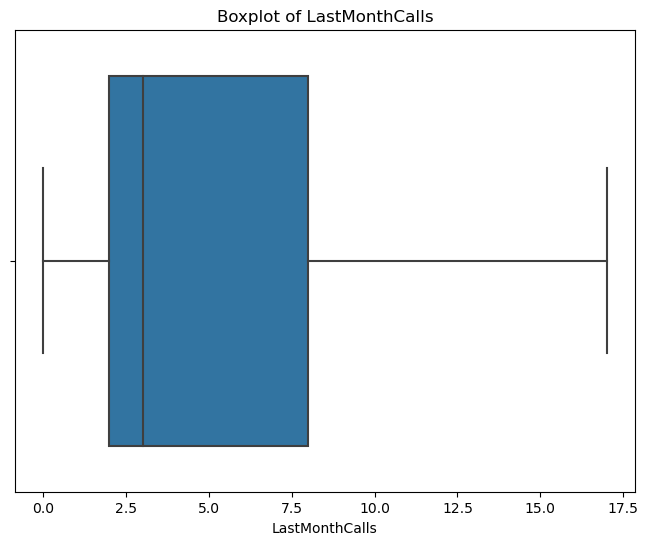

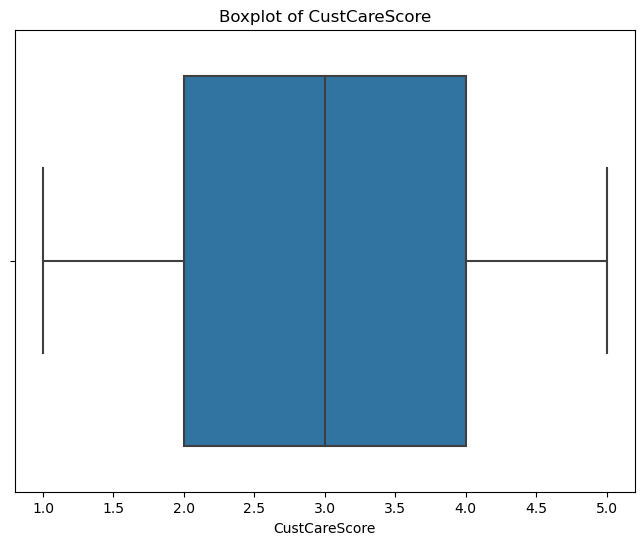

In [69]:
# Treating Outliers in numerical columns via IQR method

# for i in lstcategoriccolumns:
#     print(i," \n\n",np.round(df[i].value_counts(normalize=True),2),'\n')
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

for column in df_num.columns:
    lr, ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

# Plot boxplots
for i in df_num.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=i, data=df)
    plt.title(f'Boxplot of {i}')
    plt.show()

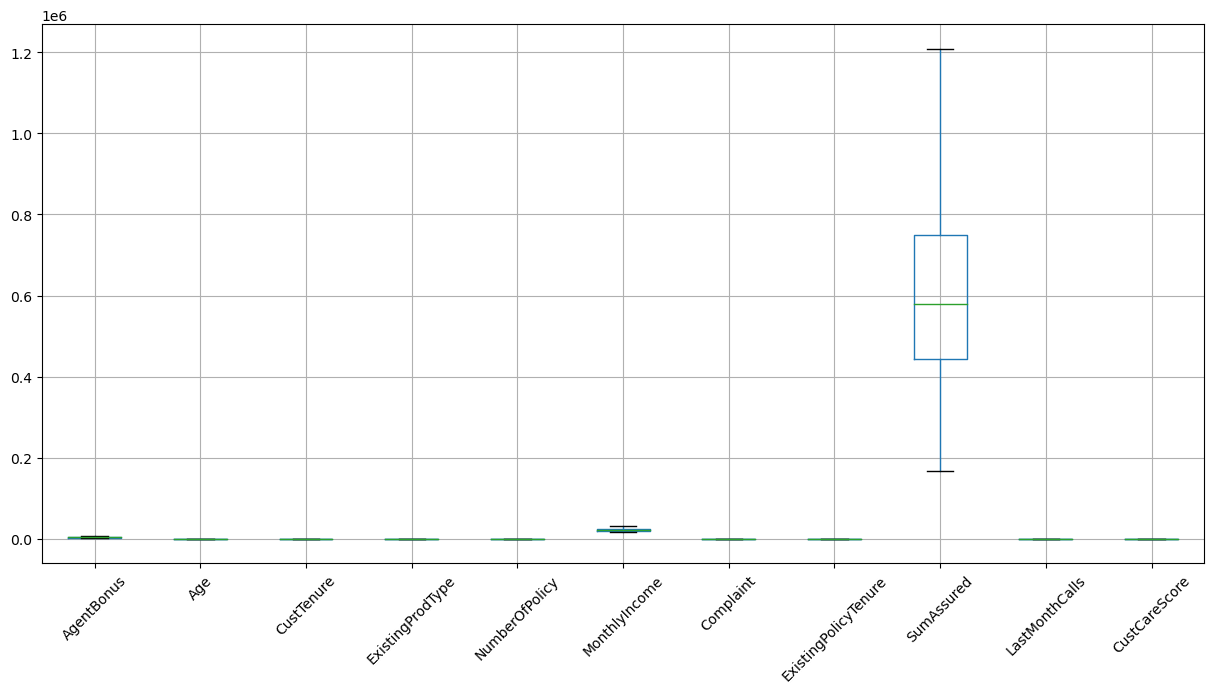

In [70]:
df.boxplot(figsize=(15,7))
plt.xticks(rotation=45)
plt.show()

In [71]:
df.head()

AgentBonus   Age  CustTenure              Channel      Occupation  \
0      4409.0  22.0         4.0                Agent        Salaried   
1      2214.0  11.0         2.0  Third Party Partner        Salaried   
2      4273.0  26.0         4.0                Agent     Free Lancer   
3      1791.0  11.0        13.0  Third Party Partner        Salaried   
4      2955.0   6.0        13.0                Agent  Small Business   

   EducationField  Gender  ExistingProdType Designation  NumberOfPolicy  \
0        Graduate  Female               3.0     Manager             2.0   
1        Graduate    Male               4.0     Manager             4.0   
2   Post Graduate    Male               4.0   Executive             3.0   
3        Graduate  Female               3.0   Executive             3.0   
4  Under Graduate    Male               3.0   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0        1.0                   2.0    806761.0   
1      Divorced        20130.0        0.0                   3.0    294502.0   
2     Unmarried        17090.0        1.0                   2.0    578976.5   
3      Divorced        17909.0        1.0                   2.0    268635.0   
4      Divorced        18468.0        0.0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly             5.0            2.0  
1  North        Yearly             7.0            3.0  
2  North        Yearly             0.0            3.0  
3   West   Half Yearly             0.0            5.0  
4   West   Half Yearly             2.0            5.0

In [73]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod']
['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']


In [74]:
df_new =pd.get_dummies(df, columns=cat,drop_first=True)

In [228]:
df_new.head().T

0         1         2         3  \
AgentBonus                       4409.0    2214.0    4273.0    1791.0   
Age                                22.0      11.0      26.0      11.0   
CustTenure                          4.0       2.0       4.0      13.0   
ExistingProdType                    3.0       4.0       4.0       3.0   
NumberOfPolicy                      2.0       4.0       3.0       3.0   
MonthlyIncome                   20993.0   20130.0   17090.0   17909.0   
Complaint                           1.0       0.0       1.0       1.0   
ExistingPolicyTenure                2.0       3.0       2.0       2.0   
SumAssured                     806761.0  294502.0  578976.5  268635.0   
LastMonthCalls                      5.0       7.0       0.0       0.0   
CustCareScore                       2.0       3.0       3.0       5.0   
Channel_Online                    False     False     False     False   
Channel_Third Party Partner       False      True     False      True   
Occupation_Large Business         False     False     False     False   
Occupation_Salaried                True      True     False      True   
Occupation_Small Business         False     False     False     False   
EducationField_Engineer           False     False     False     False   
EducationField_Graduate            True      True     False      True   
EducationField_MBA                False     False     False     False   
EducationField_Post Graduate      False     False      True     False   
EducationField_Under Graduate     False     False     False     False   
Gender_Male                       False      True      True     False   
Designation_Executive             False     False      True      True   
Designation_Manager                True      True     False     False   
Designation_Senior Manager        False     False     False     False   
Designation_VP                    False     False     False     False   
MaritalStatus_Married             False     False     False     False   
MaritalStatus_Single               True     False     False     False   
MaritalStatus_Unmarried           False     False      True     False   
Zone_North                         True      True      True     False   
Zone_South                        False     False     False     False   
Zone_West                         False     False     False      True   
PaymentMethod_Monthly             False     False     False     False   
PaymentMethod_Quarterly           False     False     False     False   
PaymentMethod_Yearly              False      True      True     False   
Bonus_ratio                    0.005465  0.007518   0.00738  0.006667   

                                      4  
AgentBonus                       2955.0  
Age                                 6.0  
CustTenure                         13.0  
ExistingProdType                    3.0  
NumberOfPolicy                      4.0  
MonthlyIncome                   18468.0  
Complaint                           0.0  
ExistingPolicyTenure                4.0  
SumAssured                     366405.0  
LastMonthCalls                      2.0  
CustCareScore                       5.0  
Channel_Online                    False  
Channel_Third Party Partner       False  
Occupation_Large Business         False  
Occupation_Salaried               False  
Occupation_Small Business          True  
EducationField_Engineer           False  
EducationField_Graduate           False  
EducationField_MBA                False  
EducationField_Post Graduate      False  
EducationField_Under Graduate      True  
Gender_Male                        True  
Designation_Executive              True  
Designation_Manager               False  
Designation_Senior Manager        False  
Designation_VP                    False  
MaritalStatus_Married             False  
MaritalStatus_Single              False  
MaritalStatus_Unmarried           False  
Zone_North                        False  
Zone_South                        

In [76]:
df_new['Bonus_ratio'] = df_new['AgentBonus']/df_new['SumAssured']

In [231]:
df_new[['AgentBonus','SumAssured','Bonus_ratio']].head().T

0              1             2              3  \
AgentBonus     4409.000000    2214.000000    4273.00000    1791.000000   
SumAssured   806761.000000  294502.000000  578976.50000  268635.000000   
Bonus_ratio       0.005465       0.007518       0.00738       0.006667   

                         4  
AgentBonus     2955.000000  
SumAssured   366405.000000  
Bonus_ratio       0.008065

In [78]:
# Copy all the predictor variables into X dataframe
X = df_new.drop('AgentBonus', axis=1)

In [232]:
X.head().T

0         1         2         3  \
Age                                22.0      11.0      26.0      11.0   
CustTenure                          4.0       2.0       4.0      13.0   
ExistingProdType                    3.0       4.0       4.0       3.0   
NumberOfPolicy                      2.0       4.0       3.0       3.0   
MonthlyIncome                   20993.0   20130.0   17090.0   17909.0   
Complaint                           1.0       0.0       1.0       1.0   
ExistingPolicyTenure                2.0       3.0       2.0       2.0   
SumAssured                     806761.0  294502.0  578976.5  268635.0   
LastMonthCalls                      5.0       7.0       0.0       0.0   
CustCareScore                       2.0       3.0       3.0       5.0   
Channel_Online                    False     False     False     False   
Channel_Third_Party_Partner       False      True     False      True   
Occupation_Large_Business         False     False     False     False   
Occupation_Salaried                True      True     False      True   
Occupation_Small_Business         False     False     False     False   
EducationField_Engineer           False     False     False     False   
EducationField_Graduate            True      True     False      True   
EducationField_MBA                False     False     False     False   
EducationField_Post_Graduate      False     False      True     False   
EducationField_Under_Graduate     False     False     False     False   
Gender_Male                       False      True      True     False   
Designation_Executive             False     False      True      True   
Designation_Manager                True      True     False     False   
Designation_Senior_Manager        False     False     False     False   
Designation_VP                    False     False     False     False   
MaritalStatus_Married             False     False     False     False   
MaritalStatus_Single               True     False     False     False   
MaritalStatus_Unmarried           False     False      True     False   
Zone_North                         True      True      True     False   
Zone_South                        False     False     False     False   
Zone_West                         False     False     False      True   
PaymentMethod_Monthly             False     False     False     False   
PaymentMethod_Quarterly           False     False     False     False   
PaymentMethod_Yearly              False      True      True     False   
Bonus_ratio                    0.005465  0.007518   0.00738  0.006667   

                                      4  
Age                                 6.0  
CustTenure                         13.0  
ExistingProdType                    3.0  
NumberOfPolicy                      4.0  
MonthlyIncome                   18468.0  
Complaint                           0.0  
ExistingPolicyTenure                4.0  
SumAssured                     366405.0  
LastMonthCalls                      2.0  
CustCareScore                       5.0  
Channel_Online                    False  
Channel_Third_Party_Partner       False  
Occupation_Large_Business         False  
Occupation_Salaried               False  
Occupation_Small_Business          True  
EducationField_Engineer           False  
EducationField_Graduate           False  
EducationField_MBA                False  
EducationField_Post_Graduate      False  
EducationField_Under_Graduate      True  
Gender_Male                        True  
Designation_Executive              True  
Designation_Manager               False  
Designation_Senior_Manager        False  
Designation_VP                    False  
MaritalStatus_Married             False  
MaritalStatus_Single              False  
MaritalStatus_Unmarried           False  
Zone_North                        False  
Zone_South                        False  
Zone_West                          True  
PaymentMethod_Monthly             False  
PaymentMethod_Quarterly

In [79]:
# Copy target into the y dataframe.  
y = df_new['AgentBonus']

In [234]:
y.head().T

0       1       2       3       4
AgentBonus  4409.0  2214.0  4273.0  1791.0  2955.0

In [80]:
from scipy.stats import zscore
data_scaled=X.apply(zscore)

In [235]:
data_scaled.head().T

0         1         2         3  \
Age                            0.922528 -0.391386  1.400315 -0.391386   
CustTenure                    -1.231573 -1.471557 -1.231573 -0.151649   
ExistingProdType              -0.742887  0.325131  0.325131 -0.742887   
NumberOfPolicy                -1.083186  0.296941 -0.393123 -0.393123   
MonthlyIncome                 -0.383025 -0.601358 -1.370456 -1.163255   
Complaint                      1.575525 -0.634709  1.575525  1.575525   
ExistingPolicyTenure          -0.692870 -0.321124 -0.692870 -0.692870   
SumAssured                     0.838355 -1.395405 -0.154924 -1.508201   
LastMonthCalls                 0.104054  0.658028 -1.280881 -1.280881   
CustCareScore                 -0.775947 -0.048597 -0.048597  1.406102   
Channel_Online                -0.339851 -0.339851 -0.339851 -0.339851   
Channel_Third Party Partner   -0.484044  2.065930 -0.484044  2.065930   
Occupation_Large Business     -0.314995 -0.314995 -0.314995 -0.314995   
Occupation_Salaried            1.030555  1.030555 -0.970351  1.030555   
Occupation_Small Business     -0.858560 -0.858560 -0.858560 -0.858560   
EducationField_Engineer       -0.314995 -0.314995 -0.314995 -0.314995   
EducationField_Graduate        1.190425  1.190425 -0.840036  1.190425   
EducationField_MBA            -0.129012 -0.129012 -0.129012 -0.129012   
EducationField_Post Graduate  -0.242990 -0.242990  4.115399 -0.242990   
EducationField_Under Graduate -0.676805 -0.676805 -0.676805 -0.676805   
Gender_Male                   -1.211301  0.825559  0.825559 -1.211301   
Designation_Executive         -0.762578 -0.762578  1.311341  1.311341   
Designation_Manager            1.337955  1.337955 -0.747409 -0.747409   
Designation_Senior Manager    -0.419355 -0.419355 -0.419355 -0.419355   
Designation_VP                -0.229416 -0.229416 -0.229416 -0.229416   
MaritalStatus_Married         -1.003546 -1.003546 -1.003546 -1.003546   
MaritalStatus_Single           1.613836 -0.619642 -0.619642 -0.619642   
MaritalStatus_Unmarried       -0.211767 -0.211767  4.722178 -0.211767   
Zone_North                     1.182857  1.182857  1.182857 -0.845411   
Zone_South                    -0.036458 -0.036458 -0.036458 -0.036458   
Zone_West                     -1.145951 -1.145951 -1.145951  0.872638   
PaymentMethod_Monthly         -0.291502 -0.291502 -0.291502 -0.291502   
PaymentMethod_Quarterly       -0.130774 -0.130774 -0.130774 -0.130774   
PaymentMethod_Yearly          -0.681674  1.466977  1.466977 -0.681674   
Bonus_ratio                   -0.966554  0.461303  0.365651 -0.130466   

                                      4  
Age                           -0.988620  
CustTenure                    -0.151649  
ExistingProdType              -0.742887  
NumberOfPolicy                 0.296941  
MonthlyIncome                 -1.021832  
Complaint                     -0.634709  
ExistingPolicyTenure           0.050622  
SumAssured                    -1.081865  
LastMonthCalls                -0.726907  
CustCareScore                  1.406102  
Channel_Online                -0.339851  
Channel_Third Party Partner   -0.484044  
Occupation_Large Business     -0.314995  
Occupation_Salaried           -0.970351  
Occupation_Small Business      1.164741  
EducationField_Engineer       -0.314995  
EducationField_Graduate       -0.840036  
EducationField_MBA            -0.129012  
EducationField_Post Graduate  -0.242990  
EducationField_Under Graduate  1.477531  
Gender_Male                    0.825559  
Designation_Executive          1.311341  
Designation_Manager           -0.747409  
Designation_Senior Manager    -0.419355  
Designation_VP                -0.229416  
MaritalStatus_Married         -1.003546  
MaritalStatus_Single          -0.619642  
MaritalStatus_Unmarried       -0.211767  
Zone_North                    -0.845411  
Zone_South                    -0.036458  
Zone_West                      0.872638  
PaymentMethod_Monthly         -0.291502  
PaymentMethod_Quarterly

In [82]:
data_scaled.describe().T

count          mean       std       min  \
Age                            4520.0 -7.545587e-17  1.000111 -1.466407   
CustTenure                     4520.0  6.287989e-17  1.000111 -1.471557   
ExistingProdType               4520.0 -1.006078e-16  1.000111 -2.344913   
NumberOfPolicy                 4520.0  1.006078e-16  1.000111 -1.773250   
MonthlyIncome                  4520.0  1.006078e-16  1.000111 -1.643942   
Complaint                      4520.0 -7.073987e-18  1.000111 -0.634709   
ExistingPolicyTenure           4520.0 -2.515196e-17  1.000111 -1.064616   
SumAssured                     4520.0  1.257598e-16  1.000111 -1.944694   
LastMonthCalls                 4520.0  5.030391e-17  1.000111 -1.280881   
CustCareScore                  4520.0 -6.287989e-17  1.000111 -1.503296   
Channel_Online                 4520.0 -5.364440e-17  1.000111 -0.339851   
Channel_Third Party Partner    4520.0  1.788147e-17  1.000111 -0.484044   
Occupation_Large Business      4520.0 -4.008593e-17  1.000111 -0.314995   
Occupation_Salaried            4520.0  2.279396e-17  1.000111 -0.970351   
Occupation_Small Business      4520.0 -2.652745e-17  1.000111 -0.858560   
EducationField_Engineer        4520.0 -4.165793e-17  1.000111 -0.314995   
EducationField_Graduate        4520.0  1.137733e-16  1.000111 -0.840036   
EducationField_MBA             4520.0  1.532697e-17  1.000111 -0.129012   
EducationField_Post Graduate   4520.0  1.768497e-17  1.000111 -0.242990   
EducationField_Under Graduate  4520.0  2.475896e-17  1.000111 -0.676805   
Gender_Male                    4520.0 -1.021798e-17  1.000111 -1.211301   
Designation_Executive          4520.0 -6.680988e-18  1.000111 -0.762578   
Designation_Manager            4520.0  4.322992e-17  1.000111 -0.747409   
Designation_Senior Manager     4520.0 -2.240096e-17  1.000111 -0.419355   
Designation_VP                 4520.0 -7.152587e-17  1.000111 -0.229416   
MaritalStatus_Married          4520.0  7.545587e-17  1.000111 -1.003546   
MaritalStatus_Single           4520.0 -4.401592e-17  1.000111 -0.619642   
MaritalStatus_Unmarried        4520.0  2.515196e-17  1.000111 -0.211767   
Zone_North                     4520.0  3.536994e-17  1.000111 -0.845411   
Zone_South                     4520.0  7.859986e-18  1.000111 -0.036458   
Zone_West                      4520.0  6.366589e-17  1.000111 -1.145951   
PaymentMethod_Monthly          4520.0 -7.859986e-18  1.000111 -0.291502   
PaymentMethod_Quarterly        4520.0 -1.886397e-17  1.000111 -0.130774   
PaymentMethod_Yearly           4520.0 -2.043596e-17  1.000111 -0.681674   
Bonus_ratio                    4520.0  4.888911e-16  1.000111 -2.740026   

                                    25%       50%       75%        max  
Age                           -0.749727 -0.152493  0.564188   2.535059  
CustTenure                    -0.751607 -0.151649  0.568301   2.548163  
ExistingProdType              -0.742887  0.325131  0.325131   1.927158  
NumberOfPolicy                -1.083186  0.296941  0.987005   1.677069  
MonthlyIncome                 -0.670172 -0.227940  0.512254   2.285892  
Complaint                     -0.634709 -0.634709  1.575525   1.575525  
ExistingPolicyTenure          -0.692870 -0.321124  0.422367   2.095223  
SumAssured                    -0.741427 -0.154924  0.590888   2.589360  
LastMonthCalls                -0.726907 -0.449920  0.935015   3.427899  
CustCareScore                 -0.775947 -0.048597  0.678752   1.406102  
Channel_Online                -0.339851 -0.339851 -0.339851   2.942468  
Channel_Third Party Partner   -0.484044 -0.484044 -0.484044   2.065930  
Occupation_Large Business     -0.314995 -0.314995 -0.314995   3.174655  
Occupation_Salaried           -0.970351 -0.970351  1.030555   1.030555  
Occupation_Small Business     -0.858560 -0.858560  1.164741   1.164741  
EducationField_Engineer       -0.314995 -0.314995 -0.314995   3.174655  
EducationField_Graduate       -0.840036 -0.840036  1.190425   1.190425  
EducationField_MB

In [83]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
k_means.inertia_

144402.47832436013

In [84]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)
    print('wss for '+ str(i)+ ' clusters is : ' +str(KM.inertia_))

wss for 1 clusters is : 158199.99999999997
wss for 2 clusters is : 144402.50267618513
wss for 3 clusters is : 134199.1252024132
wss for 4 clusters is : 128253.40300250679
wss for 5 clusters is : 123601.76247940752
wss for 6 clusters is : 119693.4934944374
wss for 7 clusters is : 115028.1391968894
wss for 8 clusters is : 112623.35040456723
wss for 9 clusters is : 107366.5387347401
wss for 10 clusters is : 105635.25094476812


In [85]:
plt.plot(range(1,11), wss)

In [86]:
sc = StandardScaler()

In [87]:
df_normalized = normalize(data_scaled)
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']

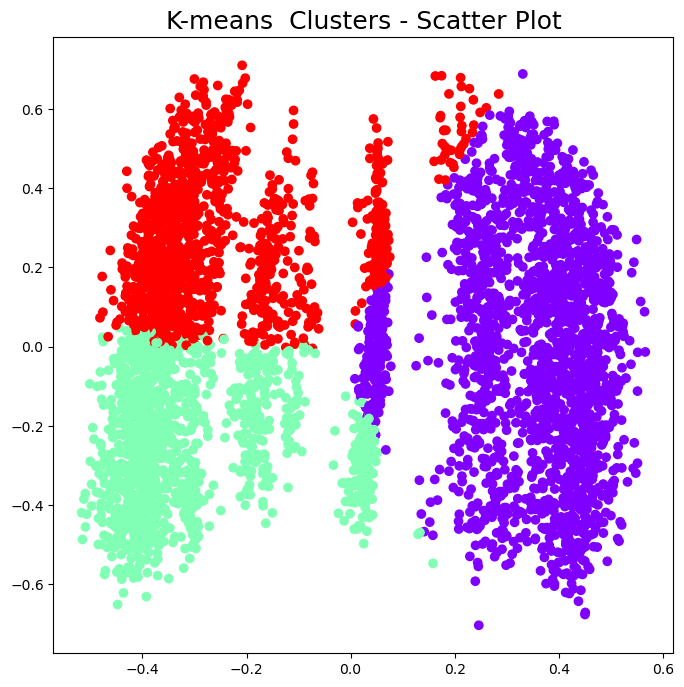

In [88]:
km = KMeans(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = km.fit_predict(df_pca), cmap ='rainbow')
plt.title("K-means  Clusters - Scatter Plot", fontsize=18)
plt.show()

In [89]:
df_new.to_csv('cleanData.csv')

In [90]:
data = df_new.copy()

In [91]:
data.head()

AgentBonus   Age  CustTenure  ExistingProdType  NumberOfPolicy  \
0      4409.0  22.0         4.0               3.0             2.0   
1      2214.0  11.0         2.0               4.0             4.0   
2      4273.0  26.0         4.0               4.0             3.0   
3      1791.0  11.0        13.0               3.0             3.0   
4      2955.0   6.0        13.0               3.0             4.0   

   MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  LastMonthCalls  \
0        20993.0        1.0                   2.0    806761.0             5.0   
1        20130.0        0.0                   3.0    294502.0             7.0   
2        17090.0        1.0                   2.0    578976.5             0.0   
3        17909.0        1.0                   2.0    268635.0             0.0   
4        18468.0        0.0                   4.0    366405.0             2.0   

   ...  MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  \
0  ...                  False                  True                    False   
1  ...                  False                 False                    False   
2  ...                  False                 False                     True   
3  ...                  False                 False                    False   
4  ...                  False                 False                    False   

   Zone_North  Zone_South  Zone_West  PaymentMethod_Monthly  \
0        True       False      False                  False   
1        True       False      False                  False   
2        True       False      False                  False   
3       False       False       True                  False   
4       False       False       True                  False   

   PaymentMethod_Quarterly  PaymentMethod_Yearly  Bonus_ratio  
0                    False                 False     0.005465  
1                    False                  True     0.007518  
2                    False                  True     0.007380  
3                    False                 False     0.006667  
4                    False                 False     0.008065  

[5 rows x 36 columns]

In [92]:
data.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post Graduate',
       'EducationField_Under Graduate', 'Gender_Male', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly', 'Bonus_ratio'],
      dtype='object')

In [93]:
data = data.rename(columns={"Channel_Third Party Partner" : "Channel_Third_Party_Partner","Occupation_Large Business":"Occupation_Large_Business","Occupation_Small Business":"Occupation_Small_Business","EducationField_Post Graduate":"EducationField_Post_Graduate","EducationField_Under Graduate":"EducationField_Under_Graduate","Designation_Senior Manager":"Designation_Senior_Manager"})

In [94]:
X = data.drop('AgentBonus', axis=1)
y = data[['AgentBonus']]

In [95]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=0)

In [96]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (3164, 35)
X_test (1356, 35)
y_train (3164, 1)
y_test (1356, 1)


In [97]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [98]:
# coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 3.6883323592381068
The coefficient for CustTenure is 4.470282768764922
The coefficient for ExistingProdType is 14.94828105462876
The coefficient for NumberOfPolicy is -1.1863388793169025
The coefficient for MonthlyIncome is 0.006231736822413239
The coefficient for Complaint is 22.904458621326913
The coefficient for ExistingPolicyTenure is 3.095441298895342
The coefficient for SumAssured is 0.006138455661955397
The coefficient for LastMonthCalls is -2.2523503817356336
The coefficient for CustCareScore is 1.9374298499484108
The coefficient for Channel_Online is 14.526242635674365
The coefficient for Channel_Third_Party_Partner is 22.24613761050391
The coefficient for Occupation_Large_Business is -152.80157282816498
The coefficient for Occupation_Salaried is -143.80675494946846
The coefficient for Occupation_Small_Business is -162.23299965584656
The coefficient for EducationField_Engineer is -2.938860757420927
The coefficient for EducationField_Graduate is -8.58

In [99]:
#intercept
intercept = regression_model.intercept_[0]

In [100]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3130.4993199391242


In [101]:
#train
regression_model.score(X_train, y_train)

0.9646568480447665

In [102]:
# test
regression_model.score(X_test, y_test)

0.9605772824184571

In [103]:
#train
LMmse = np.mean((regression_model.predict(X_train)-y_train)**2)
LMmse

64308.152985348584

In [104]:
import math

LMrmse = math.sqrt(LMmse)
LMrmse

253.59052227034942

In [105]:
#test
LMmse = np.mean((regression_model.predict(X_test)-y_test)**2)
LMmse

74825.45443973644

In [106]:
LMrmse = math.sqrt(LMmse)
LMrmse

273.5424179898548

In [107]:
#train
LMmae = mean_absolute_error(y_train,(regression_model.predict(X_train)))
LMmae

190.42318026422205

In [108]:
#test
LMmae = mean_absolute_error(y_test,(regression_model.predict(X_test)))
LMmae

206.3154129594971

In [109]:
y_pred = regression_model.predict(X_test)

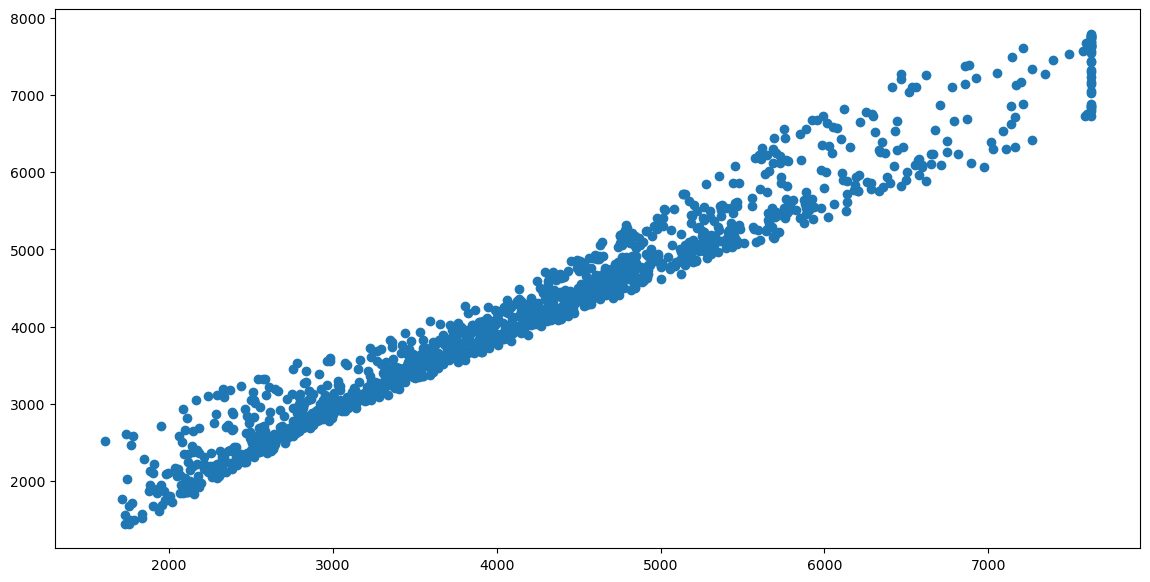

In [110]:
plt.scatter(y_test['AgentBonus'], y_pred)

In [111]:
## Stats model Linear Regression

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head().T

3086       565       3479      1475  \
Age                                 17.0       23.0      24.0      12.0   
CustTenure                           4.0       14.0      18.0      24.0   
ExistingProdType                     2.0        5.0       4.0       3.0   
NumberOfPolicy                       3.0        2.0       6.0       4.0   
MonthlyIncome                  31542.375  31542.375   21606.0   28734.0   
Complaint                            0.0        0.0       0.0       0.0   
ExistingPolicyTenure                 3.0        3.0       2.0       5.0   
SumAssured                      560894.0   688537.0  833744.0  736165.0   
LastMonthCalls                       1.0        9.0      11.0       0.0   
CustCareScore                        5.0        3.0       1.0       5.0   
Channel_Online                     False      False     False     False   
Channel_Third_Party_Partner        False      False     False     False   
Occupation_Large_Business          False      False     False     False   
Occupation_Salaried                False      False     False     False   
Occupation_Small_Business           True       True      True      True   
EducationField_Engineer            False      False     False     False   
EducationField_Graduate            False      False     False     False   
EducationField_MBA                 False      False     False     False   
EducationField_Post_Graduate       False      False     False     False   
EducationField_Under_Graduate       True      False     False      True   
Gender_Male                         True      False      True     False   
Designation_Executive              False      False     False     False   
Designation_Manager                False      False     False     False   
Designation_Senior_Manager         False      False     False     False   
Designation_VP                     False       True     False     False   
MaritalStatus_Married               True      False     False     False   
MaritalStatus_Single               False      False      True      True   
MaritalStatus_Unmarried            False      False     False     False   
Zone_North                         False      False      True      True   
Zone_South                         False      False     False     False   
Zone_West                           True       True     False     False   
PaymentMethod_Monthly               True      False     False     False   
PaymentMethod_Quarterly            False      False     False     False   
PaymentMethod_Yearly               False       True     False     False   
Bonus_ratio                     0.007693   0.006579  0.007247  0.008197   
AgentBonus                        4315.0     4530.0    6042.0    6034.0   

                                   1621  
Age                                11.0  
CustTenure                         13.0  
ExistingProdType                    5.0  
NumberOfPolicy                      1.0  
MonthlyIncome                   22457.0  
Complaint                           1.0  
ExistingPolicyTenure                1.0  
SumAssured                     388506.0  
LastMonthCalls                      2.0  
CustCareScore                       3.0  
Channel_Online                    False  
Channel_Third_Party_Partner       False  
Occupation_Large_Business         False  
Occupation_Salaried               False  
Occupation_Small_Business          True  
EducationField_Engineer           False  
EducationField_Graduate           False  
EducationField_MBA                False  
EducationField_Post_Graduate      False  
EducationField_Under_Graduate      True  
Gender_Male                        True  
Designation_Executive             False  
Designation_Manager                True  
Designation_Senior_Manager        False  
Designation_VP                    False  
MaritalStatus_Married              True  
MaritalStatus_Single              False  
MaritalStatus_Unmarried           False  
Zone_North                        False  


In [112]:
import statsmodels.formula.api as sm
lm = sm.ols(formula= 'AgentBonus ~ Age+CustTenure+ExistingProdType+NumberOfPolicy+MonthlyIncome+Complaint+ExistingPolicyTenure+SumAssured+LastMonthCalls+CustCareScore+Channel_Online+Channel_Third_Party_Partner+Occupation_Large_Business+Occupation_Salaried+Occupation_Small_Business+EducationField_Engineer+EducationField_Graduate+EducationField_MBA+EducationField_Post_Graduate+EducationField_Under_Graduate+EducationField_Under_Graduate+Gender_Male+Designation_Executive+Designation_Executive+Designation_Manager+Designation_Senior_Manager+Designation_VP+MaritalStatus_Married+MaritalStatus_Single+MaritalStatus_Unmarried+Zone_North+Zone_South+Zone_West+PaymentMethod_Monthly+PaymentMethod_Quarterly+PaymentMethod_Yearly+Bonus_ratio', data = data_train).fit()
lm.params

Intercept                                 -3130.499320
Channel_Online[T.True]                       14.526243
Channel_Third_Party_Partner[T.True]          22.246138
Occupation_Large_Business[T.True]          -152.801573
Occupation_Salaried[T.True]                -143.806755
Occupation_Small_Business[T.True]          -162.233000
EducationField_Engineer[T.True]              -2.938861
EducationField_Graduate[T.True]              -8.589914
EducationField_MBA[T.True]                    7.599602
EducationField_Post_Graduate[T.True]         21.932744
EducationField_Under_Graduate[T.True]        -5.108857
Gender_Male[T.True]                          -1.246555
Designation_Executive[T.True]              -137.763894
Designation_Manager[T.True]                -135.598807
Designation_Senior_Manager[T.True]         -111.533593
Designation_VP[T.True]                       -0.560031
MaritalStatus_Married[T.True]                 4.510053
MaritalStatus_Single[T.True]                 23.285684
MaritalSta

In [113]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2439.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:47:14   Log-Likelihood:                -22005.
No. Observations:                3164   AIC:                         4.408e+04
Df Residuals:                    3128   BIC:                         4.430e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [114]:
lm1 = sm.ols(formula= 'AgentBonus ~ Age+CustTenure+MonthlyIncome+Complaint+SumAssured+Channel_Third_Party_Partner+Designation_Executive+Designation_Manager+Designation_Senior_Manager+PaymentMethod_Yearly+Bonus_ratio', data = data_train).fit()
lm1.params
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     7754.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:47:14   Log-Likelihood:                -22018.
No. Observations:                3164   AIC:                         4.406e+04
Df Residuals:                    3152   BIC:                         4.413e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [115]:
for i,j in np.array(lm.params.reset_index()):
   print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3130.5) * Intercept + (14.53) * Channel_Online[T.True] + (22.25) * Channel_Third_Party_Partner[T.True] + (-152.8) * Occupation_Large_Business[T.True] + (-143.81) * Occupation_Salaried[T.True] + (-162.23) * Occupation_Small_Business[T.True] + (-2.94) * EducationField_Engineer[T.True] + (-8.59) * EducationField_Graduate[T.True] + (7.6) * EducationField_MBA[T.True] + (21.93) * EducationField_Post_Graduate[T.True] + (-5.11) * EducationField_Under_Graduate[T.True] + (-1.25) * Gender_Male[T.True] + (-137.76) * Designation_Executive[T.True] + (-135.6) * Designation_Manager[T.True] + (-111.53) * Designation_Senior_Manager[T.True] + (-0.56) * Designation_VP[T.True] + (4.51) * MaritalStatus_Married[T.True] + (23.29) * MaritalStatus_Single[T.True] + (17.59) * MaritalStatus_Unmarried[T.True] + (-14.93) * Zone_North[T.True] + (34.1) * Zone_South[T.True] + (-34.49) * Zone_West[T.True] + (36.86) * PaymentMethod_Monthly[T.True] + (61.32) * PaymentMethod_Quarterly[T.True] + (-31.97) * PaymentMethod_Y

In [116]:
y_pred = regression_model.predict(X_test)

In [117]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [118]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [119]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 0.02282640463353869
The coefficient for CustTenure is 0.027397607461046698
The coefficient for ExistingProdType is 0.010439976963114248
The coefficient for NumberOfPolicy is -0.0012753115543531828
The coefficient for MonthlyIncome is 0.018279561563796256
The coefficient for Complaint is 0.007691035253146605
The coefficient for ExistingPolicyTenure is 0.006136998528083709
The coefficient for SumAssured is 1.0443464170685983
The coefficient for LastMonthCalls is -0.006093705723135401
The coefficient for CustCareScore is 0.001986758738631343
The coefficient for Channel_Online is 0.0031595873169654723
The coefficient for Channel_Third_Party_Partner is 0.006574031304073424
The coefficient for Occupation_Large_Business is -0.03308698508627598
The coefficient for Occupation_Salaried is -0.05328354885258301
The coefficient for Occupation_Small_Business is -0.059348860371754616
The coefficient for EducationField_Engineer is -0.0006430121178684257
The coefficient for E

In [120]:
data_train = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_train.head()

Age  CustTenure  ExistingProdType  NumberOfPolicy  MonthlyIncome  \
3086  0.326861   -1.233743         -1.803742       -0.390801       2.275711   
565   1.045587   -0.024142          1.380694       -1.080424       2.275711   
3479  1.165374    0.459698          0.319215        1.678068      -0.235545   
1475 -0.272078    1.185458         -0.742264        0.298822       1.565940   
1621 -0.391865   -0.145102          1.380694       -1.770047      -0.020468   

      Complaint  ExistingPolicyTenure  SumAssured  LastMonthCalls  \
3086  -0.636375             -0.326890   -0.220128       -1.006684   
565   -0.636375             -0.326890    0.336072        1.185435   
3479  -0.636375             -0.700817    0.968807        1.733464   
1475  -0.636375              0.420963    0.543610       -1.280699   
1621   1.571400             -1.074743   -0.971303       -0.732669   

      CustCareScore  ...  MaritalStatus_Single  MaritalStatus_Unmarried  \
3086       1.416856  ...             -0.628539                 -0.20281   
565       -0.029018  ...             -0.628539                 -0.20281   
3479      -1.474892  ...              1.590990                 -0.20281   
1475       1.416856  ...              1.590990                 -0.20281   
1621      -0.029018  ...             -0.628539                 -0.20281   

      Zone_North  Zone_South  Zone_West  PaymentMethod_Monthly  \
3086   -0.855454   -0.035578   0.882342               3.444095   
565    -0.855454   -0.035578   0.882342              -0.290352   
3479    1.168971   -0.035578  -1.133347              -0.290352   
1475    1.168971   -0.035578  -1.133347              -0.290352   
1621   -0.855454   -0.035578   0.882342              -0.290352   

      PaymentMethod_Quarterly  PaymentMethod_Yearly  Bonus_ratio  AgentBonus  
3086                -0.130523             -0.685755     0.588483    0.205432  
565                 -0.130523              1.458246    -0.190746    0.364821  
3479                -0.130523             -0.685755     0.276313    1.485733  
1475                -0.130523             -0.685755     0.940673    1.479802  
1621                -0.130523              1.458246    -0.749016   -1.328408  

[5 rows x 36 columns]

In [121]:
lm = sm.ols(formula= 'AgentBonus ~ Age+CustTenure+ExistingProdType+NumberOfPolicy+MonthlyIncome+Complaint+ExistingPolicyTenure+SumAssured+LastMonthCalls+CustCareScore+Channel_Online+Channel_Third_Party_Partner+Occupation_Large_Business+Occupation_Salaried+Occupation_Small_Business+EducationField_Engineer+EducationField_Graduate+EducationField_MBA+EducationField_Post_Graduate+EducationField_Under_Graduate+Gender_Male+Designation_Executive+Designation_Manager+Designation_Senior_Manager+Designation_VP+MaritalStatus_Married+MaritalStatus_Single+MaritalStatus_Unmarried+Zone_North+Zone_South+Zone_West+PaymentMethod_Monthly+PaymentMethod_Quarterly+PaymentMethod_Yearly+Bonus_ratio', data = data_train).fit()
lm.params

Intercept                        1.196959e-16
Age                              2.282640e-02
CustTenure                       2.739761e-02
ExistingProdType                 1.043998e-02
NumberOfPolicy                  -1.275312e-03
MonthlyIncome                    1.827956e-02
Complaint                        7.691035e-03
ExistingPolicyTenure             6.136999e-03
SumAssured                       1.044346e+00
LastMonthCalls                  -6.093706e-03
CustCareScore                    1.986759e-03
Channel_Online                   3.159587e-03
Channel_Third_Party_Partner      6.574031e-03
Occupation_Large_Business       -3.308699e-02
Occupation_Salaried             -5.328355e-02
Occupation_Small_Business       -5.934886e-02
EducationField_Engineer         -6.430121e-04
EducationField_Graduate         -3.136975e-03
EducationField_MBA               6.815400e-04
EducationField_Post_Graduate     3.706691e-03
EducationField_Under_Graduate   -1.747771e-03
Gender_Male                     -4

In [122]:
for i,j in np.array(lm.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (0.02) * Age + (0.03) * CustTenure + (0.01) * ExistingProdType + (-0.0) * NumberOfPolicy + (0.02) * MonthlyIncome + (0.01) * Complaint + (0.01) * ExistingPolicyTenure + (1.04) * SumAssured + (-0.01) * LastMonthCalls + (0.0) * CustCareScore + (0.0) * Channel_Online + (0.01) * Channel_Third_Party_Partner + (-0.03) * Occupation_Large_Business + (-0.05) * Occupation_Salaried + (-0.06) * Occupation_Small_Business + (-0.0) * EducationField_Engineer + (-0.0) * EducationField_Graduate + (0.0) * EducationField_MBA + (0.0) * EducationField_Post_Graduate + (-0.0) * EducationField_Under_Graduate + (-0.0) * Gender_Male + (-0.05) * Designation_Executive + (-0.05) * Designation_Manager + (-0.03) * Designation_Senior_Manager + (-0.0) * Designation_VP + (0.0) * MaritalStatus_Married + (0.01) * MaritalStatus_Single + (0.0) * MaritalStatus_Unmarried + (-0.01) * Zone_North + (0.0) * Zone_South + (-0.01) * Zone_West + (0.01) * PaymentMethod_Monthly + (0.01) * PaymentMethod_Quarterly + (

In [123]:
lm.params

Intercept                        1.196959e-16
Age                              2.282640e-02
CustTenure                       2.739761e-02
ExistingProdType                 1.043998e-02
NumberOfPolicy                  -1.275312e-03
MonthlyIncome                    1.827956e-02
Complaint                        7.691035e-03
ExistingPolicyTenure             6.136999e-03
SumAssured                       1.044346e+00
LastMonthCalls                  -6.093706e-03
CustCareScore                    1.986759e-03
Channel_Online                   3.159587e-03
Channel_Third_Party_Partner      6.574031e-03
Occupation_Large_Business       -3.308699e-02
Occupation_Salaried             -5.328355e-02
Occupation_Small_Business       -5.934886e-02
EducationField_Engineer         -6.430121e-04
EducationField_Graduate         -3.136975e-03
EducationField_MBA               6.815400e-04
EducationField_Post_Graduate     3.706691e-03
EducationField_Under_Graduate   -1.747771e-03
Gender_Male                     -4

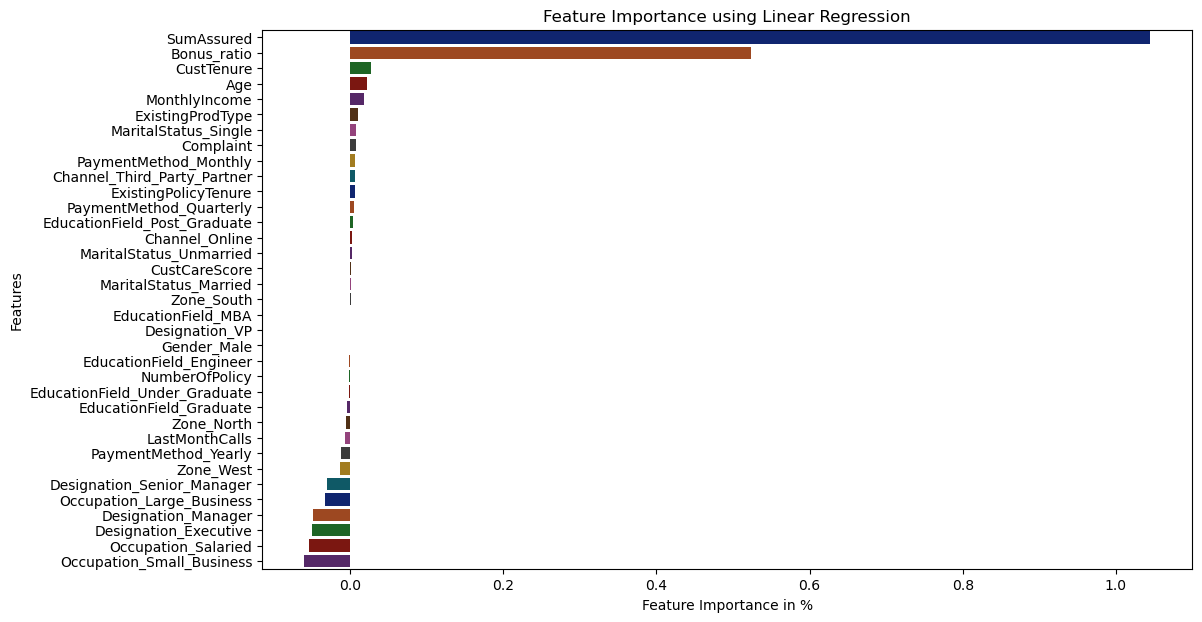

In [124]:
x = pd.DataFrame(regression_model.coef_[0], index=X_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0], y=x.index, palette='dark')  # Use keyword arguments for x and y
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Linear Regression')
plt.show()

In [125]:
intercept = regression_model.intercept_[0]

In [126]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.308388121426132e-16


In [127]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9646568480447665

In [128]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9597909177799765

In [129]:
mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [130]:
math.sqrt(mse)

0.18799774454826182

In [131]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [132]:
math.sqrt(mse)

y_pred = regression_model.predict(X_test_scaled)

mae = mean_absolute_error(y_train_scaled,(regression_model.predict(X_train_scaled)))
mae

0.14116903140861775

In [133]:
mae = mean_absolute_error(y_test_scaled,(regression_model.predict(X_test_scaled)))
mae

0.15166821216116885

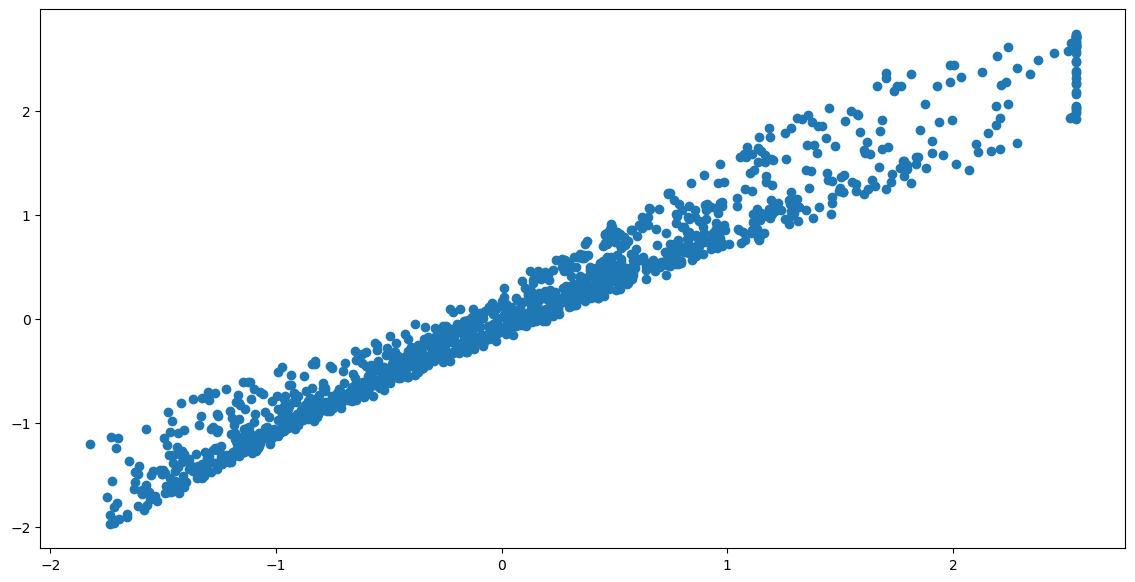

In [134]:
plt.scatter(y_test_scaled['AgentBonus'], y_pred)

In [135]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_scaled,y_train_scaled)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 2.29235377e-02  2.74875816e-02  1.04316552e-02 -1.26809471e-03
   1.83608103e-02  7.69983283e-03  6.19089872e-03  1.04399855e+00
  -6.10130002e-03  1.98706302e-03  3.16023595e-03  6.56661483e-03
  -3.03405329e-02 -4.87390622e-02 -5.47762271e-02 -6.82339808e-04
  -3.04856299e-03  7.03259294e-04  3.76918684e-03 -1.74406959e-03
  -4.53242545e-04 -4.92400278e-02 -4.82261136e-02 -2.93782572e-02
  -7.56266973e-05  1.67060511e-03  7.78777134e-03  2.54446974e-03
  -5.40211575e-03  8.99485437e-04 -1.26325223e-02  7.31568420e-03
   5.83407033e-03 -1.10414371e-02  5.23045513e-01]]


In [136]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train_scaled)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00933739  0.01282775  0.          0.          0.02581509  0.
  0.          0.89010088  0.          0.          0.         -0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.         -0.          0.         -0.
 -0.          0.          0.         -0.          0.35431363]


In [137]:
r_train_acc = ridge.score(X_train_scaled, y_train_scaled)
r_test_acc = ridge.score(X_test_scaled, y_test_scaled)

In [138]:
predicted_train = ridge.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
r_train_mae = metrics.mean_absolute_error(y_train_scaled, predicted_train)
predicted_test = ridge.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
r_test_mae = metrics.mean_absolute_error(y_test_scaled, predicted_test)

In [139]:
predicted_train = ridge.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
r_train_rmse = np.sqrt(metrics.mean_squared_error(y_train_scaled, predicted_train))
predicted_test = ridge.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
r_test_rmse = np.sqrt(metrics.mean_squared_error(y_test_scaled, predicted_test))

In [140]:
index=['Train Accuracy', 'Test Accuracy', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']
data = pd.DataFrame({'Ridge Regression':[r_train_acc,r_test_acc,r_train_rmse,r_test_rmse,r_train_mae,r_test_mae]},index=index)
round(data,2)

Ridge Regression
Train Accuracy              0.96
Test Accuracy               0.96
Train RMSE                  0.19
Test RMSE                   0.20
Train MAE                   0.14
Test MAE                    0.15

In [141]:
l_train_acc = lasso.score(X_train_scaled, y_train_scaled)
l_test_acc = lasso.score(X_test_scaled, y_test_scaled)

In [142]:
predicted_train = lasso.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
l_train_mae = metrics.mean_absolute_error(y_train_scaled, predicted_train)
predicted_test = lasso.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
l_test_mae = metrics.mean_absolute_error(y_test_scaled, predicted_test)

In [143]:
predicted_train = lasso.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
l_train_rmse = np.sqrt(metrics.mean_squared_error(y_train_scaled, predicted_train))
predicted_test = lasso.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
l_test_rmse = np.sqrt(metrics.mean_squared_error(y_test_scaled, predicted_test))

In [144]:
index=['Train Accuracy', 'Test Accuracy', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']
data = pd.DataFrame({'Lasso Regression':[l_train_acc,l_test_acc,l_train_rmse,l_test_rmse,l_train_mae,l_test_mae]},index=index)
round(data,2)

Lasso Regression
Train Accuracy              0.93
Test Accuracy               0.92
Train RMSE                  0.27
Test RMSE                   0.28
Train MAE                   0.21
Test MAE                    0.22

In [145]:
print(X.dtypes)
print(X.head())

Age                              float64
CustTenure                       float64
ExistingProdType                 float64
NumberOfPolicy                   float64
MonthlyIncome                    float64
Complaint                        float64
ExistingPolicyTenure             float64
SumAssured                       float64
LastMonthCalls                   float64
CustCareScore                    float64
Channel_Online                      bool
Channel_Third_Party_Partner         bool
Occupation_Large_Business           bool
Occupation_Salaried                 bool
Occupation_Small_Business           bool
EducationField_Engineer             bool
EducationField_Graduate             bool
EducationField_MBA                  bool
EducationField_Post_Graduate        bool
EducationField_Under_Graduate       bool
Gender_Male                         bool
Designation_Executive               bool
Designation_Manager                 bool
Designation_Senior_Manager          bool
Designation_VP  

In [146]:
X_num = X.select_dtypes(include = ['float64', 'int64'])

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_num.values, ix) for ix in range(X_num.shape[1])] 


In [148]:
i=0
for column in X_num.columns:
    if i < 38:
        if(vif[i] > 5):
            print (column ,"--->",  vif[i])
            i = i+1

Age ---> 5.25279978730216
CustTenure ---> 5.310951000118699
ExistingProdType ---> 16.040326761790297
NumberOfPolicy ---> 7.190887490626503
MonthlyIncome ---> 50.06822838213299


In [149]:
## Building a Neural Network Classifier

from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()

In [150]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1)

In [151]:
mlp.fit(X_train_scaled, y_train_scaled)

MLPRegressor(random_state=1)

In [152]:
mlp.score(X_train_scaled, y_train_scaled)

0.9957071925215472

In [153]:
mlp.score(X_test_scaled, y_test_scaled)

0.9861520243305477

In [154]:
from sklearn import metrics

from sklearn.metrics import mean_squared_error

In [155]:
## training data

MLPrmse = mean_squared_error(y_train_scaled,(mlp.predict(X_train_scaled)),squared=False)
MLPrmse

0.06551951982770395

In [156]:
MLPrmse = mean_squared_error(y_test_scaled,(mlp.predict(X_test_scaled)),squared=False)
MLPrmse

0.11767742208874327

In [157]:
mae = mean_absolute_error(y_train_scaled,(mlp.predict(X_train_scaled)))
mae

0.05167703295385344

In [158]:
mae = mean_absolute_error(y_test_scaled,(mlp.predict(X_test_scaled)))
mae

0.08964698145534092

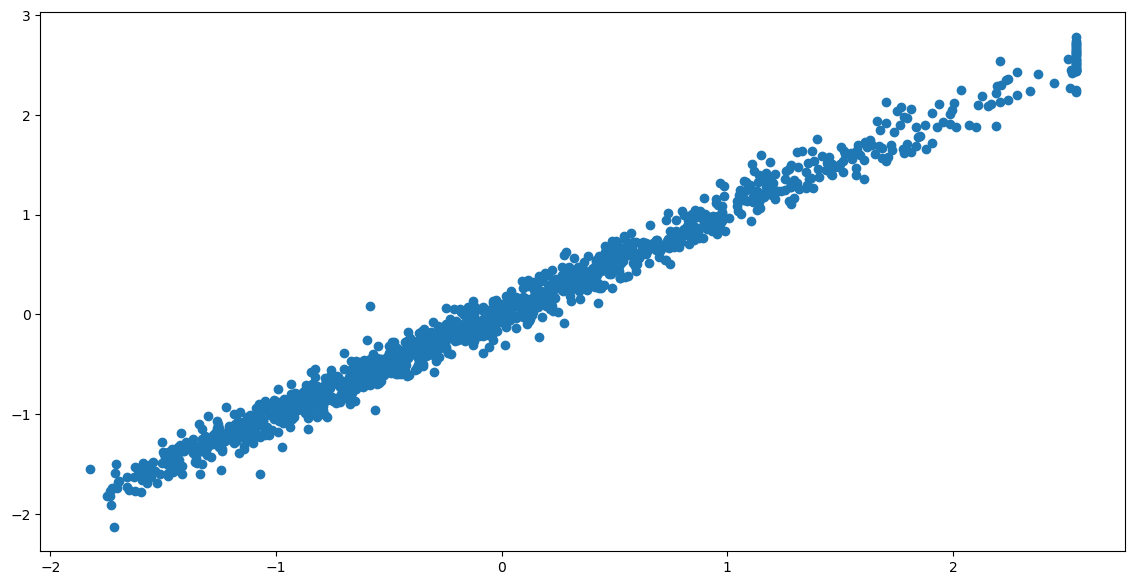

In [159]:
plt.scatter(y_test_scaled,(mlp.predict(X_test_scaled)))

In [160]:
## Tuning MLPRegressor

param_grid = {
    'hidden_layer_sizes': [100,50,20,10], 
    'max_iter': [2500,5000], 
    'solver': ['adam','sgd'], 
    'tol': [0.01], 
}

from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
    mlp,
    param_grid,
    cv=5, verbose=0, n_jobs=-1)

In [161]:
grid_result = gsc.fit(X_train_scaled, y_train_scaled)

In [162]:
best_params = grid_result.best_params_
best_params

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [163]:
best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        tol=best_params["tol"],
                        solver=best_params["solver"],
                        max_iter= 5000)

In [164]:
best_mlp.fit(X_train_scaled, y_train_scaled)

MLPRegressor(hidden_layer_sizes=100, max_iter=5000, tol=0.01)

In [165]:
best_mlp.score(X_train_scaled, y_train_scaled)

0.9816723594029855

In [166]:
best_mlp.score(X_test_scaled, y_test_scaled)

0.9659805579008421

In [167]:
MLPrmse = mean_squared_error(y_train_scaled,(best_mlp.predict(X_train_scaled)),squared=False)
MLPrmse

0.13537961662308906

In [168]:
MLPrmse = mean_squared_error(y_test_scaled,(best_mlp.predict(X_test_scaled)),squared=False)
MLPrmse

0.18444360140475952

In [169]:
mae = mean_absolute_error(y_train_scaled,(best_mlp.predict(X_train_scaled)))
mae

0.10541396712902956

In [170]:
mae = mean_absolute_error(y_test_scaled,(best_mlp.predict(X_test_scaled)))
mae

0.13944964084224407

<Figure size 1400x700 with 0 Axes>

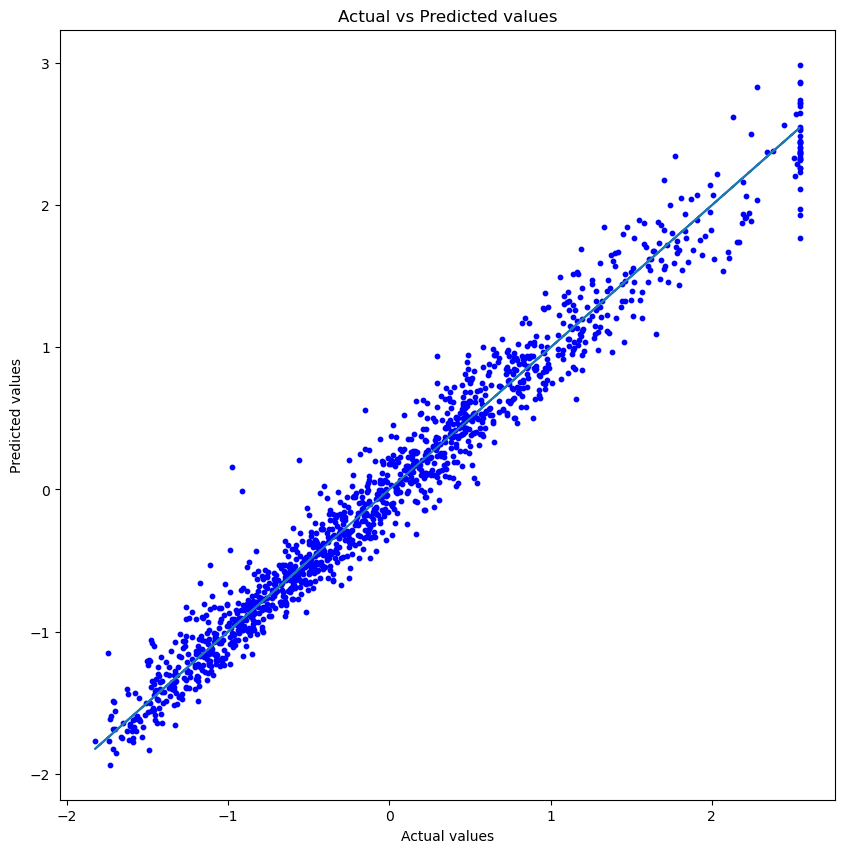

In [171]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (best_mlp.predict(X_test_scaled)), s=10, c="blue")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [172]:
## Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dtR = DecisionTreeRegressor(random_state=0)

dtR.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(random_state=0)

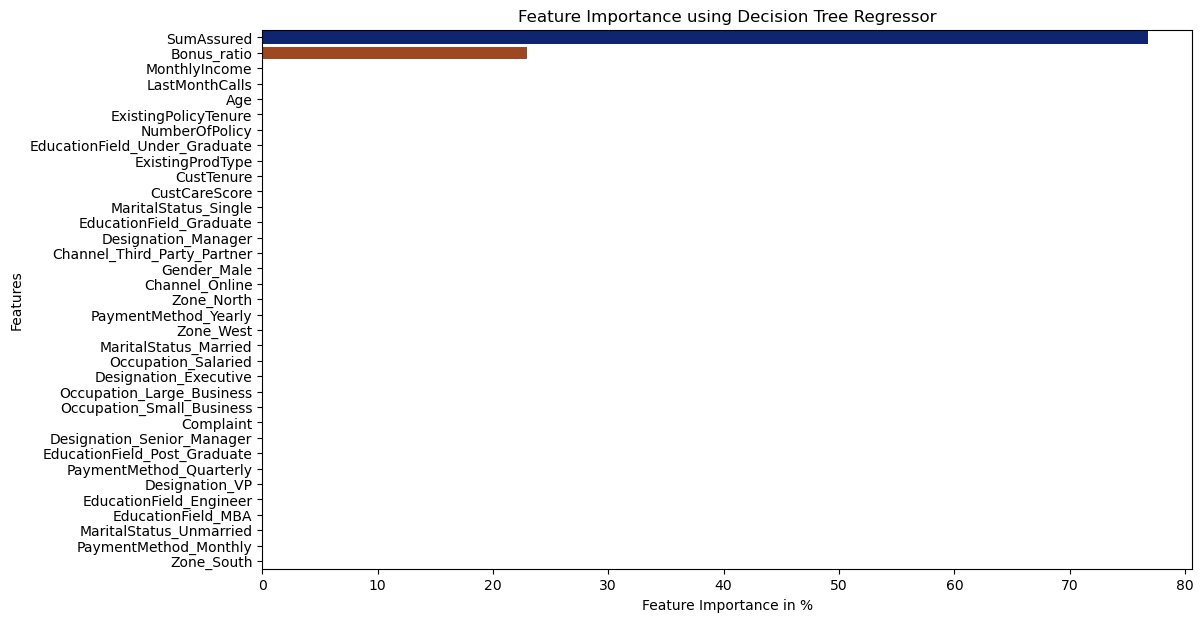

In [173]:
x = pd.DataFrame(dtR.feature_importances_*100, index=X_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0], y=x.index, palette='dark')  # Use x and y as keyword arguments
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Decision Tree Regressor')
plt.show()

<Figure size 1400x700 with 0 Axes>

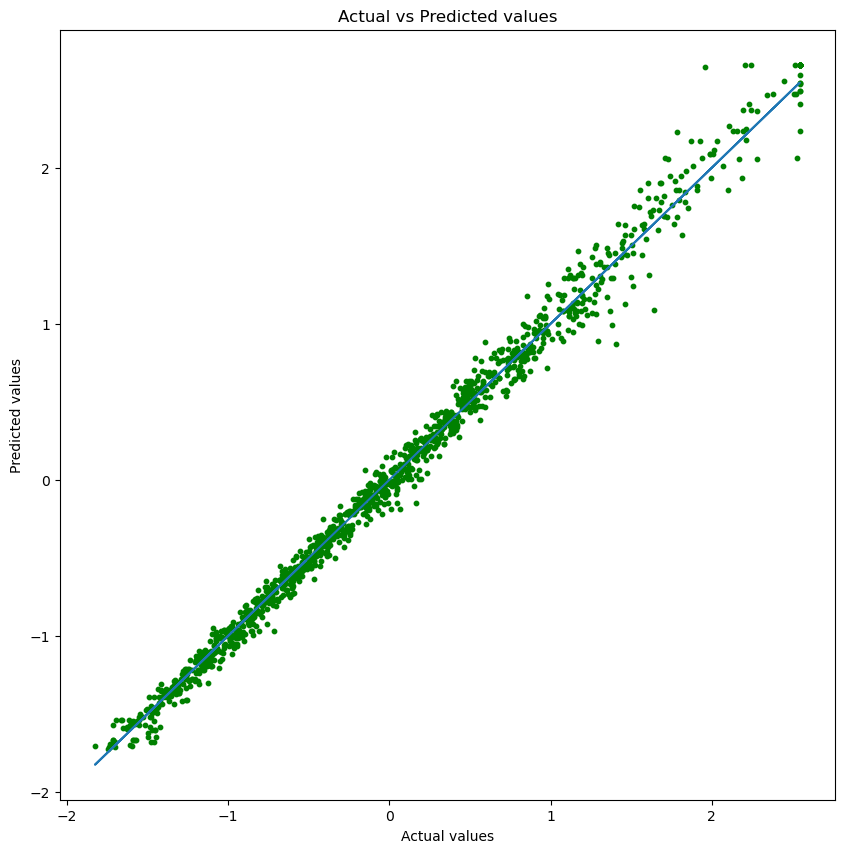

In [174]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (dtR.predict(X_test_scaled)), s=10, c="green")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [175]:
dtR.score(X_train_scaled, y_train_scaled)

1.0

In [176]:
dtR.score(X_test_scaled, y_test_scaled)

0.9912303986692049

In [177]:
dtRmse = mean_squared_error(y_train_scaled,(dtR.predict(X_train_scaled)),squared=False)
dtRmse

0.0

In [178]:
dtRrmse = mean_squared_error(y_test_scaled,(dtR.predict(X_test_scaled)),squared=False)
dtRrmse

0.09364614957805294

In [179]:
mae = mean_absolute_error(y_train_scaled,(dtR.predict(X_train_scaled)))
mae

0.0

In [180]:
mae = mean_absolute_error(y_test_scaled,(dtR.predict(X_test_scaled)))
mae

0.06631135712166931

In [181]:
## Pruning Decision tree

param_grid = {
    
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [50,100,150,300,450],
}

dtcl = DecisionTreeRegressor(random_state=1)



In [182]:
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [183]:
grid_search.fit(X_train_scaled, y_train_scaled)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


DecisionTreeRegressor(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                      random_state=1)

In [184]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Tree_File = open('tree4.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file=Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Tree_File.close()

In [185]:
best_grid.score(X_train_scaled, y_train_scaled)

0.9656727514858479

In [186]:
best_grid.score(X_test_scaled, y_test_scaled)

0.9559180747323616

In [187]:
dtRmse = mean_squared_error(y_train_scaled,(best_grid.predict(X_train_scaled)),squared=False)
dtRmse

0.18527614124369104

In [188]:
dtRrmse = mean_squared_error(y_test_scaled,(best_grid.predict(X_test_scaled)),squared=False)
dtRrmse

0.2099569605124785

In [189]:
mae = mean_absolute_error(y_train_scaled,(best_grid.predict(X_train_scaled)))
mae

0.1394773728530316

In [190]:
mae = mean_absolute_error(y_test_scaled,(best_grid.predict(X_test_scaled)))
mae

0.15744555605725466

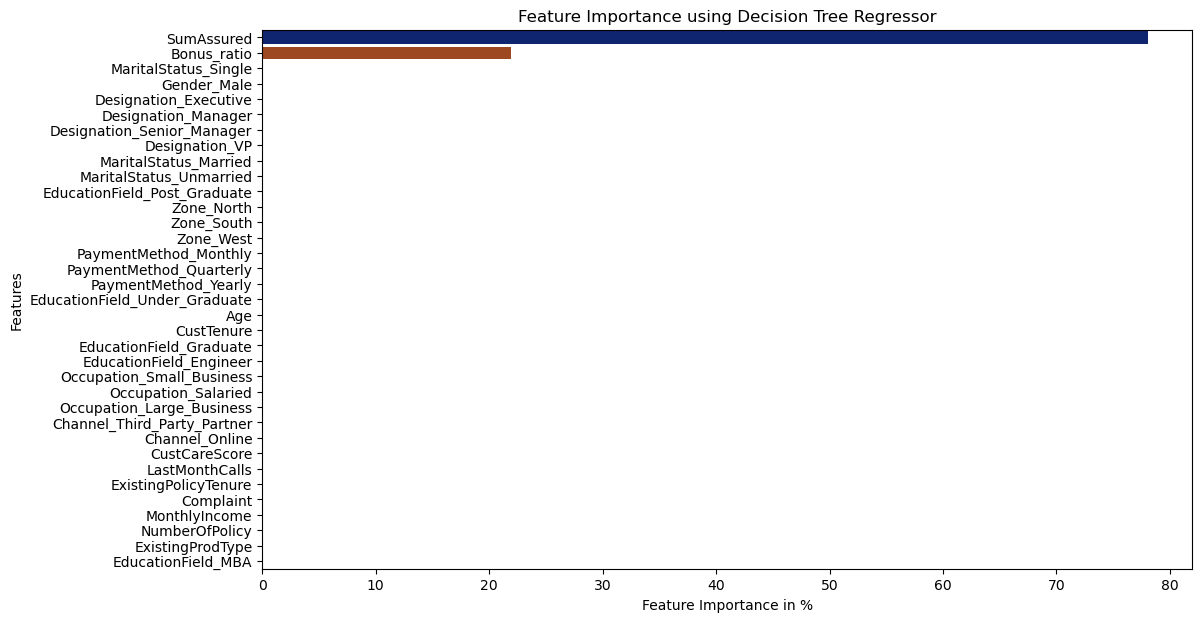

In [191]:
x = pd.DataFrame(best_grid.feature_importances_*100, index=X_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0], y=x.index, palette='dark')  # Corrected to use keyword arguments
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Decision Tree Regressor')
plt.show()

<Figure size 1400x700 with 0 Axes>

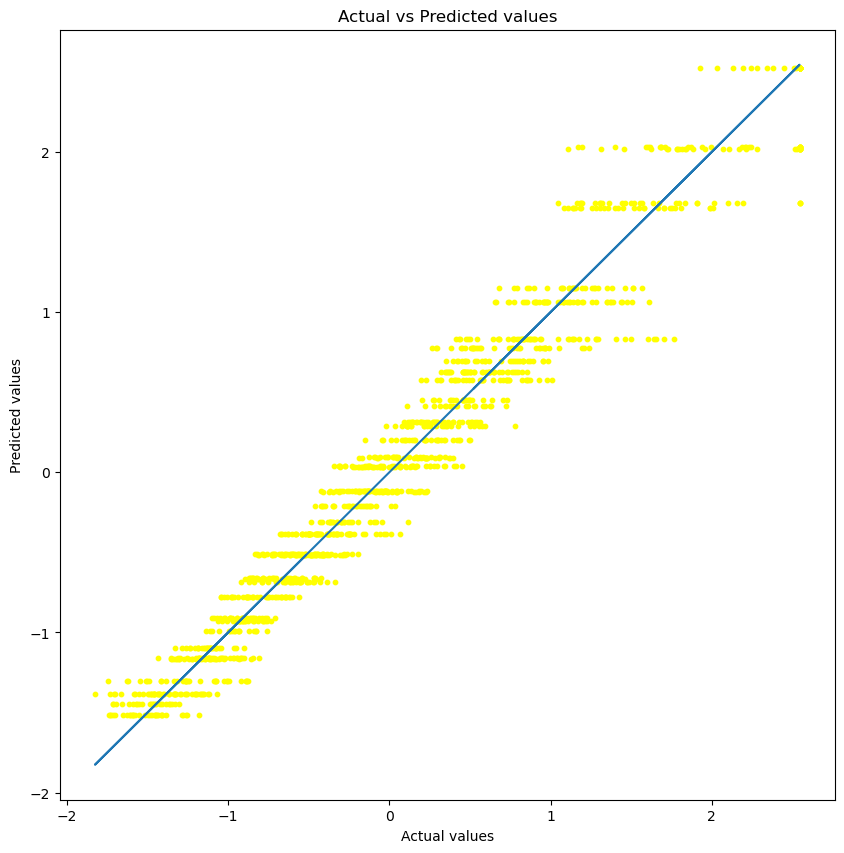

In [192]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (best_grid.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()


In [193]:
from sklearn.ensemble import RandomForestRegressor

In [194]:
rfR = RandomForestRegressor(random_state=0)

In [195]:
rfR.fit(X_train_scaled, y_train_scaled)

RandomForestRegressor(random_state=0)

In [196]:
rfR.score(X_train_scaled, y_train_scaled)

0.999744579961122

In [197]:
rfR.score(X_test_scaled, y_test_scaled)

0.9971701296480413

In [198]:
rfRmse = mean_squared_error(y_train_scaled,(rfR.predict(X_train_scaled)),squared=False)
rfRmse

0.01598186593855641

In [199]:
rfRrmse = mean_squared_error(y_test_scaled,(rfR.predict(X_test_scaled)),squared=True)
rfRrmse

0.0028298703519586818

In [200]:
mae = mean_absolute_error(y_train_scaled,(rfR.predict(X_train_scaled)))
mae

0.010118541807133223

In [201]:
mae = mean_absolute_error(y_test_scaled,(rfR.predict(X_test_scaled)))
mae

0.03796726772328447

<Figure size 1400x700 with 0 Axes>

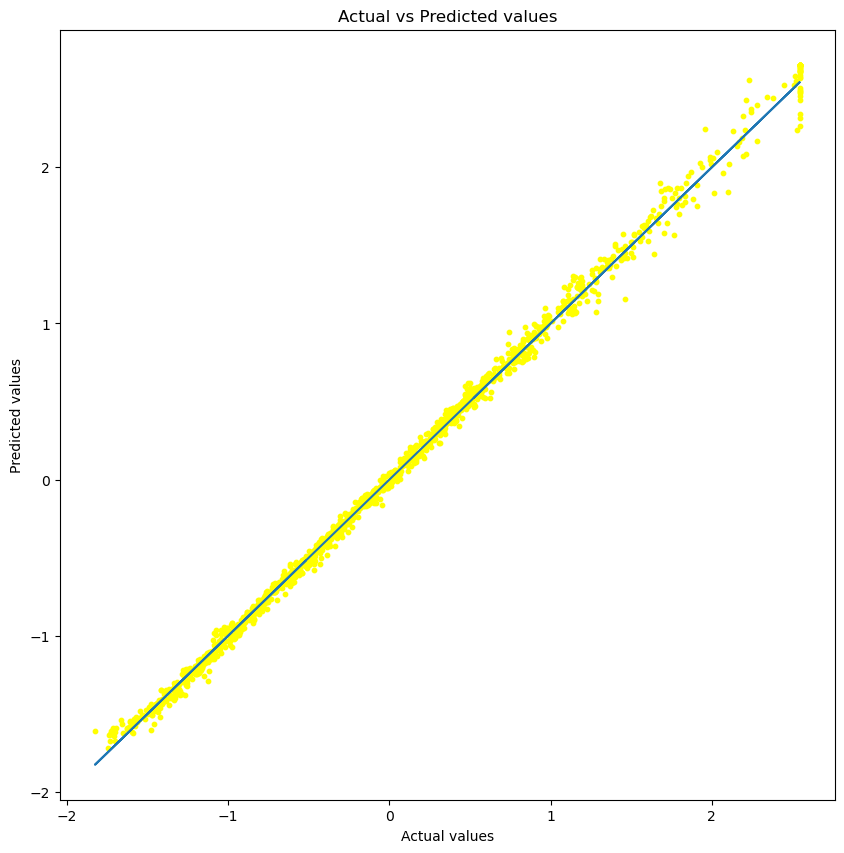

In [202]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (rfR.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

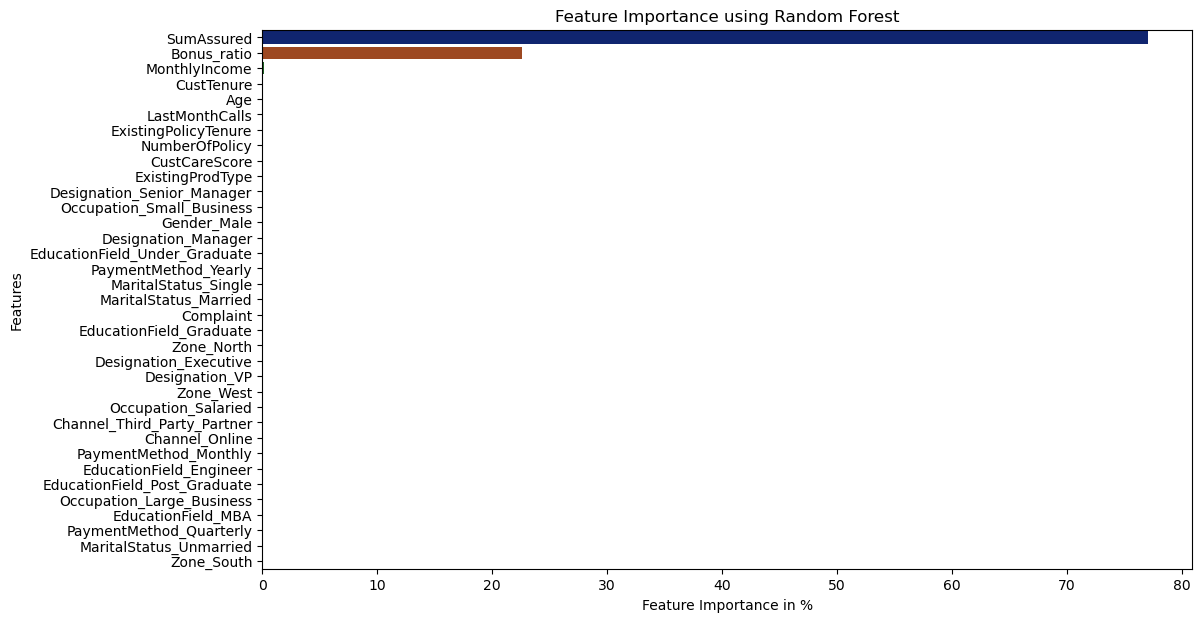

In [205]:
x = pd.DataFrame(rfR.feature_importances_*100, index=X_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0], y=x.index, palette='dark')  # Specify x and y as keyword arguments
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.show()

In [206]:
## Tuning parameters

param_grid = {
    'max_depth': [10,20,30,40],
    'max_features': [6,7,8,9],
    'min_samples_leaf': [10,50,100],
    'min_samples_split': [50,60,70], 
    'n_estimators': [100,200,300]
}


rfcl = RandomForestRegressor(random_state=1)

In [207]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [208]:
# Assuming rfcl and param_grid are already defined

grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': [6, 7, 8, 9],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [209]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [210]:
best_grid = grid_search.best_estimator_

best_grid

RandomForestRegressor(max_depth=20, max_features=9, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=300, random_state=1)

In [211]:
best_grid.score(X_train_scaled, y_train_scaled)

0.9201425708320013

In [212]:
best_grid.score(X_test_scaled, y_test_scaled)

0.8989808997622183

In [213]:
rFRmse = mean_squared_error(y_train_scaled,(best_grid.predict(X_train_scaled)),squared=False)
rFRmse

0.28259056808039196

In [214]:
rFRmse = mean_squared_error(y_test_scaled,(best_grid.predict(X_test_scaled)),squared=False)
rFRmse

0.31783502047096973

In [215]:
mae = mean_absolute_error(y_train_scaled,(best_grid.predict(X_train_scaled)))
mae

0.21655780809812375

In [216]:
mae = mean_absolute_error(y_test_scaled,(best_grid.predict(X_test_scaled)))
mae

0.24776531865228635

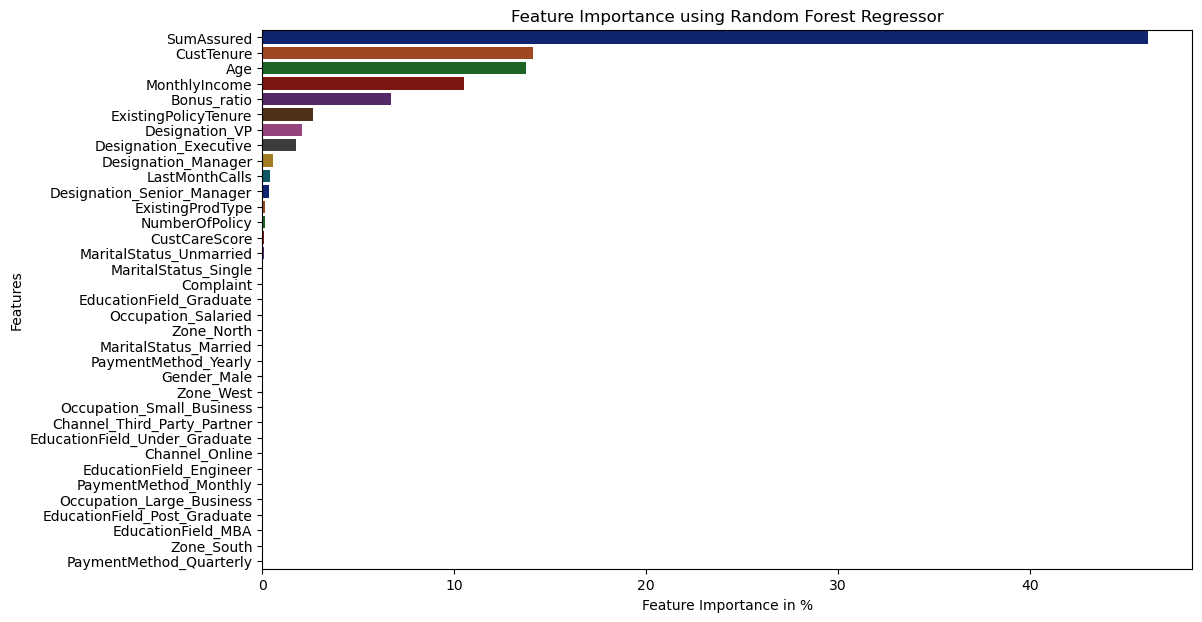

In [217]:
x = pd.DataFrame(best_grid.feature_importances_*100, index=X_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0], y=x.index, palette='dark')  # Corrected to use keyword arguments for x and y
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest Regressor')
plt.show()

<Figure size 1400x700 with 0 Axes>

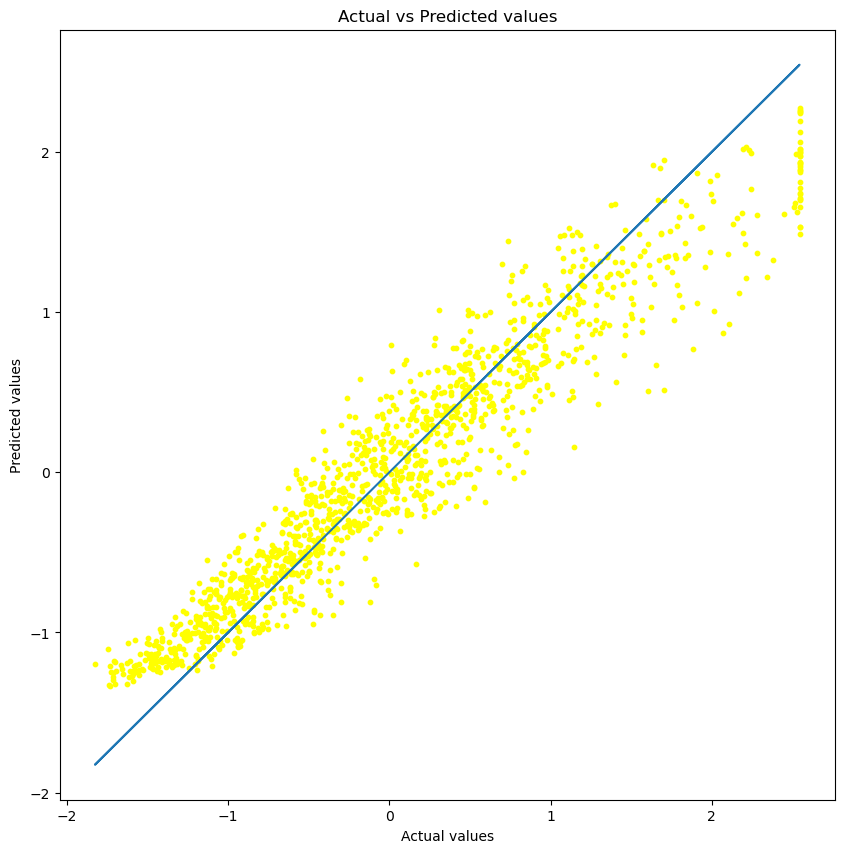

In [218]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (best_grid.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [219]:
from sklearn.ensemble import GradientBoostingRegressor

gbcl = GradientBoostingRegressor(random_state=1)
gbcl = gbcl.fit(X_train_scaled, y_train_scaled)

In [220]:
y_train_predict = gbcl.predict(X_train_scaled)

In [221]:
gbcl.score(X_train_scaled, y_train_scaled)

0.9975221576193151

In [222]:
gbcl.score(X_test_scaled, y_test_scaled)

0.99523385570149

In [223]:
gbRmse = mean_squared_error(y_train_scaled,(gbcl.predict(X_train_scaled)),squared=False)
gbRmse

0.04977793065892738

In [224]:
gbRmse = mean_squared_error(y_test_scaled,(gbcl.predict(X_test_scaled)),squared=False)
gbRmse

0.06903726746120481

In [225]:
mae = mean_absolute_error(y_train_scaled,(gbcl.predict(X_train_scaled)))
mae

0.038037301696474464

In [226]:
mae = mean_absolute_error(y_test_scaled,(gbcl.predict(X_test_scaled)))
mae

0.052453862863790855

<Figure size 1400x700 with 0 Axes>

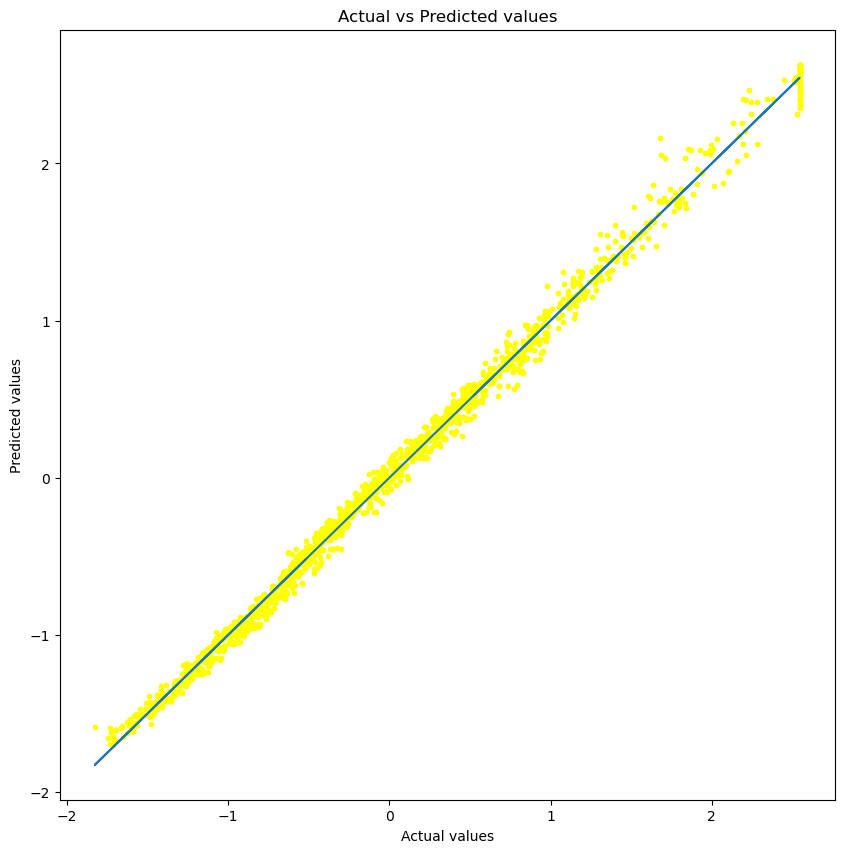

In [227]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (gbcl.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()
